<a id='beginning'></a>

## Проектная работа "Поиск закономерностей определяющих успешность компьютерных игр."

### Цель проекта:

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры

### Содержание проекта:
- [Шаг 1.](#step_1) Изучение общей информации;
- [Шаг 2.](#step_2) Подготовка данных;
- [Шаг 3.](#step_3) Исследовательский анализ данных;
- [Шаг 4.](#step_4) Анализ пользователей каждого региона;
- [Шаг 5.](#step_5) Проверка гипотез;
- [Шаг 6.](#step_6) Общий вывод;

### Файлы с данными*:
- games.csv.csv (информация о звонках);

*Описание данных для столбцов хранится в переменной `DATA_DESCRIPTION_DICT`

**Имопорт необходимых для работы библиотек**

In [1]:
import re
import random
import requests
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from datetime import datetime
from termcolor import colored
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#import math
import numpy as np
#from datetime import datetime
from scipy import stats as st

#import matplotlib.gridspec as gridspec

pd.set_option('max_colwidth', 130)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Объявление глобальных переменных и функций.**

Все функции можно было бы хранить в отдельном файле и импортировать одной строчкой, но поскольку на проверку можно закинуть только один файл, то крутим вниз))

[К шагу 1](#step_1)

In [2]:
# Значения словаря - пути до папки с рабочими файлами, ключи значения от 1 до 3, в соответствии с местом 
# выполнения проекта: Дом / Работа / Облако yandex prakticum. Выбор в переменной work_place
PATH_TO_FOLDER_DICT   = {'1' : 'C:\\Users\\ASUS\\Desktop\\Yandex prakticum\\project_4\\',
                         '2' : 'C:\\Users\\ShadrinAV\\Desktop\\Yandex prakticum\\project_4\\',
                         '3' : '/datasets/'}

# Описание данных в столбцах. Используется для вывода общей информации о DataFrame
DATA_DESCRIPTION_DICT = {'Name'            : 'название игры',
                         'Platform'        : 'платформа',
                         'Year_of_Release' : 'год выпуска',
                         'Genre'           : 'жанр игры',
                         'NA_sales'        : 'продажи в Северной Америке (миллионы долларов)',
                         'EU_sales'        : 'продажи в Европе (миллионы долларов)',
                         'JP_sales'        : 'продажи в Японии (миллионы долларов)',
                         'Other_sales'     : 'продажи в других странах (миллионы долларов)',
                         'Critic_Score'    : 'оценка критиков (максимум 100)',
                         'User_Score'      : 'оценка пользователей (максимум 10)',
                         'Rating'          : 'рейтинг от организации ESRB (англ. Entertainment Software Rating Board)'}

PLATFORM_DICT = {'Wii U'             :'WiiU', 'Wii'                  :'Wii', 'Game Boy Advance'     :'GBA',
                 'Game Boy Color'    :'GBA',  'Game Boy'             :'GB',  'Nintendo 3DS'         :'3DS',
                 'Nintendo DS'       :'DS',   'Nintendo 64'          :'N64', 'Famicom'              :'NES',
                 'Super Famicom'     :'SNES', 'PlayStation Portable' :'PSP', 'PlayStation 4'        :'PS4',
                 'PlayStation 3'     :'PS3',  'PlayStation 2'        :'PS2', 'PlayStation Vita'     :'PSV',
                 'PlayStation'       :'PS',   'Famicom'              :'NES', 'Super Famicom'        :'SNES',
                 'Microsoft Windows' :'PC',   'Windows'              :'PC',  'Atari 2600'           :'2600',
                 'Xbox 360'          :'X360', 'Xbox One'             :'XOne','Xbox'                 :'XB',
                 'GameCube'          :'GC',   'Sega Mega Drive'      :'GEN', 'Dreamcast'            :'DC',
                 'Sega Saturn'       :'SAT',  'WonderSwan'           :'WS',  'N-Gage'               :'NG',
                 'TurboGrafx'        :'TG16', 'PC-FX'                :'PCFX','OS X'                : 'OSX'}

DISTPLOT_DICT = {0 : {'title'        : 'Распределение количества игр и уровня продаж'+'\n'+'для платформы ',
                      'bins'         : 10,
                      'color_games'  : 'pink',
                      'color_sales'  : 'salmon',
                      'xlabel'       : 'год выпуска'},
                 1 : {'title'        : 'Распределение количества игр и уровня продаж'+'\n'+'для платформы ',
                      'bins'         : 11,
                      'color_games'  : 'indianred',
                      'color_sales'  : 'firebrick',
                      'xlabel'       : 'год выпуска'},
                 2 : {'title'        : 'Распределение количества игр и уровня продаж'+'\n'+'для платформы ',
                      'bins'         : 11,
                      'color_games'  : 'darkred',
                      'color_sales'  : 'darkred',
                      'xlabel'       : 'год выпуска'},
                 3 : {'title'        : 'Распределение количества игр и уровня продаж'+'\n'+'для платформы ',
                      'bins'         : 12,
                      'color_games'  : 'darkmagenta',
                      'color_sales'  : 'darkmagenta',
                      'xlabel'       : 'год выпуска'},
                 4 : {'title'        : 'Распределение количества игр и уровня продаж'+'\n'+'для платформы ',
                      'bins'         : 12,
                      'color_games'  : 'mediumpurple',
                      'color_sales'  : 'rebeccapurple',
                      'xlabel'       : 'год выпуска'},
                 5 : {'title'        : 'Распределение количества игр и уровня продаж'+'\n'+'для платформы ',
                      'bins'         : 12,
                      'color_games'  : 'indigo',
                      'color_sales'  : 'indigo',
                      'xlabel'       : 'год выпуска'}
                }

def printer (array_of_strings):
    '''
    Функция для печати таблицы c произвольными данными
    Является развитием функции print_free_info из прошлых проектов. Теперь количество и ширина столбцов определяется
    внутри функции. Так же переносятся строки, чья длина превышает ширину столобца.
    Аргументы:
    array_of_strings - массив строк
    
    Вызов функции:
    в любом шаге, где надо вывести информацию в виде таблицы.'''
    # Количестов столбцов определяется количеством элементов первого списка, поскольку он всегда содержит названия столбцов
    columns_amount  = len(array_of_strings[0])
    # Макимальная длина строки в символах
    max_string_len  = 126
    # В список max_len_list будут сохраняться максимальные значения длины строки для каждого столбца.
    # В итоге в нем будет столько значений, сколько столбцов в будущей таблице.
    max_len_list    = []
    
    # Циклом for пройдем по нашему списку.
    for i in range(columns_amount):
        # В переменную max_len будет записана длина самой длинной строки из списка
        max_len      = 0
        # Для каждой строки в списке
        for string_list in array_of_strings:
            # Если длина этой строки больше, чем значение, сохраненное в max_len
            if len(string_list[i]) > max_len:
                # max_len присваивается новое значение
                max_len = len(string_list[i])
        # Заносим длину самой длинной строки в столбце в наш список. +1, что бы при выводе не сливалось с границами
        max_len_list.append(max_len+1)
        
    # Если сумарно ширина всех столбцов меньше значения max_string_len
    if sum(max_len_list) < max_string_len:
        # То расчитываем сколько надо добавить к ширине каждого столбца, что бы вывод таблицы был всегда одной ширины.
        total_add    = max_string_len - sum(max_len_list)
        # Расчет сколько добавить к каждому столбцу
        to_add       = total_add//len(max_len_list)
        # Добавляем to_add к каждому значению в списке и получаем новые значения ширины для столбцов
        max_len_list = list(item + to_add for item in max_len_list)
        # Если в результате добавлений длинна строки все еще не равна max_string_len,
        #то остаток добавляем к ширине последнего столбца
        max_len_list[0] += max_string_len - sum(max_len_list)
        
    # Если сумарно ширина всех столбцов больше значения max_string_len    
    elif sum(max_len_list) > max_string_len:
        # То расчитываем сколько надо отнять от ширины столбцов, что бы вывод таблицы был всегда одной ширины.
        total_sub    = sum(max_len_list) - max_string_len
        # Поиск самого большог значения в списке с шириной столбцов
        to_sub       = max(max_len_list)
        # Уменьшается ширина только самого широкого столбца
        max_len_list = [item if item != to_sub else item - total_sub for item in max_len_list]

    # Цикл for для каждого списка в нашем массиве
    for string_list in array_of_strings:
        print('|', end='')
        
        # Цикл for для каждой строки в списке
        for i in range (len(string_list)):
            # Если длина строки меньше или равна максимальной ширине столбца
            if len(string_list[i]) <= max_len_list[i]:
                # То выводим строку и оставшееся место просто заполняем пробелами
                print(string_list[i], end='')
                for n in range(max_len_list[i] - len(string_list[i])-1):
                    print(' ', end='')
            # В случае если строка длиннее максимальной ширины столбца       
            else:
                #Она разбивается на слова
                split_string = string_list[i].split(' ')
                part_1 = ''
                # И заново собирается, пока ее длина меньше макисмальной ширины
                for y in range(len(split_string)):
                    if len(part_1 + ' ' + split_string[0]) < max_len_list[i]-1:
                        part_1 = part_1 + ' ' + split_string.pop(0)
                part_1 = part_1.lstrip()
                # Оставшиеся слова собираются в строку 2
                part_2 = '|' + ' '.join(split_string)

                # Если длина строки меньше или равна максимальной ширине столбца 
                # то до нужной ширины заполдняем все пробелами
                if len(part_1) <= max_len_list[i]:
                    print(part_1, end='')
                    for j in range(max_len_list[i] - len(part_1) -1):
                        print(' ', end='')
                print('|')
                # Здесь печатаем пропуски перед началом второй строки, чтобы она началась в нужном столбца
                for n in range(max_len_list[i-1]):
                    print(' ', end='')
                # до нужной ширины заполдняем все пробелами 
                if len(part_2) < max_len_list[i]:
                    print(part_2, end='')
                    for j in range(max_len_list[i] - len(part_2)):
                        print(' ', end='')

            print('|', end='')
        print()
        
        for i in range(max_string_len):
            print('-', end='')
        print()
        
def print_table_info(table, first_call, name, method):
    '''
    Функция для применения в столбцам таблицы методов 'max','min','sum','mean','isna','count','median'
    Часть информации выводится на экран.
    За вывод на экран таблицы отвечает функция printer, она вызывается вконце.
    
    Аргументы:
    table      - DataFrame для обработки
    first_call - True/False является ли вызов функции первым
    name       - Название файла с которым работаем
    method     - Метод, который необходимо применить в столбцам
    
    Вызов функции:
    Шаг 1 - Превичная информация о файлах'''
    # В переменную result_dict будут записаны результаты применения выбранного метода к столбцам DataFrame
    # Ключ - название столбца, значение - результат применения метода
    result_dict      = {}
    # Такие методы как суммирование, среднее и медиана будут применены только к столбцам с типами данных 'float64', 'int64'
    if method in ['sum', 'mean', 'median', 'min']:
        # Для этого столбцы DataFrame фильтруются по типу. Если этого не сделать метод sum примененный к столбцу 
        # со строковыми типами данных попытается соеденить все строки столбца.
        table            = table.select_dtypes(include = ['float64', 'int64'])
        # В calculation_dict ключи - названия методов, значения результат применения этих методов к DataFrame
        calculation_dict = {'max'    : table.max(),
                            'min'    : table.min(),
                            'sum'    : table.sum().round(2),
                            'mean'   : table.mean().round(2),
                            'isna'   : table.isna().sum(),
                            'count'  : table.count(),
                            'median' : table.median().round(2)
                           }
    # Остальные методы могут быть применены без ошибки и зависания к любым типам данных
    else: 
        calculation_dict = {'max'    : table.max(),
                            'min'    : table.min(),
                            'isna'   : table.isna().sum(),
                            'count'  : table.count(),
                           }
    # В result_dict записывается ключ - название столбца и значение результат работы метода
    result_dict               = dict(calculation_dict[method])        
    result_dict['rows']       = table.shape[0]
    result_dict['columns']    = table.shape[1]
    result_dict['duplicated'] = table.duplicated(subset=['Name', 'Platform'], keep=False).sum()
    # Различие вывода информации на основании является ли вызов первым или надо посмотреть результат 
    # Какого-либо действия и тогда часть информации не нужна.
    if first_call:
        print()
        print('{: >71}{: <55}'.format('Общая информация о содержимом файла ', name))
        print()
        print('{:.<71}{:.>55}'.format('Количество строк', result_dict['rows']))
        print('{:.<71}{:.>55}'.format('Количество столбцов', result_dict['columns']))
        print('{:.<71}{:.>55}'.format('Количество дублированных (по столбцам "Name" и "Platform") строк',
                                      result_dict['duplicated']))       
        print()

    else:
        print('{: >71}{: <55}'.format('Проверка изменений в файле ', name))
        print()
    
    metod_for_print = {'max'    : 'Максимальное значение',
                       'min'    : 'Минимальное значение',
                       'sum'    : 'Сумма значений',
                       'mean'   : 'Среднее значение',
                       'isna'   : 'Количество пропусков',
                       'count'  : 'Количество значений',
                       'median' : 'Медиана'}
    # Массив строк, который будет передан функции printer. Внесенные данные будут названиями столбцов.
    table_rows = [['Название столбца', 'Описание данных', 'Тип данных', metod_for_print[method]]]
    
    for column_name in table.columns:
        # Попытка вывода информации: название столбца, описание значений столбцов
        # тип данных, содержащихся в столбце, и результат работы функции  apply_methods
        try:
            table_rows.append([column_name, DATA_DESCRIPTION_DICT[column_name], str(table[column_name].dtype),
                             str(result_dict[column_name])])
        # В случае ошибки обращения к словарю выдается соответствующее предупреждение с указание названия столбца
        except KeyError:
            table_rows.append([column_name, 'Ошибка! В словаре отсутсвует описание для столбца.',
                               str(table[column_name].dtype), str(result_dict[column_name])])
        # Во всех остальных случаях просто сообщение об ошибке и название файла
        except:
            table_rows.append([column_name, 'Ошибка!', str(table[column_name].dtype), str(result_dict[column_name])])
            
    printer(table_rows)

def fill_na(column_1, column_2, release_dict):
    '''
    Функция заполняет пропуски в столбцах на основании словаря *release_dict*.
    Ключ     - название игры
    column_1 - название столбца, для поиска совпадений
    column_2 - название столбца, для заполнения пропусков
    Вызов функции:
    Шаг 2 - Подготовка данных'''
    
    global na_filled, games_amount
    na_filled      = 0
    games_amount   = 0

    for k in release_dict.keys():
        games_amount += 1
        ind = df[(df[column_1]==k) & (df[column_2].isna())].index
        na_filled += len(ind)
        df.loc[ind, column_2] = release_dict[k]
        
def wiki_search (name, link):    
    release_list    = []
    platforms_list  = []
    temp_df         = pd.DataFrame(columns=['name', 'platform', 'year_of_release', 'link'])
    temp_df['name'] = [name]   
    
    r      = requests.get(link).text
    soup   = BeautifulSoup(r, 'lxml')
    tables = soup.find_all('table')
 
    for i in range(2):
        try:
            rows  = tables[i].find_all('tr')
        except:
            temp_df['link']             = link
            temp_df['platform']         = 'Ошибка ".find_all(tr)"'
            temp_df['year_of_release']  = 'Ошибка ".find_all(tr)"'
            break 
        
        for row in rows:
            if 'Release' in row.text:
                release_rows = row
            if 'Platform(s)' in row.text:
                platforms_rows = row            
    try:
        temp_df['platform']        = [platforms_rows.text]
        temp_df['year_of_release'] = [release_rows.text]
        temp_df['link']            = link

    except:
        temp_df['link']            = link
        temp_df['platform']        = 'Ошибка'
        temp_df['year_of_release'] = 'Ошибка'
        
    return(temp_df)

def split_platform (string):
    string_list = []
    for k in PLATFORM_DICT:
        mask = re.findall(k, string)
        if mask:
            string = string.replace(k,(PLATFORM_DICT[k]+','))
    
    string_list.append(string.split(','))
    return(string_list)



def fill_rating(indexes, genre, platform):
    
    temp_rate   = rating_from_cat[genre][platform].sort_values(ascending=False).iloc[0:3]
    temp_total  = temp_rate.sum()
    temp_share  = []
    try:
        temp_share.append(round(temp_rate.iloc[0]/temp_total,2))
        temp_share.append(round(temp_rate.iloc[1]/temp_total,2))
        temp_share.append(round(temp_total-temp_share[0]-temp_share[1],2))
        ratings    = list(temp_rate.index)
        length     = len(no_rating_df[(no_rating_df.genre==genre) & (no_rating_df.platform==platform)])
        fill_count = []
        fill_count.append(round(length*temp_share[0],0))
        fill_count.append(round(length*temp_share[1],0))
        fill_count.append(length-fill_count[0]-fill_count[1])
        if fill_count[-1] < 0:
            fill_count[-2] = fill_count[-2]+fill_count[-1]
            fill_count[-1] = 0 
        
        random.shuffle(indexes)
        
        rate_0 = indexes[:int(fill_count[0])]
        rate_1 = [x for x in indexes if x not in rate_0][:int(fill_count[1])]
        rate_2 = indexes[-int(fill_count[2]):]  
        fill_rating_df.loc[rate_0, 'rating'] = ratings[0]
        fill_rating_df.loc[rate_1, 'rating'] = ratings[1]
        fill_rating_df.loc[rate_2, 'rating'] = ratings[2]

    except:
        errors.append([genre_name, platform_name]) 
        
def pie_plot(dataframe, column, geo, kind, size):
    
    global locality_dict
    
    locality_dict            = {'na_sales' : 'североамериканского рынка',
                                'eu_sales' : 'европейского рынка',
                                'jp_sales' : 'японского рынка'}
    explode                  = (0.1, 0, 0, 0, 0, 0)
    money_amount             = [geo, 'amount']
    x_coordinates            = [0, 0]
    y_coordinates            = [0, 1]
    titles_dict              = {"platform" : ['Доля перспективных платформ для '+locality_dict[geo]+'\n'+
                                              'в процентах от уровня продаж',
                                              'Доля перспективных платформ для '+locality_dict[geo]+'\n'+
                                              'в процентах от количества выпущенных игр'],
                                "genre"    : ['Доля жанров для '+locality_dict[geo]+'\n'+
                                              'в процентах от уровня продаж',
                                              'Доля жанров для '+locality_dict[geo]+'\n'+
                                              'в процентах от количества выпущенных игр']}
         
    dataframe                = dataframe[dataframe[geo]!=0]
    local_df                 = dataframe.groupby(column).agg({geo:'sum','total_sales':'sum','name':'count'})
    local_df                 = local_df.rename(columns={"name": "amount"})
    local_df['income_share'] = local_df[geo]/local_df[geo].sum()*100
    local_df['from_global']  = local_df[geo]/local_df['total_sales']*100
    local_df['amount_share'] = local_df['amount']/local_df['amount'].sum()*100
    local_df['mean']         = dataframe.groupby(column).agg({geo:'mean'})[geo]
    local_df['median']       = dataframe.groupby(column).agg({geo:'median'})[geo]
    local_df                 = local_df.sort_values(by=geo, ascending=False).reset_index()
    if column == 'platform':
        local_df.platform    = local_df.platform.apply(lambda x: x if x in list(local_df.head(5).platform) else "other")
    elif column == 'genre':
        local_df.genre       = local_df.genre.apply(lambda x: x if x in list(local_df.head(5).genre) else "other")
        
    local_df                 = local_df.groupby(column).agg({'total_sales':'sum', geo:'sum', 'income_share':'sum',
                                                             'from_global':'mean','amount':'sum', 'amount_share':'sum',
                                                             'mean':'mean', 'median':'mean'})
    if kind == 'table':
        print('Суммарные значения продаж и среднего значения выручки для ' + locality_dict[geo])
        return(local_df) 
    
    elif kind == 'pie':
        fg = plt.figure(figsize=size)
        gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)

        for i in range(2):
            local_df.sort_values(by=[money_amount[i]], ascending=False,inplace=True)
            platforms            = list(local_df.index)
            data                 = list(local_df[money_amount[i]].round(2))
            ax = fg.add_subplot(gs[x_coordinates[i], y_coordinates[i]])
            patches, texts, autotexts = ax.pie(data, explode=explode, labels=None,
                                               autopct='%1.1f%%', textprops={'size': 12},
                                               colors=sns.color_palette("Blues_r"),
                                               pctdistance=.8,
                                               shadow=True, startangle=90)
            ax.axis('equal')
            ax.legend(platforms, fontsize = 12,
                        title="Platforms", title_fontsize = 'x-small',
                        bbox_to_anchor=(.75, 0, 0.5, 0.5))

            ax.set_title(titles_dict[column][i],size=14)
            plt.setp(autotexts, size='small')
            autotexts[0].set_color('white')
        
        plt.tight_layout(w_pad=5)
        
def check_hypothesis (to_check, to_do, no_zeros, alpha):

    '''
    Функция для расчета среднего, дисперсии и стандартного отклонения
    или
    для проверки гипотез.
    Аргументы:
    to_check - ключ к словарю to_check_dict по которому настраивается вывод нужной информации
    to_do    - если 'mmvs' (mean, median, var, std), то функция посчитает и выведет на экран
    среднее, медиану, дисперсию и стандартное отклонение для выборки, а так же построит соответствующие графики;
               если 'hyp' (hypothesis), то будет проверена одна из трех (в зависимости от значения to_check)
               гипотез Шага 5.
    no_zeros - True или False будут ли удалены из расчета нулевые значения
    alpha    - критический уровень статистической значимости
    Вызов функции:
    Шаг 5 - Проверка гипотиз'''

    to_check_dict  = {'platform':0, 'genre' : 1}
    j              = to_check_dict[to_check]
    df_queries_1   = ['platform=="XOne"', 'genre=="Action"']
    df_queries_2   = ['platform=="PC"', 'genre=="Sports"']
    title_list_1   = ['распределение cредниx пользовательскиx рейтингов\nдля платформы "XOne"',
                      'распределение cредниx пользовательскиx рейтингов\nдля жанра "Action"']
    title_list_2   = ['распределение cредниx пользовательскиx рейтингов\nдля платформы "PC"',
                      'распределение cредниx пользовательскиx рейтингов\nдля жанра "Sports"']
    lable_list_1   = ['XOne', 'Action']
    lable_list_2   = ['PC', 'Sports']
    mean_lable_1   = ['XOne среднее','Action среднее']
    mean_lable_2   = ['PC среднее','Sports среднее']
    median_lable_1 = ['XOne медиана','Action медиана']
    median_lable_2 = ['PC медиана','Sports медиана']
    header_list    = [['Дисперсия и стандарнтное отклонение для платформ "XOne" и "PC"', "XOne", "PC"],
                     ['Дисперсия и стандарнтное отклонение для жанров "Action" и "Sports"', "Action", "Sports"]]
    legend_loc     = [2,1]
    ddof           = 0

    df_1 = df.query(df_queries_1[j])[['name', 'user_score']]
    df_2 = df.query(df_queries_2[j])[['name', 'user_score']]

    df_1_score     = df_1.groupby(['name']).agg({'user_score':'mean'})
    df_2_score     = df_2.groupby(['name']).agg({'user_score':'mean'})

    if no_zeros:
        df_1_score = df_1_score[df_1_score['user_score']!=0]
        df_2_score = df_2_score[df_2_score['user_score']!=0]
        ddof       = 1
        legend_loc = [2,2]

    if to_do == 'mmvs':
        sns.set(style='whitegrid',font_scale=1.3)
        fg = plt.figure(figsize=(14, 5))
        gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)        
        df_1_score  = df_1_score['user_score']
        df_2_score  = df_2_score['user_score']

        fig_ax = fg.add_subplot(gs[0, 0])
        plt.title(title_list_1[j], loc='center', pad=15)
        sns.distplot(df_1_score, hist=True, color='b', bins=17, label=lable_list_1[j])
        mean_df_1   = df_1_score.mean()
        median_df_1 = df_1_score.median()
        plt.axvline(mean_df_1, color='b', ls='--', label=mean_lable_1[j])
        plt.axvline(median_df_1, color='midnightblue', ls=':', label=median_lable_1[j])
        plt.xticks(np.arange(0,11,1))
        plt.xlabel('оценка пользователей', labelpad=10)
        plt.legend(loc=legend_loc[j])

        fig_ax = fg.add_subplot(gs[0, 1])
        plt.title(title_list_2[j], loc='center', pad=15)
        sns.distplot(df_2_score, hist=True, color='b',bins=17, label=lable_list_2[j])
        mean_df_2   = df_2_score.mean()
        median_df_2 = df_2_score.median()
        plt.axvline(mean_df_2, color='b', ls='--', label=mean_lable_2[j])
        plt.axvline(median_df_2, color='midnightblue', ls=':', label=median_lable_2[j])
        plt.xticks(np.arange(0,11,1))
        plt.xlabel('оценка пользователей', labelpad=10)
        plt.legend(loc=legend_loc[j])

        plt.tight_layout()

        header = header_list[j]        
        row_1  = ['среднее значение', str(round(mean_df_1,2)),  str(round(mean_df_2,2))]
        row_2  = ['медиана', str(round(median_df_1,2)), str(round(median_df_2,2))]
        row_3  = ['дисперсия',str(round(np.var(df_1_score, ddof=ddof),2)), str(round(np.var(df_2_score, ddof=ddof),2))]
        row_4  = ['стандартное отклонение', str(round(np.std(df_1_score),2)), str(round(np.std(df_2_score),2))]
        printer([header, row_1, row_2, row_3, row_4])

    elif to_do == 'hyp':
        n          = 1
        #alpha_list = [.05, .05]
        #alpha      = alpha_list[j]
        header     = ['p-значение', '№ эксперимента', 'Результат']
        column_1   = []
        column_2   = []
        column_3   = []
        equal_var  = [False, True]
        while_n    = [150, 1500]
        title_list = ['H₀ - Средние пользовательские рейтинги платформ Xbox One и PC не различаются',
                      'H₀ - Средние пользовательские рейтинги жанров Action и Sports не различаются']

        while n < 11:
            i             = 0
            df_1_to_check = []
            df_2_to_check = []
            while i < while_n[j]:
                df_1_to_check.append(list(df_1_score['user_score']).pop(np.random.randint(0, len(df_1_score)-1)))
                df_2_to_check.append(list(df_2_score['user_score']).pop(np.random.randint(0, len(df_2_score)-1)))
                i += 1
            results = st.ttest_ind(df_1_to_check, df_2_to_check, equal_var=equal_var[j])
            column_1.append(str(results.pvalue))
            column_2.append('эксперимент ' + str(n))
    
            if (results.pvalue < alpha):
                column_3.append('H₀ отвергнута')
            else:
                column_3.append('H₀ принята')
            n += 1
            
        data = pd.DataFrame({'column_1':column_1, 'column_2':column_2, 'column_3':column_3})
        
        print('{: ^126}'.format(title_list[j]))
        print('{:-^126}'.format(''))
        printer([header, data.loc[0], data.loc[1], data.loc[2], data.loc[3], data.loc[4],
                data.loc[5], data.loc[6], data.loc[7], data.loc[8], data.loc[9]])

    else:
        print(colored('Проверьте правильность передаваемых параметров!','red'))

<a id='step_1'></a>
[*в начало*](#beginning)

### Шаг 1. Изучение общей информации.

[*следующий шаг*](#step_2)

**В этом шаге будет проведена оценка:**
- соответствия типов данных;
- наличия пропущенных значений в таблицах;
- наличия дубликатов;
- наличия "подозрительных" значений.

[*выводы Шаг 1*](#resume_1)

[*общий вывод*](#step_6)

В блоке ниже создаются или используются из глобальных следующие переменные:

- `PATH_TO_FILE_DICT` - словарь, содержащий в качестве ключей числа от 1 до 3, значения - пути к файлу с данными.

- `work_place` - является ключом к словарю *PATH_TO_FILE_DICT*, принимает значение от 1 до 3 в зависимости от компьютера, за которым проходит работа: 

    1 - дом;    
    2 - работа;    
    3 - облако (для проверяющего проект).
    
    
- `filename` - название файла.

- `path_to_file` - хранит путь к файлу в зависимости от значения переменной `work_place`.

In [3]:
download = False
while not download:
    work_place=""
    while work_place not in ['1','2','3']:
        work_place = input('Введите число соответствующее месту работы:\n1 - я дома;\n2 - я на работе;\n3 - я ревьюер.\n')
    filename     = 'games.csv'
    path_to_file = PATH_TO_FOLDER_DICT[work_place] + filename

    try:
        df = pd.read_csv(path_to_file)
        df = df.sort_values(by="Name")
        download = True
    except:
        print('Оглядитесь вокруг! Вы не там, где думаете')

Введите число соответствующее месту работы:
1 - я дома;
2 - я на работе;
3 - я ревьюер.
1


**Вывод информации о рабочих таблицах и данных, содержащихся в столбцах таблиц**

За вывод общей информации отвечает функция *print_table_info*

In [4]:
print_table_info(df, True, filename, 'isna')


                                   Общая информация о содержимом файла games.csv                                              

Количество строк.........................................................................................................16715
Количество столбцов.........................................................................................................11
Количество дублированных (по столбцам "Name" и "Platform") строк............................................................10

|Название столбца  |Описание данных                                                         |Тип данных |Количество пропусков |
------------------------------------------------------------------------------------------------------------------------------
|Name              |название игры                                                           |object     |2                    |
----------------------------------------------------------------------------------------------------------

In [5]:
pd.options.display.float_format='{:,.2f}'.format
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


`platforms` DataFrame полученный методом *value_counts*, примененным к столбцу *platform*. Посомтрим сколько жанров и платформ представлено в нашем датасете.

In [6]:
platforms = pd.DataFrame(df.Platform.value_counts())
printer([['Количество игр, представленных в таблице', str(len(df.Name.unique()))],
         ['Количество жанров, представленных в таблице', str(len(df.Genre.unique()))],
         ['Количество игровых платформ, представленных в таблице', str(len(df.Platform.unique()))],
         ['из них:', ''],
         [', '.join(list(platforms[platforms.Platform>1000].index)), 'Имеют от 1000 до более 2000 записей'],
         [', '.join(list(platforms[(platforms.Platform>100) & (platforms.Platform<1000)].index)
                                                                   ),'Имеют от 100 до 1000 записей'],
         [', '.join(list(platforms[platforms.Platform<100].index)),  'Имеют менее 100 записей']])

|Количество игр, представленных в таблице                                     |11560                                          |
------------------------------------------------------------------------------------------------------------------------------
|Количество жанров, представленных в таблице                                  |13                                             |
------------------------------------------------------------------------------------------------------------------------------
|Количество игровых платформ, представленных в таблице                        |31                                             |
------------------------------------------------------------------------------------------------------------------------------
|из них:                                                                      |                                               |
-----------------------------------------------------------------------------------------------------------

Метод duplicated(subset=['Name', 'Platform']), примененный к датасету выявил 10 повторяющихся строк, но надо еще проверить написание названий игр, ведь малейшее отличие в пробеле и это уже не дубликат с точки зрения программы.

Применив sorted(list(set(df.name))) мы обнаружим, что есть названия игр, которые начинаются с пробелов и есть названия игр, которые включают в себя пояснения типа 'Atelier Iris 3: Grand Phantasm (JP Sales)' и 'Atelier Iris 3: Grand Phantasm (US Sales)', то есть одна и та же игра, но написание разное из за пометок про страну. Кроме того в некоторых случаях информация в скобках может писаться после пробела и без пробела.

<a id='resume_1'></a>
### Шаг 1. Выводы

Типы данных:

- Столбец: *"Year_of_Release"* содержит даннные о годе выхода игры, но имеет тип данных float;

- Столбец *"User_Score"* содержит цифровые значения, но имеет тип данных *object*, поскольку в нем встречается также абривиатура "tbd" - to be decided, означающая похоже, что пользователь еще не определился с рейтингом. В следующем шаге надо будет решить как с этим быть. Строковые значения будут мешать при проведении математических операций, типа посчета среднего итд;

Названия столбцов:

- Названия столбцов написаны в стандарте - underscore, но при этом какие-то влова с большой буквы, а какие-то - нет, мы переименуем их в следующем шаге, чтобы названия были с маленькой буквы.

Наличие дубликатов:

- Нашли 10 дублированных строк с повтрениями по столбцам "Name" и "Platform". То есть строки с одинаковыми играми для одной и той же платформы. Но более подробное рассмотрени показало, что дублированных срок может быть намного больше из-за разного написания названий и уточнений по странам релиза. Эти дубликаты будут обработаны в следующем шаге.

Наличие пропусков:

- Столбцы *"Name"* и *"Genre"* имеют по два пропуска, возможно это одни и теже строки;

- *"Critic_Score"* - восемь тысяч пропущенных значений, *"User_Score"* и *"Rating"* - более шести тысяч. В случее *"Critic_Score"* это половина всех строк, для *"User_Score"* и *"Rating"* - треть;
- И еще почти в трехстах случаях не указан год выхода игры, столбец *Year_of_Release*.

Среди цифровых значений аномалий мы тоже не видим. По крайней мере на первый взгляд. Нет отрицательных значений выручки или нулей в дате выхода.

Самая раняя дата выхода игры - 1980 год).

Среди лидеров по количеству записей можно заметить, что хоть в ней и присутсвуют 7 платформ, по факту это 4 - Sony, 2 - Nintendo и 1 - Xbox.

И мы сразу можем обратить внимание, на сколько Северо-американский рынок больше остальных.

Но обо всем этом более подробно в следующих шагах.

<a id='step_2'></a>
[*предыдущий шаг*](#step_1)

### Шаг 2. Подготовка данных

[*следующий шаг*](#step_3)


**В этом шаге будут выполнены следующие действия:**

- Замена названий столбцов (приведение к нижнему регистру);
- Обработка дубликатов;
- Обработка пропусков:
    - объяснение выбранного метода заполнения или причины не заполнения пропусков;
    - описание возможных причин, которые могли привести к пропускам;
    - разбор и описание и обработка аббревиатуры 'tbd';
- Преобразование данных в нужным типам с описанием причины замены;
- Подсчет суммарных продаж во всех регионах.

[*выводы Шаг 2*](#resume_2)

[*общий вывод*](#step_6)

**Приведение к нижнему регистру названий столбцов**

Только сохраню стначала в виде списка `old_columns` старые названия, они понадобятся при внесении изменнеий в словарь *DATA_DESCRIPTION_DICT*

После изменения названий столбцов, внесем изменения в словарь `DATA_DESCRIPTION`.
В случае, если замена уже проводилась, вместо ошибки выведем соответствующее сообщение.

В переменную `new_columns` сохраним новые названия столбцов.
`colunms_to_print` массив строк, который буден выведен на печать, в нем сразу создана первая строка, в которой сохранены названия столбцов.

In [7]:
old_columns = list(DATA_DESCRIPTION_DICT.keys())
df.columns  = map(lambda col_name: col_name.lower(), df.columns)

new_columns      = list(df.columns)
colunms_to_print = [['Статус', 'Старое название', 'Новое название']]

for i in range(len(new_columns)):
    try:
        DATA_DESCRIPTION_DICT[new_columns[i]] = DATA_DESCRIPTION_DICT.pop(old_columns[i])
        colunms_to_print.append(['ключ успешно обновлен.', old_columns[i], new_columns[i]])
    except KeyError:
        colunms_to_print.append(['ключ обновлен ранее.', old_columns[i], new_columns[i]])
    except:
        colunms_to_print.append(['Ошибка!', '', ''])
        
printer(colunms_to_print)

|Статус                                         |Старое название                       |Новое название                        |
------------------------------------------------------------------------------------------------------------------------------
|ключ успешно обновлен.                         |Name                                  |name                                  |
------------------------------------------------------------------------------------------------------------------------------
|ключ успешно обновлен.                         |Platform                              |platform                              |
------------------------------------------------------------------------------------------------------------------------------
|ключ успешно обновлен.                         |Year_of_Release                       |year_of_release                       |
-----------------------------------------------------------------------------------------------------------

<a id='name_nans'></a>

**Обработка пропусков в столбце name**

[Вперед к обработке пропусков в столбце year_of_release](#year_of_release_nans)

Начнем с малого...Эти две строки мешают работе с дубликатами. Удалим сначала их. Остальные после обработки дубликатов.

 *"name"* и *"genre"* имеют по два пропуска. Взгянем на них еще раз

In [8]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


In [9]:
printer([['Количество игр для платформы GEN (Sega Mega Drive на американском рынке)',
          str(len(df.query('platform=="GEN"')))]])

|Количество игр для платформы GEN (Sega Mega Drive на американском рынке)                         |29                         |
------------------------------------------------------------------------------------------------------------------------------


Кроме совпадения строк с пропущенными данными в столцах *name* и *genre* для этих записей так же оказалась одна платформа - GEN (Sega Mega Drive продавалась как Sega Genesis на американском рынке)

Претенденты на удаление. Записей всего две и большого влияния они не окажут. Для определения популярности жанров они все равно не подойдут, в виду отсутсвия данных. 2 с центами миллиона выручки на двоих, тоже не велика потеря.)) К тому же и год выпуска - 1993, да и платформу с 29 записями к числу популярных не отнесешь.

In [10]:
df.dropna(subset=['name'], inplace=True)
df.reset_index(drop=True, inplace=True)
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Удаление лишних пробелов перед и после названия игры**

In [11]:
df.name = df.name.apply(lambda x: x.lstrip())
df.name = df.name.apply(lambda x: x.rstrip())

**Удаление лишней информации в названиях игр**

В названиях некоторых игр присутствуют скобки и уточняющая информация по продажам внутри них. Поскольку информация по продажам на разных рынках и так разделена у нас на разные столбцы, иметь еще и две разных строки нам не надо. Удалим из названий скобки и все, что внутри.

In [12]:
df.name = df.name.apply(lambda x: x[:x.index(' (')] if ' (' in x else x)
df.name = df.name.apply(lambda x: x[:x.index('(')] if '(' in x else x)

**Обработка дубликатов**

Первичный анализ данных показал, что найдено 10 дублирующихся строк. Критерием признания было совпадение названия игры и платформы для нее. Начнем с того, что найдем эти 10 строк.

In [13]:
printer([['Количество строк с совпадением названия игры и платформы',
          str(len(df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name')))],
         ['Количество игр с совпадением названия игры и платформы',
          str(len(df[df.duplicated(subset=['name', 'platform'], keep='first')].sort_values(by='name')))]])

|Количество строк с совпадением названия игры и платформы                                 |267                                |
------------------------------------------------------------------------------------------------------------------------------
|Количество игр с совпадением названия игры и платформы                                   |134                                |
------------------------------------------------------------------------------------------------------------------------------


После удаления лишних пробелов в названиях и скобок, число дубликатов увеличилось в 26 раз)
Воспользуемся методом groupby, чтобы сгруппировать дублирующиеся строки и суммировать значения продаж.

Только перед этим:

- уточним есть ли пропуски в датах релиза для этих игр,  после чего сгруппируем по названию и платформе, с суммированием значений по продажам.

`duplicated_df` - DataFrame - срез рабочего DataFrame с содержанием только игр, имеющих дубликаты.

In [14]:
duplicated_df = df[df.duplicated(subset=['name', 'platform'], keep=False)].copy()
na_years      = list(duplicated_df[duplicated_df.year_of_release.isna()]['name'])
duplicated_df.query('name in @na_years')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3522,Dragon Ball Z: Budokai Tenkaichi 2,Wii,"2,006.00",Fighting,0.24,0.03,0.00,0.02,72.00,8.5,T
3523,Dragon Ball Z: Budokai Tenkaichi 2,Wii,nan,Action,0.15,0.05,0.14,0.01,nan,NaN,NaN
7545,Luminous Arc 2,DS,"2,008.00",Role-Playing,0.20,0.00,0.00,0.02,73.00,7.7,T
7546,Luminous Arc 2,DS,nan,Role-Playing,0.00,0.00,0.10,0.00,nan,NaN,NaN
12806,Sonic the Hedgehog,PS3,nan,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
12807,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+
14404,The Legend of Zelda: The Minish Cap,GBA,"2,004.00",Action,0.89,0.22,0.22,0.10,89.00,9,E
14405,The Legend of Zelda: The Minish Cap,GBA,nan,Action,0.00,0.00,0.27,0.01,nan,NaN,NaN
15022,Tomb Raider,PC,"1,996.00",Action,0.96,0.07,0.00,0.00,86.00,8.5,M
15024,Tomb Raider,PC,nan,Action,0.06,0.25,0.00,0.04,86.00,8.5,M


Пропусков не так и много. Совпадают название, платформа и, кроме игры Dragon Ball Z: Budokai Tenkaichi 2, жанр игр. Просто возмем существующий для игры год и заполним пробелы в датах релиза. 

Случай с различием в жанре рассмотрим позже, возможно это не единичный случай. Пока заполним даты релиза.

In [15]:
fill_duplicates_df = duplicated_df.query('name in @na_years')
try:
    for game in fill_duplicates_df.name:
        ind  = fill_duplicates_df[(fill_duplicates_df.name==game)& (fill_duplicates_df.year_of_release.isna())].index[0]
        year = fill_duplicates_df[(fill_duplicates_df.name==game)&~(fill_duplicates_df.year_of_release.isna())
                                 ]['year_of_release']
        duplicated_df.loc[ind,'year_of_release'] = float(year)
    printer([['Количество пропусков в годе релиза таблицы duplicated_df',
              str(duplicated_df.query('name in @na_years')['year_of_release'].isna().sum())]])
except:
    print(colored('Пропуски в столбце "year_of_release" уже заполнены', 'red'))

|Количество пропусков в годе релиза таблицы duplicated_df                                  |0                                 |
------------------------------------------------------------------------------------------------------------------------------


- приведем к одному значению разные годы релизов для игр с одинаковым названием и платформой. Для всех игр будет установлен год их самого позднего релиза.

In [16]:
dif_years_df  = duplicated_df.drop_duplicates(subset=['name', 'platform','year_of_release'], keep=False
                                              ).sort_values(by=['name', 'platform']).copy()
games_list    = list(dif_years_df['name'][0::2])
platform_list = list(dif_years_df['platform'][0::2])

for i in range(len(games_list)):
    ind  = list(dif_years_df[(dif_years_df.name==games_list[i])&(dif_years_df.platform==platform_list[i])].index)
    year = dif_years_df.loc[ind,'year_of_release'].max()
    duplicated_df.loc[ind, 'year_of_release'] = year

- уточним нет ли игр для одной и той же платформы, но с разными годами выхода.

Из двух вариантов жанра игры, выберем тот, для которого значения оценок и рейтинга не равны Nan. В случае, если Nan для обеих строк, выберем ту, у которой больше сборы.

In [17]:
dif_genres_df = duplicated_df.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'], keep=False
                                             ).sort_values(by=['name','platform']).copy()
dif_genres_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2693,Dance Dance Revolution: Mario Mix,GC,"2,005.00",Misc,0.36,0.09,0.00,0.01,69.00,8.4,E
2694,Dance Dance Revolution: Mario Mix,GC,"2,005.00",Simulation,0.00,0.00,0.05,0.00,nan,NaN,NaN
3522,Dragon Ball Z: Budokai Tenkaichi 2,Wii,"2,006.00",Fighting,0.24,0.03,0.00,0.02,72.00,8.5,T
3523,Dragon Ball Z: Budokai Tenkaichi 2,Wii,"2,006.00",Action,0.15,0.05,0.14,0.01,nan,NaN,NaN
3559,Dragon Ball: Origins,DS,"2,008.00",Action,0.08,0.02,0.00,0.01,78.00,7.5,T


In [18]:
dif_genres_df.fillna(0, inplace=True)

games_list    = list(dif_genres_df['name'][0::2])
platform_list = list(dif_genres_df['platform'][0::2])

for i in range(len(games_list)):
    ind = list(dif_genres_df[(dif_genres_df.name==games_list[i])&(dif_genres_df.platform==platform_list[i])].index)
    
    if dif_genres_df.loc[ind[0], 'rating']:
        genre = dif_genres_df.at[ind[0], 'genre']
        duplicated_df.loc[ind, 'genre'] = genre
        
    elif dif_genres_df.loc[ind[1], 'rating']:
        genre = dif_genres_df.at[ind[1], 'genre']
        duplicated_df.loc[ind, 'genre'] = genre
        
    else:
        sum0 = dif_genres_df.loc[ind[0], 'na_sales'
                                ] + dif_genres_df.loc[ind[0], 'eu_sales'
                                                     ] + dif_genres_df.loc[ind[0], 'jp_sales'
                                                                          ] + dif_genres_df.loc[ind[0], 'other_sales']
                                                                           
        sum1 = dif_genres_df.loc[ind[1], 'na_sales'
                                ] + dif_genres_df.loc[ind[1], 'eu_sales'
                                                     ] + dif_genres_df.loc[ind[1], 'jp_sales'
                                                                          ] + dif_genres_df.loc[ind[1], 'other_sales']
                                                                           
        if sum0 > sum1:
            genre = dif_genres_df.at[ind[0], 'genre']
            duplicated_df.loc[ind, 'genre'] = genre
            
        else:
            genre = dif_genres_df.at[ind[1], 'genre']
            duplicated_df.loc[ind, 'genre'] = genre

Для дублирующихся строк мы заполнили пропущенные данные по дате выхода игры, в случаях, когда одна и та же игра имела не одну дату релиза,мы установили самую позднюю, в случаях, когда для однои той же игры были указаны разные жанры, мы устанавливали либо тот, для которого были отзывы и рейтинг, либо тот, для которого больше сборы. Теперь можно объеденить строки и суммировать значения.

Тут главное не потерять данные в столбцах *user_score и	rating* они не числовые и при группировке и суммировании они в таблицу не попадут. Сохраним их в переменной `score_and_rating_dict` в виде словаря. Ключ - название игры, а значения - связка *platform* - *user_score - rating*

In [19]:
score_and_rating_df   = duplicated_df.copy()
score_and_rating_df   = score_and_rating_df[~(score_and_rating_df['user_score'].isna())]
score_and_rating_dict = {}

for i in range(len(score_and_rating_df)):
    name     = score_and_rating_df.iloc[i]['name']
    platform = score_and_rating_df.iloc[i]['platform']
    user     = score_and_rating_df.iloc[i]['user_score']
    rating   = score_and_rating_df.iloc[i]['rating']
    
    score_and_rating_dict.setdefault(name,{platform:{}})
    score_and_rating_dict[name].setdefault(platform,{'user_score':'','rating':''})
    score_and_rating_dict[name][platform]['user_score'] = user
    score_and_rating_dict[name][platform]['rating'] = rating
    
score_and_rating_dict['Madden NFL 13']

{'PS3': {'user_score': '5.5', 'rating': 'E'}}

До применения метода groupby к DataFarme duplicated_df следует решить две задачи

- перенести результаты наших замен в рабочий DataFrame, поскольку в нем еще нет обновленных значений годов и жанров.

In [20]:
ind = list(duplicated_df.index)
df.loc[ind] = duplicated_df.loc[ind].copy()

- если значения уровня продаж нам необходимо суммировать, а значения *user_score* и *rating* мы сохранили в словаре *score_and_rating_dict*, то как быть с данными в столбце *critic_score*, при суммировании мы удвоим рейтинг. Поэтому для столбцов *year_of_release* и *critic_score* будем брать среднее. В таком случае, если строка полностью дублирована, то данные не удвоятся и рейтинг 80 не превратится в рейтинг 160, а год из 2006 не станет 4012, а в случае если речь идет о релизах и для одного рейтинг выше, а для другого ниже мы получим среднее значение для оценки, а года у нас уже приведены к единому значению (для релизов взят самый поздний).

In [21]:
duplicated_df = duplicated_df.groupby(['name','platform']).agg({'na_sales':'sum','eu_sales':'sum',
                                                                'jp_sales':'sum','other_sales':'sum',
                                                                'year_of_release':'mean', 'critic_score':'mean'})
duplicated_df.reset_index(inplace=True)
duplicated_df.sample(5)

,name,platform,na_sales,eu_sales,jp_sales,other_sales,year_of_release,critic_score
61,Naruto: Ninja Destiny,DS,0.32,0.01,0.16,0.00,"2,006.00",61.00
43,Jampack Volume 13,PS2,0.68,0.25,0.00,0.14,"2,005.00",nan
122,Winning Eleven: Pro Evolution Soccer 2007,X360,0.17,0.90,0.02,0.01,"2,006.00",79.00
99,Super Dodgeball Brawlers,DS,0.13,0.00,0.03,0.01,"2,008.00",65.00
57,My Pet Shop,DS,0.06,0.00,0.03,0.00,"2,008.00",60.00


Теперь сохраним индексы первых из повторяющихся строк в DataFrame *df* и удалим вторые, а оставшиеся строки заполним данными из *duplicated_df*

После удаления бубликатов количество строк должн уменьшиться на 134 строки (133 + 'Yu-Gi-Oh! The Sacred Cards', для которой три строки в DataFrame). 

In [22]:
ind                    = list(df[df.duplicated(subset=['name','platform','year_of_release'],keep='first')].index)
names_in_df            = list(df.loc[ind,'name'])
names_in_duplicated_df = list(duplicated_df.name)
names_in_df            == names_in_duplicated_df

False

In [23]:
# удаление повоторяющегося значения
del(names_in_df[names_in_df.index('Yu-Gi-Oh! The Sacred Cards')])
# удаление индекса на лишнюю строку игры 'Yu-Gi-Oh! The Sacred Cards'
del(ind[-2])
names_in_df == names_in_duplicated_df

True

In [24]:
len_before = len(df)
df.drop_duplicates(subset=['name','platform','year_of_release'],keep='last', inplace=True)
printer([['Количество строк до удаления дубликатов',str(len_before)],
         ['Количество строк после удаления дубликатов',str(len(df))],
         ['Удалено строк', str(len_before-len(df))]])

|Количество строк до удаления дубликатов                                          |16713                                      |
------------------------------------------------------------------------------------------------------------------------------
|Количество строк после удаления дубликатов                                       |16579                                      |
------------------------------------------------------------------------------------------------------------------------------
|Удалено строк                                                                    |134                                        |
------------------------------------------------------------------------------------------------------------------------------


Удалены 134 строки, что соответсвует нашим ожиданиям. Теперь поменяем данные в оставшихся (теперь уже не дублированных) строках на данные, сохраненные в `duplicated_df` и `score_and_rating_dict`

In [25]:
filled_strings = 0

for i in ind:
    search_name               = df.at[i, 'name']
    search_year               = df.at[i, 'year_of_release']
    search_platform           = df.at[i, 'platform']
    row                       = duplicated_df.query('name==@search_name & platform==@search_platform').index[0]

    df.loc[i, 'na_sales']     = duplicated_df.query('name==@search_name & platform==@search_platform')['na_sales'][row]
    df.loc[i, 'eu_sales']     = duplicated_df.query('name==@search_name & platform==@search_platform')['eu_sales'][row]
    df.loc[i, 'jp_sales']     = duplicated_df.query('name==@search_name & platform==@search_platform')['jp_sales'][row]
    df.loc[i, 'other_sales']  = duplicated_df.query('name==@search_name & platform==@search_platform')['other_sales'][row]
    df.loc[i, 'critic_score'] = duplicated_df.query('name==@search_name & platform==@search_platform')['critic_score'][row]
    filled_strings += 1
    if search_name in score_and_rating_dict.keys():
        # поскольку не для всех платформ у нас есть знгачения в словаре, нужна проверка
        try:
            df.loc[i,'user_score'] = score_and_rating_dict[search_name][search_platform]['user_score']
            df.loc[i,'rating']     = score_and_rating_dict[search_name][search_platform]['rating']
        # в случае отсутсвия платформы, начинается новый цикл для новой строки
        except:
            continue

printer([['Количество обработанных строк', str(filled_strings)],
         ['Количество дублирующихся строк по совпадению названия, платформы и года релиза', 
          str(len(df[df.duplicated(subset=['name','platform','year_of_release'],keep=False)]))]])

|Количество обработанных строк                                                                       |133                     |
------------------------------------------------------------------------------------------------------------------------------
|Количество дублирующихся строк по совпадению названия, платформы и года релиза                      |0                       |
------------------------------------------------------------------------------------------------------------------------------


<a id='year_of_release_nans'></a>

[Назад к обработке пропусков в столбце name](#name_nans)

**Обработка пропусков в столбце year_of_release**

[Вперед к обработке пропусков в столбцe rating](#raiting_nans)

In [26]:
printer([['Количество пропущенных значений в столбце year_of_release', str(len(df[df.year_of_release.isna()]))]])

|Количество пропущенных значений в столбце year_of_release                                |263                                |
------------------------------------------------------------------------------------------------------------------------------


In [27]:
df[df.year_of_release.isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2100,Charm Girls Club: My Fashion Mall,DS,nan,Simulation,0.12,0.00,0.00,0.01,nan,tbd,E
15410,Twisted Metal: Small Brawl,PS,nan,Action,0.10,0.07,0.00,0.01,51.00,7.6,T
7734,Madden NFL 06,X360,nan,Sports,0.54,0.00,0.01,0.03,74.00,4.9,E
15753,WRC: FIA World Rally Championship,PC,nan,Racing,0.00,0.01,0.00,0.00,65.00,NaN,RP
2310,Combat,2600,nan,Action,1.17,0.07,0.00,0.01,nan,NaN,NaN
15735,WCW Backstage Assault,N64,nan,Action,0.11,0.03,0.00,0.00,nan,NaN,NaN
8862,Move Fitness,PS3,nan,Sports,0.00,0.16,0.00,0.05,nan,NaN,NaN
155,AKB1/48: Idol to Guam de Koishitara...,X360,nan,Misc,0.00,0.00,0.01,0.00,nan,NaN,NaN
10138,PDC World Championship Darts 2008,PSP,nan,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
12983,Splatterhouse,PS3,nan,Action,0.13,0.02,0.00,0.02,59.00,7.7,M


Какой-то связи пропущенных данных в столбце *year_of_release* с другими пропусками не наблюдается. Данные с годом выпуска нам еще пригодятся в третьем шаге, и к тому же 263 строки, это не 2, удалять их просто так не хочется. Посморим как много игр, платформ и жанров затрагивают строки с пропусками в столбце *year_of_release*.

`release_na_name`, `release_na_platform`, `release_na_genre` - списки содержащие уникальные названия игр, платформ и жанров соответсвенно, для которых встречаются пропуски в дате релиза.

In [28]:
release_na_name     = set(df[df.year_of_release.isna()]['name'])
release_na_platform = set(df[df.year_of_release.isna()]['platform'])
release_na_genre    = set(df[df.year_of_release.isna()]['genre'])

printer([['Количество строк с пропусками в данных по релизу', str(len(df[df.year_of_release.isna()]))],
         ['Количество игр с пропусками в данных по релизу', str(len(release_na_name))],
         ['Количество жанров, представленных в таблице', str(len(df.genre.unique()))],
         ['Количество жанров с пропусками в данных по релизу', str(len(release_na_genre))],
         ['Количество игровых платформ, представленных в таблице', str(len(df.platform.unique()))],
         ['Количество игровых платформ с пропусками в данных по релизу', str(len(release_na_platform))],
         ['Платформы, по которым есть пропущенные данные', ' '.join(release_na_platform)]])

|Количество строк с пропусками в данных по релизу              |263                                                           |
------------------------------------------------------------------------------------------------------------------------------
|Количество игр с пропусками в данных по релизу                |226                                                           |
------------------------------------------------------------------------------------------------------------------------------
|Количество жанров, представленных в таблице                   |12                                                            |
------------------------------------------------------------------------------------------------------------------------------
|Количество жанров с пропусками в данных по релизу             |12                                                            |
-----------------------------------------------------------------------------------------------------------

Видно, что пропуски данных по дате релиза игры затрагивают все жанры и половину игровых платформ, включая современные. То есть это вполне могут быть строки с нужными нам данными.

Строк с пропущеной датой релиза 263, но игр 226, значит для некоторых игр пропущены данные для нескольких платформ, а может быть и для всех.

Посомтрим на примере конкретной игры.

In [29]:
df[df.name=='FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4297,FIFA Soccer 2004,XB,"2,003.00",Sports,0.24,0.49,0.00,0.05,82.00,8.2,E
4298,FIFA Soccer 2004,GC,"2,003.00",Sports,0.05,0.01,0.00,0.00,83.00,6.2,E
4299,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
4300,FIFA Soccer 2004,GBA,"2,003.00",Sports,0.04,0.01,0.00,0.00,82.00,7.9,E


В данном случае дата пропущенна только для одной строки из четырех.

Но, возможно, есть и игры, для которых пропущенны все данные по году выхода. Попробуем их найти. Сделаем срез DataFrame для названий игр, в которых есть пропущенные данные для даты релиза, сгруппируем по названиям игр и суммируем значения столбца *year_of_release*, благо он имеет тип данных *int*, и сохраним в переменной `release_na_df`. Так по сумме в столбце *year_of_release* мы поймем, все ли значения пропущенны.

`any_date_names` - список названий, для которых есть хотя бы одно значение даты релиза.

`no_date_names` - список названий, для которых значений даты релиза нет совсем.

In [30]:
release_na_df  = df.query('name in @release_na_name').groupby('name').agg({'year_of_release':'sum'}).reset_index()
any_date_games = list(release_na_df[release_na_df.year_of_release!=0]['name'])
no_date_games  = list(release_na_df[release_na_df.year_of_release==0]['name'])

printer([['Количество строк с пропусками в данных по релизу', str(len(df[df.year_of_release.isna()]))],         
         ['Количество игр с пропусками в данных по релизу', str(len(release_na_name))],
         ['Из них',''],
         ['Данные есть хотя бы для одной платформы', str(len(any_date_games))],
         ['Данные пропущены для всех платформ', str(len(no_date_games))]])

|Количество строк с пропусками в данных по релизу                                     |263                                    |
------------------------------------------------------------------------------------------------------------------------------
|Количество игр с пропусками в данных по релизу                                       |226                                    |
------------------------------------------------------------------------------------------------------------------------------
|Из них                                                                               |                                       |
------------------------------------------------------------------------------------------------------------------------------
|Данные есть хотя бы для одной платформы                                              |97                                     |
-----------------------------------------------------------------------------------------------------------

И так, если использовать для заполнения пропусков данные для тех же игр, но для других платформ, при условии, что для всех платформ одинаковая дата релиза, должно остаться 129 игр.

Используем переменную `release_na_name` для сортировки DataFrame по играм, а найденные даты будем сохранять в словарь `release_dict` в качестве значений к ключам - названиям игр. Игры, для которых даты раелиза по платформам отличаются, сохраним в список `one_more_check`

Для заполнения данных передадим получившийся словарь в функцию *fill_na*

In [31]:
release_dict    = {}
one_more_check  = []
strings_checked = 0

for i in range(len(release_na_name)):
    try:
        # Years - список всех найденных годов для игры
        years  = list(df[(df.name==list(release_na_name)[i]) & ~(df.year_of_release.isna())]['year_of_release'])
        # Проверка, что все значения одинаковые. Если сумма значений / количество значений = первому элементу,
        # Значит элементы равные и можно использовать год для заполнения.
        if len(years)!=1 and years[0] == sum(years)/len(years):
            release_dict[list(release_na_name)[i]] = years[0]
        elif len(years)==1:
            release_dict[list(release_na_name)[i]] = years[0]
        # Если знгачения не одинаковые занесем название в отдельный список и потом проверим.    
        else:
            one_more_check.append(list(release_na_name)[i])
    except:
        continue
        
fill_na('name','year_of_release', release_dict)

printer([['Количество обработанных игр', str(games_amount)],
         ['Количество оставшихся игр с пропусками в стобце "year_of_release"',
          str(len(df[df.year_of_release.isna()]['name'].unique()))],
         ['Количество обработанных строк', str(na_filled)],
         ['Количество оставшихся пропусков в стобце "year_of_release"', str(df.year_of_release.isna().sum())],
         ['Количестов игр, для которых дата релиза имеет не единственное значение', str(len(one_more_check))]])

|Количество обработанных игр                                                                     |87                          |
------------------------------------------------------------------------------------------------------------------------------
|Количество оставшихся игр с пропусками в стобце "year_of_release"                               |139                         |
------------------------------------------------------------------------------------------------------------------------------
|Количество обработанных строк                                                                   |111                         |
------------------------------------------------------------------------------------------------------------------------------
|Количество оставшихся пропусков в стобце "year_of_release"                                      |152                         |
-----------------------------------------------------------------------------------------------------------

Все сходится. Из 226 игр заполнили 87 и 139 осталось. 111 + 152 = 263 строки - ничего не потеряли. 

Но мы ожидали заполнения данных для 97 игр. Для 10 игр значение даты релиза имеет несколько значений. Попробуем востановить эти пропуски и оставшиеся 139 с помощью *wikipedia*.

Cтраница *wikipedia*, всегда имеет одинаковый вид:
*https://en.wikipedia.org/wiki/* просто добавив название игры, мы получим ссылку на нее в *wikipedia*.

Например:
*https://en.wikipedia.org/wiki/Madden_NFL_2004*

Сохраним наши ссылки в переменную `link_list`
Путь до *wikipedia* в переменной `path_to_wiki`
Ну а дальше мы просто в цикле пройдем по названиям всех игр, для которых пропущенны данные по дате релиза (они ранее сохранены в переменной `have_release_na`) и прибавив их к нашей ссылке, занесем в `link_list`

In [32]:
link_list = []
game_list = []
i         = 1
url       = 'https://en.wikipedia.org/wiki/'
for game in set(df[df.year_of_release.isna()]['name']):
    link  = url + game.replace(' ', '_')
    link_list.append(link)
    game_list.append(game)

printer([['Количество ссылок в списке link_list', str(len(link_list))]])

|Количество ссылок в списке link_list                                           |139                                          |
------------------------------------------------------------------------------------------------------------------------------


В процессе дальнейшего заполнения и анализа полученных данных, я нашел три игры, имеющие нестандартные ссылки. Заменю их в списке ссылок.

In [33]:
link_list[link_list.index('https://en.wikipedia.org/wiki/Rock_Band')]='https://en.wikipedia.org/wiki/Rock_Band_(video_game)'
link_list[link_list.index('https://en.wikipedia.org/wiki/Backbreaker')]='https://en.wikipedia.org/wiki/Backbreaker_(video_game)'
link_list[link_list.index('https://en.wikipedia.org/wiki/eJay_Clubworld')]='https://en.wikipedia.org/wiki/EJay'

Вот мы получили 139 ссылки, что соответсвует количеству игр с пропущенными данными.

Конечно 139 раза заходить по ссылкам, хоть и созданным в цикле *for* автоматически, мы не станем. Попробуем воспользоваться библиотеками *requests* и *BeautifulSoup*

Будем искать игру и все релизы для нее на всех платформах. Результат сохранять в DataFrame, а потом уж используя регулярные выражения вытаскивать нужные нам данные.

Создадим функцию `wiki_search`, которая будет получать на вход название игры и ссылку на нее, а возвращать DataFrame c тремя столбцами: *name*, *platform* и *year_of_release*, в которые будет записаны *название игры*, *платформы* и все *даты релизов*. В случае неудачи, в столбец *link* будет записана ссылка на игру. Так можно будет проверить, что именно не так. Нет игры или плохо настроен парсинг.

Сама функция помещена в раздел со всеми остальными функциями))

In [34]:
start = datetime.now()
release_df = pd.DataFrame(columns=['name', 'platform', 'year_of_release', 'link'])


for i in range(len(game_list)):
    release_df = pd.concat([release_df, wiki_search(game_list[i], link_list[i])], sort=True, ignore_index=True)
    
stop = datetime.now() - start

success_search = len(release_df[release_df.platform!="Ошибка"])
printer([['Время поиска', str(stop).split('.')[0]],
             ['Количество удачных запросов', str(success_search)],
             ['Процент успешных запросов', str(round((success_search/len(df[df.year_of_release.isna()]['name']
                                                                         .unique()))*100,2))+'%']])    

|Время поиска                                                            |0:01:00                                             |
------------------------------------------------------------------------------------------------------------------------------
|Количество удачных запросов                                             |77                                                  |
------------------------------------------------------------------------------------------------------------------------------
|Процент успешных запросов                                               |55.4%                                               |
------------------------------------------------------------------------------------------------------------------------------


Ну что ж, более половины удачных запросов. Взглянем, что же мы в итоге получили. Ведь еще придется все это правильно "разложить".

In [35]:
release_df[release_df.platform!='Ошибка'][['name', 'platform','year_of_release']].head(5)

,name,platform,year_of_release
0,Space Invaders,"Platform(s)Arcade, Atari 2600, Atari 5200, Atari 8-bit, MSX",ReleaseArcadeWW: 1978Atari 2600NA: March 1980[3]
1,Half-Minute Hero 2,Platform(s)PlayStation PortableMicrosoft Windows,"ReleasePlayStation PortableJP: August 4, 2011 Microsoft WindowsWW: April 4, 2014"
2,Jet Impulse,Platform(s)Nintendo DS,"ReleaseJP: February 8, 2007"
5,Circus Atari,Platform(s)Arcade,ReleaseArcadeWW: 1977
7,Zero: Tsukihami no Kamen,Platform(s)Wii,"ReleaseJP: July 31, 2008"


Мы нашли, что искали. У нас есть все платформы, для которых были релизы и даты этих релизов, еще и по странам. Думаю, что релизы по странам нам не интересны, будем брать самый ранний. В общем задача сейчас правильно разделить строки, чтобы нужной платформе соответствовал нужный год. Эту задачу разделим на два этапа:

- 1. Получение отдельной строки для каждой платформы:

Для этих целей сохраним в DataFrame `platform_and_year` только строки из `release_df`, для которых мы нашли данные.

In [36]:
platform_and_year = release_df[release_df.platform!="Ошибка"][['name', 'platform','year_of_release','link']
                                                             ].sort_values(by="name").reset_index(drop=True).copy()

Удалим из названий и дат слова *Platform(s)* и *Release*, с них начинается каждая соответсвующая строка.

In [37]:
platform_and_year.platform        = platform_and_year.platform.apply(lambda x: x[11:] if 'Platform(s)' in x else x)
platform_and_year.year_of_release = platform_and_year.year_of_release.apply(lambda x: x[7:] if 'Release' in x else x)

Теперь разобьем каждую игру на строки, по количеству платформ. Даты релизов пока скопируем в том виде, к котором они есть.

In [38]:
split_platform_df = pd.DataFrame(columns=['name', 'platform','year_of_release','link'])

for i in range(len(platform_and_year)):

    temp_name             = platform_and_year.loc[i,'name']
    temp_platform         = platform_and_year.loc[i,'platform'].split(', ')
    year_of_release       = platform_and_year.loc[i,'year_of_release']
    link                  = platform_and_year.loc[i,'link']
    
    if len(temp_platform) == 1 and temp_platform[0] not in PLATFORM_DICT.keys():
        temp_platform     = split_platform (temp_platform[0])
        temp_platform     = [x for x in temp_platform[0] if x != '']
        
    else:
        for element in temp_platform:
            try:
                temp_platform[temp_platform.index(element)] = PLATFORM_DICT[element]
            except KeyError:
                temp_platform[temp_platform.index(element)] = 'Платформа не интересует'
            
    temp_split_df = pd.DataFrame({'name'           : [temp_name]*len(temp_platform),
                                  'platform'       : temp_platform,
                                  'year_of_release': [year_of_release]*len(temp_platform),
                                  'link'           : [link]*len(temp_platform)})
    split_platform_df = pd.concat([split_platform_df, temp_split_df], ignore_index=True)
    
split_platform_df.head()

,name,platform,year_of_release,link
0,Advance Wars: Days of Ruin,DS,"Nintendo DSNA: January 21, 2008[2]EU: January 25, 2008[1]AU: February 21, 2008[3]Nintendo eShop (Club Nintendo)\nJP: October 3...",https://en.wikipedia.org/wiki/Advance_Wars:_Days_of_Ruin
1,Advance Wars: Days of Ruin,3DS,"Nintendo DSNA: January 21, 2008[2]EU: January 25, 2008[1]AU: February 21, 2008[3]Nintendo eShop (Club Nintendo)\nJP: October 3...",https://en.wikipedia.org/wiki/Advance_Wars:_Days_of_Ruin
2,Agarest Senki: Re-appearance,PS3,"PlayStation 3JP: September 27, 2007EU: October 30, 2009Xbox 360JP: November 27, 2008[1]NA: April 27, 2010PlayStation 3 (PSN)NA...",https://en.wikipedia.org/wiki/Agarest_Senki:_Re-appearance
3,Agarest Senki: Re-appearance,X360,"PlayStation 3JP: September 27, 2007EU: October 30, 2009Xbox 360JP: November 27, 2008[1]NA: April 27, 2010PlayStation 3 (PSN)NA...",https://en.wikipedia.org/wiki/Agarest_Senki:_Re-appearance
4,Agarest Senki: Re-appearance,PC,"PlayStation 3JP: September 27, 2007EU: October 30, 2009Xbox 360JP: November 27, 2008[1]NA: April 27, 2010PlayStation 3 (PSN)NA...",https://en.wikipedia.org/wiki/Agarest_Senki:_Re-appearance


- 2. Извлечение года релиза из строки в столбце 'year_of_release':

Переменные `platform`, `year_of_release`,`name`,`link` соответствуют одноименным столбцам оригинального DataFrame. Информацию в столбце *link* будем сохранять, только для запросов с неудачным исходом. По ним можно будет проверить, что не так и скорректировать код.

In [39]:
for i in range(len(split_platform_df)):
    
    platform        = split_platform_df.loc[i, 'platform']
    year_of_release = split_platform_df.loc[i, 'year_of_release']
    name            = split_platform_df.loc[i, 'name']
    link            = split_platform_df.loc[i, 'link']
    
    for k, v in PLATFORM_DICT.items():
        if v == platform:
            platform = k
    
    if platform in year_of_release:
        try:
            a = re.search((platform) + r'(.+?)(\d{4})', year_of_release)
            split_platform_df.loc[i, 'year_of_release'] = a.groups()[1]
            split_platform_df.loc[i, 'link'] = ''
        except:
            split_platform_df.loc[i, 'year_of_release'] = year_of_release
    else:
        try:
            a = re.search(r'(.+?)(\d{4})', year_of_release)
            split_platform_df.loc[i, 'year_of_release'] = a.groups()[1]
            split_platform_df.loc[i, 'link'] = ''
               
        except:
            split_platform_df.loc[i, 'year_of_release'] = year_of_release
            
split_platform_df.head()

,name,platform,year_of_release,link
0,Advance Wars: Days of Ruin,DS,2008,
1,Advance Wars: Days of Ruin,3DS,2008,
2,Agarest Senki: Re-appearance,PS3,2007,
3,Agarest Senki: Re-appearance,X360,2008,
4,Agarest Senki: Re-appearance,PC,2013,


https://en.wikipedia.org/wiki/Record_of_Agarest_War#Record_of_Agarest_War:_Re-appearance

По ссылке можем убедиться, что данные получены верно.

Теперь посмотрим как много осталось необработанных строк, из тех, для которых данные были найдены. Мы помним, что удалось получить данные по 75 играм с помощью запросов к *wikipedia*.

Переведем данные столбца *year_of_release* в тип *float* (в основном DataFrame он именно такой пока), а все что не переведется, а это будут как раз не обработанные ячейки, станет Nan.

`successful` и `unsuccessful` - два списка, в которых соответственно сохранены названия игр, для корторых удалось и не удалось извлечь дату релиза.

In [40]:
split_platform_df['year_of_release'] = pd.to_numeric(split_platform_df['year_of_release'],
                                                     errors='coerce',
                                                     downcast='float')

successful   = split_platform_df[~(split_platform_df.year_of_release.isna())]['name'].unique()
unsuccessful = split_platform_df[split_platform_df.year_of_release.isna()]['name'].unique()

printer([['Количество игр, для которых удалось получить год релиза', str(len(successful))],
         ['Количество игр, для которых не удалось получить год релиза', str(len(unsuccessful))]])

|Количество игр, для которых удалось получить год релиза                                   |76                                |
------------------------------------------------------------------------------------------------------------------------------
|Количество игр, для которых не удалось получить год релиза                                |3                                 |
------------------------------------------------------------------------------------------------------------------------------


На первый взгляд странно. 76 + 3 точно не 77, но думаю, это связано с тем, что одна и таже игра попала в оба списка, из-за того, что для какой-то платформы удалось получить дату, а для какой-то - нет. проверим.

In [41]:
split_platform_df.query('name in @unsuccessful & platform!="Платформа не интересует"').sample(10)

,name,platform,year_of_release,link
102,Namco Museum,DS,nan,https://en.wikipedia.org/wiki/Namco_Museum
152,Super Breakout,GB,nan,https://en.wikipedia.org/wiki/Super_Breakout
108,Namco Museum,XOne,nan,https://en.wikipedia.org/wiki/Namco_Museum
94,Namco Museum,N64,nan,https://en.wikipedia.org/wiki/Namco_Museum
100,Namco Museum,PSP,nan,https://en.wikipedia.org/wiki/Namco_Museum
99,Namco Museum,GC,nan,https://en.wikipedia.org/wiki/Namco_Museum
103,Namco Museum,Wii,nan,https://en.wikipedia.org/wiki/Namco_Museum
153,Super Breakout,GBA,"2,600.00",
66,Jurassic Park: The Game,PC,nan,https://en.wikipedia.org/wiki/Jurassic_Park:_The_Game
98,Namco Museum,XB,nan,https://en.wikipedia.org/wiki/Namco_Museum


Ну... я пока совсем новичок в использовании регулярных выражений, точнее сказать это мой первый опыт, так что есть над чем работать. Да, видно, что надо еще доработать код. Для *Jurassic Park: The Game* дело скорее всего в переносах строк в строке, которую вернула функция *wiki_search* и которые не учтены в шаблоне *re*. Для *Namco Museum* причина в названии блока с годами релиза. В шаблоне *Release*, в *wiki* - *First release* и в том что на главной странице игры указан первый релиз игры вообще. Даты для различных более поздних платформ спрятаны в отдельные разделы. А для *Super Breakout* дело в модели приставки. Шаблон \d{4} конечно находит год, но и модель Atari 2600.

Но учитывая, что игры только три, я заполню эти данные вручную.

*Jurassic Park: The Game* на всех платформах вышел в 2011 году. С *Namco Museum* сложнее, много платформ. Посмотрим какие нас интересуют.

In [42]:
df.query('name == "Namco Museum"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9515,Namco Museum,PS2,"2,001.00",Misc,1.73,0.07,0.00,0.02,72.00,6,E
9516,Namco Museum,GC,"2,002.00",Misc,0.48,0.13,0.00,0.02,62.00,tbd,E
9517,Namco Museum,XB,nan,Misc,0.77,0.11,0.00,0.04,59.00,tbd,E
9518,Namco Museum,GBA,"2,001.00",Misc,3.00,1.11,0.05,0.07,79.00,7.3,E


Только одна - Xbox. Для этой платформы дата релиза - 2005 год

In [43]:
name_list     = ['Jurassic Park: The Game', 'Namco Museum', 'Super Breakout']
platform_list = ['X360','XB','2600']
year_list     = [2011,2005,1978]

for i in range(len(name_list)):
    ind = df[(df.name==name_list[i]) & (df.platform==platform_list[i])].index[0]
    df.loc[ind, 'year_of_release'] = year_list[i]
    
df.query('name in @name_list')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6629,Jurassic Park: The Game,X360,"2,011.00",Action,0.15,0.00,0.00,0.01,60.00,3.6,T
9515,Namco Museum,PS2,"2,001.00",Misc,1.73,0.07,0.00,0.02,72.00,6,E
9516,Namco Museum,GC,"2,002.00",Misc,0.48,0.13,0.00,0.02,62.00,tbd,E
9517,Namco Museum,XB,"2,005.00",Misc,0.77,0.11,0.00,0.04,59.00,tbd,E
9518,Namco Museum,GBA,"2,001.00",Misc,3.00,1.11,0.05,0.07,79.00,7.3,E
13429,Super Breakout,2600,"1,978.00",Puzzle,0.41,0.03,0.00,0.00,nan,NaN,NaN


Теперь заполним пропущенные даты релиза в рабочем DataFrame данными из *split_platform_df*. Должно получиться 73 игры.

Для этого создадим словарь `found_dict` - связка игра/платформы/релиз для *split_platform_df*.

`index_list` - список с индексами тсрок, по которым пропущены значения даты релиза в оригинальном DataFrame.

`filled`, `failed_dict`, `failed_other` - списки, в которые будут сохранены названия игр для которых заполнение прошло удачно либо с ошибками.

In [44]:
found_dict   = {}
filled       = []
failed_dict  = []
failed_other = []

split_platform_df.reset_index(inplace=True)

for i in range(len(split_platform_df)):
    name     = split_platform_df.loc[i,'name']
    platform = split_platform_df.loc[i,'platform']
    year     = split_platform_df.loc[i,'year_of_release']
    
    found_dict.setdefault(name,{platform:0})
    found_dict[name][platform] = year
     
# Костыль. Платформа неверно определена. 
found_dict["Robert Ludlum's The Bourne Conspiracy"]['X360'] = \
found_dict["Robert Ludlum's The Bourne Conspiracy"].pop('Платформа не интересует')

index_list = df[df.year_of_release.isna()].index    
for i in index_list:
    try:
        name     = df.loc[i, 'name']
        platform = df.loc[i, 'platform']
        df.loc[i, 'year_of_release'] = found_dict[name][platform]
        filled.append(name)
    except KeyError:
        failed_dict.append(name)
    except:
        failed_other.append(name)

printer([['Количество удачно заполненных строк', str(len(set(filled)))],
         ['Количество не найденных данных', str(len(set(failed_dict)))],
         ['Другие ошибки', str(len(set(failed_other)))],
         ['Количество пропущенных значений в столбце year_of_release', str(len(df[df.year_of_release.isna()]))]])

|Количество удачно заполненных строк                                                       |69                                |
------------------------------------------------------------------------------------------------------------------------------
|Количество не найденных данных                                                            |67                                |
------------------------------------------------------------------------------------------------------------------------------
|Другие ошибки                                                                             |0                                 |
------------------------------------------------------------------------------------------------------------------------------
|Количество пропущенных значений в столбце year_of_release                                 |68                                |
-----------------------------------------------------------------------------------------------------------

Посмотрим на процент строк с пропусками от общего количества строк для платформы.

In [45]:
platforms_with_na = list(set(df[df.year_of_release.isna()]['platform']))

for console in platforms_with_na:
    printer([['{: <60}'.format("Процент пропусков от общего количества для платформы " + console),
              str(round(len(df[(df.platform==console)&(df.year_of_release.isna())]) / len(df[df.platform==console])*100,2))+'%'
             ]])

|Процент пропусков от общего количества для платформы DS                                   |0.71%                             |
------------------------------------------------------------------------------------------------------------------------------
|Процент пропусков от общего количества для платформы Wii                                  |0.84%                             |
------------------------------------------------------------------------------------------------------------------------------
|Процент пропусков от общего количества для платформы PC                                   |0.21%                             |
------------------------------------------------------------------------------------------------------------------------------
|Процент пропусков от общего количества для платформы 3DS                                  |0.96%                             |
-----------------------------------------------------------------------------------------------------------

Если посмотреть все платформы, то мы увидим, что кроме *Atari 2600* пропуски для всех остальных платформ составляют не более 1%, а чаще менее 0.5%. Для Atari 2600 этот показатель около 10%, но это связано с маленьким количеством записей по этой платформе. Выглядит так, что удаление этих данных не нанесет урон исследованию.

Но нам нужна еще привязка к жанрам. Узнаем количество игр каждого жанра для каждой платформы. Затем то же количество, но в таблице с пропущенными значениями. Так мы сможем посчитать процент пропусков не только для приставки, но и в зависимости от жанра. На основании этого решим, что делать с пропущенными данными по дате релиза.

`platforms_with_na` - в эту переменную запишем все названия платформ, для которых есть пропуски;

`genre_platform_df` - DataFrame, в который запишем количество игр каждого жанра для каждой платформы, полученные методом *groupby*, предварительно конвертируя категориальные данные столбца *platform* в количественные.

`genre_platform_na_df` - DataFrame, в который запишем количество игр каждого жанра для каждой платформы, полученные методом *groupby*, предварительно конвертируя категориальные данные столбца *platform* в количественные.

In [46]:
pd.options.display.float_format='{:,.0f}'.format
platforms_with_na = list(set(df[df.year_of_release.isna()]['platform']))
genre_platform_df = df['platform'].copy()
genre_platform_df = pd.get_dummies(genre_platform_df)
genre_platform_df = genre_platform_df[platforms_with_na]
genre_platform_df['genre'] = df['genre'].copy()
genre_platform_df = genre_platform_df.groupby(['genre']).sum()

`genre_platform_na_df` - DataFrame отличается от `genre_platform_df` тем, что суммируются только игры с пропусками в дате релиза.

In [47]:
genre_platform_na_df = df[df.year_of_release.isna()]['platform'].copy()
genre_platform_na_df = pd.get_dummies(genre_platform_na_df)
genre_platform_na_df = genre_platform_na_df[platforms_with_na]
genre_platform_na_df['genre'] = df['genre'].copy()
genre_platform_na_df = genre_platform_na_df.groupby(['genre']).sum()

А теперь посмотрим процент игр с отсутсвующей датой релиза от общего количества игр каждого жанра, для каждой платформы.

In [48]:
pd.options.display.float_format='{:,.2%}'.format
genre_platform_percent = genre_platform_na_df/genre_platform_df
genre_platform_percent.replace(0,"")

,DS,Wii,PC,3DS,X360,PSP,PS3,PS2,XB,GBA,2600,PS
genre,,,,,,,,,,,,
Action,0.60%,,,,,0.45%,,,,1.20%,8.20%,0.64%
Adventure,0.43%,1.20%,,2.63%,,,2.74%,,,,50.00%,1.45%
Fighting,,2.38%,,,,,,2.08%,2.08%,,50.00%,
Misc,1.03%,1.43%,,,0.79%,0.97%,,0.46%,,,,
Platform,1.11%,,,,,,,,,1.41%,,
Puzzle,0.43%,,,,,,,,,,18.18%,
Racing,,1.09%,,9.09%,0.97%,,,,,,33.33%,
Role-Playing,1.04%,,0.96%,,,,,,,,NaN,
Shooter,,3.08%,,14.29%,,,,,,,,


In [49]:
# Вернем обратно форматирование чисел с процентов на десятичные дроби.
pd.options.display.float_format='{:,.2f}'.format

Картина немного иная. Так для *NINTENDO 3DS* жанры *Shooter* и *Racing* имеют 10 и более процентов пропусков, а это уже значительно, но сами по себе даты релиза конечно интересны, но если при этом указаны остальные данные.

На выбор есть два решения, удалить строки с пропусками, либо заполнить их данными. Думаю, что если для игры пропущены кроме данных по дате выхода, так же оценки и рейтинг, то этими строчками можно пренебречь. Остальные попробуем заполнить.

К отсутсвию оценки, я так же отнесу оценку tbd - to be determined, она вераятно означает, что пользователь только приобрел игру и не готов дать более точной оценки. По-моему в случае, когда tbd идет вместе с пропуском даты релиза, можно считать это так же отсутсвием оценки.

In [50]:
df[(df.year_of_release.isna()) & (df.critic_score.isna()) & (df.user_score.isna())].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.00,40.00,40.00,40.00,40.00,0.00
mean,nan,0.19,0.05,0.03,0.02,nan
std,nan,0.36,0.17,0.06,0.07,nan
min,nan,0.00,0.00,0.00,0.00,nan
25%,nan,0.00,0.00,0.00,0.00,nan
50%,nan,0.01,0.00,0.00,0.00,nan
75%,nan,0.26,0.02,0.03,0.00,nan
max,nan,1.57,1.02,0.26,0.41,nan


Каких-либо выдающихся сборов среди игр с пропущенными датами релиза нет. Отзывав нет. Не думаю, что эти данные представляют большой интерес. Напомню, что в основоном количество таких игр для платформы не превышает одного процента.

In [51]:
ind = list(df[(df.year_of_release.isna()) & (df.critic_score.isna()) & (df.user_score.isna())].index)
df.drop(ind, inplace=True)
printer([['Удалено строк:', str(len(ind))],
        ['Осталось строк с пропусками в дате релиза:', str(df.year_of_release.isna().sum())]])

|Удалено строк:                                                                    |40                                        |
------------------------------------------------------------------------------------------------------------------------------
|Осталось строк с пропусками в дате релиза:                                        |28                                        |
------------------------------------------------------------------------------------------------------------------------------


In [52]:
ind = list(df[(df.year_of_release.isna()) & (df.critic_score.isna()) & (df.user_score=='tbd')].index)
df.drop(ind, inplace=True)
printer([['Удалено строк:', str(len(ind))],
        ['Осталось строк с пропусками в дате релиза:', str(df.year_of_release.isna().sum())]])

|Удалено строк:                                                                    |16                                        |
------------------------------------------------------------------------------------------------------------------------------
|Осталось строк с пропусками в дате релиза:                                        |12                                        |
------------------------------------------------------------------------------------------------------------------------------


In [53]:
game_list = list(set(df[df.year_of_release.isna()]['name']))
df.query('name in @game_list')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2238,Clockwork Empires,PC,nan,Strategy,0.00,0.04,0.00,0.00,58.00,3.8,RP
3263,Disney's Cinderella: Magical Dreams,GBA,nan,Platform,0.10,0.04,0.00,0.00,69.00,tbd,E
3682,Dream Trigger 3D,3DS,nan,Shooter,0.04,0.02,0.00,0.01,54.00,6.3,E
4532,Ferrari: The Race Experience,Wii,nan,Racing,0.00,0.01,0.00,0.00,54.00,NaN,E
11855,Sabre Wulf,GBA,nan,Platform,0.02,0.01,0.00,0.00,75.00,8,E
13443,Super Duper Sumos,GBA,nan,Action,0.02,0.01,0.00,0.00,57.00,tbd,E
13674,TERA,PC,nan,Role-Playing,0.25,0.12,0.00,0.05,77.00,6.8,M
14228,The Hidden,3DS,nan,Adventure,0.08,0.00,0.00,0.01,nan,4.2,E10+
15158,Tornado,DS,nan,Action,0.07,0.00,0.00,0.00,44.00,tbd,E
15207,Tour de France 2011,X360,nan,Racing,0.00,0.04,0.00,0.01,46.00,7.6,NaN


К сожалению для оставшихся 12 игр нет аналогов для других платформ, чтобы использовать дату релиза. Я думаю, можно себе позволить 12 раз обратиться к поиску и найти эти данные в интернете. Все таки более 200 строк мы заполнили автоматически.

In [54]:
year_list    = [2016,2009,2011,2008,2004,2002,2011,2011,2008,2011,2009,2011]
release_dict ={}

for i in range(len(year_list)):
    release_dict[sorted(game_list)[i]] = year_list[i]

fill_na('name', 'year_of_release', release_dict)

printer([['Количество обработанных игр', str(games_amount)],
         ['Количество оставшихся игр с пропусками в стобце "year_of_release"',
          str(len(df[df.year_of_release.isna()]['name'].unique()))],
         ['Количество обработанных строк', str(na_filled)],
         ['Количество оставшихся пропусков в стобце "year_of_release"', str(df.year_of_release.isna().sum())]])

df.reset_index(drop=True, inplace=True)

|Количество обработанных игр                                                                   |12                            |
------------------------------------------------------------------------------------------------------------------------------
|Количество оставшихся игр с пропусками в стобце "year_of_release"                             |0                             |
------------------------------------------------------------------------------------------------------------------------------
|Количество обработанных строк                                                                 |12                            |
------------------------------------------------------------------------------------------------------------------------------
|Количество оставшихся пропусков в стобце "year_of_release"                                    |0                             |
-----------------------------------------------------------------------------------------------------------

<a id='raiting_nans'></a>
[Назад к обработке пропусков в year_of_release](#year_of_release_nans)

**Обработка пропусков в столбце raiting**

[Вперед к обработке пропусков в столбцах critic_score, user_score](#scores_nans)

Данные в столбце *raiting* относятся к категориальным данным. 

Сохраним названия игр без рейтинга в переменную `no_rating_list` и проверим, нет ли данных с рейтингом по этой игре, но для другой платформы. И если нет, то наверное будем смотреть какие рейтинги каким жанрам свойствены и заполнять на основании этих наблюдений, поскольку на *https://www.esrb.org* рейтинги найти не сложно, но изъять его в виде текста не получится. Конечно можно паралельно записаться на курс Yandex prakticum - DataScience  и научиться распознавать рейтинг с картинки)))

In [55]:
no_rating = sorted(list(set(df[df.rating.isna()]['name'])))
printer([['Количество строк с отсутсвующим рейтингом', str(len(df[df.rating.isna()]))],
         ['Количество игр с отсутсвующим рейтингом', str(len(no_rating))]])

|Количество строк с отсутсвующим рейтингом                                        |6599                                       |
------------------------------------------------------------------------------------------------------------------------------
|Количество игр с отсутсвующим рейтингом                                          |5678                                       |
------------------------------------------------------------------------------------------------------------------------------


In [56]:
df.sort_values(by=['name','platform'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,'98 Koshien,PS,"1,998.00",Sports,0.15,0.10,0.12,0.03,nan,NaN,NaN
1,.hack//G.U. Vol.1//Rebirth,PS2,"2,006.00",Role-Playing,0.00,0.00,0.17,0.00,nan,NaN,NaN
2,.hack//G.U. Vol.2//Reminisce,PS2,"2,006.00",Role-Playing,0.11,0.09,0.16,0.03,nan,NaN,NaN
3,.hack//G.U. Vol.3//Redemption,PS2,"2,007.00",Role-Playing,0.00,0.00,0.17,0.00,nan,NaN,NaN
4,.hack//Infection Part 1,PS2,"2,002.00",Role-Playing,0.49,0.38,0.26,0.13,75.00,8.5,T
5,.hack//Link,PSP,"2,010.00",Role-Playing,0.00,0.00,0.14,0.00,nan,NaN,NaN
6,.hack//Mutation Part 2,PS2,"2,002.00",Role-Playing,0.23,0.18,0.20,0.06,76.00,8.9,T
7,.hack//Outbreak Part 3,PS2,"2,002.00",Role-Playing,0.14,0.11,0.17,0.04,70.00,8.7,T
8,.hack//Quarantine Part 4: The Final Chapter,PS2,"2,003.00",Role-Playing,0.09,0.07,0.00,0.02,nan,NaN,NaN
9,.hack: Sekai no Mukou ni + Versus,PS3,"2,012.00",Action,0.00,0.00,0.03,0.00,nan,NaN,NaN


Исходя из того, что количество строк, для которого не указан рейтинг не совпадает с количеством игр, можно сделать вывод, что для каких-то игр рейтинг пропущен не для всех платформ.

Отсортировав датасет по названию игр, можно заметить, что есть серия игр (и полагаю не одна) название которых не идентичны, но жанр и рейтинг повторяются. Такие игры простым совпадением названием не найти.

Создадим колонку *first*, в которую сохраним первое слово из названия игры.

In [57]:
df.insert(0, 'first', df.name.apply(lambda game_name: game_name.split(' ')[0] if len(game_name.split(' ')[0])>3
                                                                             else ' '.join(game_name.split(' ')[:2])))

#df['first'] = df.name.apply(lambda game_name: game_name.split(' ')[0] if len(game_name.split(' ')[0])>3
#                                                                      else ' '.join(game_name.split(' ')[:2]))
df['first'] = df['first'].apply(lambda game_name: game_name[:5] if game_name.startswith('.hack')
                                                                else (game_name[:-1] if game_name.endswith(':')
                                                                else game_name))

Заполнение пропусков в рейтинге, проведем по следующему алгоритму:

- Составим список индексов строк, для которых *rating* - Nan;
- Произведем сначала поиск на совпадение названий и если найдем игру с таким же названием, то проверим есть ли рейтинг для нее и единственное ли значение рейтинга;
- Если игры с таким же названием не найдется, то ищем совпадение по первому слову из названия и при совпадении действуем как на первом шаге;
- При совпадении названия или первого слова из названия, но не единственном значении рейтинга, а так же при не совпадении ни названия, ни первого слова, будут последовательно проверены совпадения жанра/платформы/года выпуска игры.

Значения рейтингов соберем в два раззных словаря. В первом ключами будут названия игр, во втором первые слова названий.

In [58]:
name_dict  = {}
first_dict = {}
no_na_df   = df.copy()
no_na_df   = no_na_df.dropna(subset=['rating'])

for i in range(len(no_na_df)):
    name     = no_na_df.iloc[i]['name']
    year     = no_na_df.iloc[i]['year_of_release'] 
    genre    = no_na_df.iloc[i]['genre']
    first    = no_na_df.iloc[i]['first']
    rating   = no_na_df.iloc[i]['rating']
    platform = no_na_df.iloc[i]['platform']

    name_dict.setdefault(name,{})
    name_dict[name].setdefault('platform',{platform:''})
    name_dict[name]['platform'].setdefault(platform,{'rating':''})
    name_dict[name]['platform'][platform] = rating

    name_dict[name].setdefault('year',{year:''})
    name_dict[name]['year'].setdefault(year,{'rating':''})
    name_dict[name]['year'][year] = rating

    name_dict[name].setdefault('genre',{genre:''})
    name_dict[name]['genre'].setdefault(genre,{'rating':''})
    name_dict[name]['genre'][genre] = rating
    
    first_dict.setdefault(first,{})
    first_dict[first].setdefault('platform',{platform:''})
    first_dict[first]['platform'].setdefault(platform,{'rating':''})
    first_dict[first]['platform'][platform] = rating

    first_dict[first].setdefault('year',{year:''})
    first_dict[first]['year'].setdefault(year,{'rating':''})
    first_dict[first]['year'][year] = rating

    first_dict[first].setdefault('genre',{genre:''})
    first_dict[first]['genre'].setdefault(genre,{'rating':''})
    first_dict[first]['genre'][genre] = rating

In [59]:
start             = datetime.now()
not_filled_list   = []
fill_rating_df    = df.copy()
no_rating_indexes = fill_rating_df[fill_rating_df.rating.isna()].index

for i in no_rating_indexes:
    name     = fill_rating_df.loc[i,'name']
    year     = fill_rating_df.loc[i,'year_of_release'] 
    genre    = fill_rating_df.loc[i,'genre']
    first    = fill_rating_df.loc[i,'first']
    platform = fill_rating_df.loc[i,'platform']
    first_df = fill_rating_df[fill_rating_df['first']==first]
    first_df = first_df.dropna(subset=['rating'])    
    name_df  = fill_rating_df[fill_rating_df['name']==name]
    name_df  = name_df.dropna(subset=['rating'])
    
    if len(name_df) > 0:
        rating_list = list(set(name_df['rating']))
        if len(rating_list) == 1:            
            rate = rating_list[0]
            fill_rating_df.loc[i, 'rating'] = rate
        else:
            try:
                rate = name_dict[name]['platform'][platform]
                fill_rating_df.loc[i, 'rating'] = rate
                continue
            except:
                pass
            try:
                rate = name_dict[name]['year'][year]
                fill_rating_df.loc[i, 'rating'] = rate
                continue
            except:
                pass
            try:
                rate = name_dict[name]['genre'][genre]
                fill_rating_df.loc[i, 'rating'] = rate
                continue
            except:
                pass
    elif len(first_df)>0:
        rating_list = list(set(first_df['rating']))
        if len(rating_list) == 1:
            rate = rating_list[0]
            fill_rating_df.loc[i, 'rating'] = rate
        else:
            try:
                rate = first_dict[first]['platform'][platform]
                fill_rating_df.loc[i, 'rating'] = rate
                continue
            except:
                pass
            try:
                rate = first_dict[first]['genre'][genre]
                fill_rating_df.loc[i, 'rating'] = rate
                continue
            except:
                pass
            try:
                rate = first_dict[first]['year'][year] 
                fill_rating_df.loc[i, 'rating'] = rate
                continue
            except:
                pass
    else:
        not_filled_list.append(i)
    
stop = datetime.now() - start

printer([['Заполнение заняло', str(stop).split('.')[0]],
         ['Количество заполненных строк', str(df.rating.isna().sum() - len(not_filled_list))],
         ['Осталось пропусков',str(len(not_filled_list))]])

|Заполнение заняло                                                        |0:00:29                                            |
------------------------------------------------------------------------------------------------------------------------------
|Количество заполненных строк                                             |3428                                               |
------------------------------------------------------------------------------------------------------------------------------
|Осталось пропусков                                                       |3171                                               |
------------------------------------------------------------------------------------------------------------------------------


Осталось 3171 строка с незаполненным рейтингом. Для этих игр не нашлось вариантов с заполненным рейтингом среди игр с тем же названием или первым словом из названия.

Поэтому мы заполним эти пропуски исходя из самых частоприсуждаемых соответствующему жанру рейтингов. Для заполнения оставшихся пропусков будем действовать следующим образом:

- преобразуем из категорального тип данных столбца *rating*

Результат преобразовавния данных в столбце *rating* сохраним в переменной `rating_from_cat`. В результате применения метода get_dummies, вместо одного столбца *rating* с категориальными данными мы получим количество столбцов, соответствующее количеству рейтингов, где 0 и 1 будут отмечены присвоенные конкретной строке.

In [60]:
rating_from_cat          = pd.get_dummies(fill_rating_df, columns=['rating'])
columns_to_group         = rating_from_cat.columns[-8:]
rating_from_cat          = rating_from_cat[columns_to_group]
rating_from_cat[['genre','platform']] = fill_rating_df[['genre','platform']]
rating_from_cat.columns  = map(lambda col_name: col_name.replace('rating_', ''), rating_from_cat.columns)

- сгруппируем полученный DataFrame по жанру, и платформе

In [61]:
rating_from_cat = rating_from_cat.groupby(['genre','platform']).sum()
rating_from_cat = rating_from_cat.T
rating_from_cat['Action']

platform,2600,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
AO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
E,8.00,39.00,1.00,133.00,1.00,99.00,28.00,0.00,9.00,2.00,20.00,36.00,46.00,25.00,8.00,20.00,8.00,1.00,4.00,49.00,15.00,29.00,18.00,7.00
E10+,4.00,44.00,0.00,87.00,0.00,16.00,10.00,0.00,3.00,2.00,26.00,12.00,35.00,60.00,18.00,33.00,18.00,1.00,1.00,89.00,23.00,68.00,6.00,14.00
EC,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
K-A,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
M,1.00,9.00,1.00,5.00,1.00,1.00,21.00,0.00,3.00,0.00,76.00,21.00,106.00,124.00,55.00,39.00,23.00,1.00,2.00,22.00,11.00,116.00,52.00,46.00
RP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
T,5.00,34.00,1.00,34.00,3.00,25.00,40.00,0.00,11.00,5.00,41.00,41.00,125.00,132.00,48.00,67.00,48.00,0.00,1.00,64.00,11.00,95.00,72.00,15.00


- поскольку зачастую самый присуждаемый жанр отличается от второго по численности совсем немного, то пропорционально заполним пропуски тремя самыми частыми рейтингами для каждой платформы

В переменной `no_rating_df` сохраним срез  DataFrame `fill_rating_df`, в который войдут только оставшиеся без рейтинга строки.

In [62]:
no_rating_df = fill_rating_df[fill_rating_df.rating.isna()].copy()
no_rating_df.sort_values(by=['genre', 'platform'], inplace=True)
no_rating_df.head()

,first,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
233,Adventures,Adventures of Tron,2600,"1,981.00",Action,0.63,0.03,0.00,0.01,nan,NaN,NaN
288,Air Raid,Air Raid,2600,"1,981.00",Action,0.72,0.04,0.00,0.01,nan,NaN,NaN
298,Airlock,Airlock,2600,"1,981.00",Action,0.36,0.02,0.00,0.00,nan,NaN,NaN
330,Alien,Alien,2600,"1,981.00",Action,0.74,0.04,0.00,0.01,nan,NaN,NaN
339,Alien's,Alien's Return,2600,"1,982.00",Action,0.32,0.02,0.00,0.00,nan,NaN,NaN


Теперь в цикле пройдем по всем жанрам и платформам, заполняя пропуски в рейтингах данными из таблицы *rating_from_cat*

In [63]:
np.seterr('raise')
errors = []
for genre_name in no_rating_df.genre.unique():
    for platform_name in no_rating_df[no_rating_df.genre == genre_name]['platform'].unique():
        ind_list = list(no_rating_df[(no_rating_df.genre==genre_name) & (no_rating_df.platform==platform_name)].index)
        fill_rating(ind_list, genre_name, platform_name)
        
printer([['Количество оставшихся пропусков', str(len(errors))],
         ['Жанр:','Платформа:']])
for element in errors:
    printer([['{: <25}'.format(element[0]), element[1]]])

|Количество оставшихся пропусков                                          |13                                                 |
------------------------------------------------------------------------------------------------------------------------------
|Жанр:                                                                    |Платформа:                                         |
------------------------------------------------------------------------------------------------------------------------------
|Action                                                                   |GEN                                                |
------------------------------------------------------------------------------------------------------------------------------
|Adventure                                                                |2600                                               |
-----------------------------------------------------------------------------------------------------------

Оставшиеся пропуски, это пропуски для платформ и жанров, для которых не нашлось данных для заполнения. То есть для всех игр данного жанра для данной платформы рейтинги пропущены. Кроме того, это достаточно старые платформы.

Для примера  возьмем жанр *Adventure* и увидим, что для платформ *3DO*, *2600*, *NES*, *SNES* и *TG16* нет присвоенных рейтингов.

In [64]:
rating_from_cat['Adventure'][['TG16', 'SNES', '2600', '3DO', 'NES']]

platform,TG16,SNES,2600,3DO,NES
AO,0.00,0.00,0.00,0.00,0.00
E,0.00,0.00,0.00,0.00,0.00
E10+,0.00,0.00,0.00,0.00,0.00
EC,0.00,0.00,0.00,0.00,0.00
K-A,0.00,0.00,0.00,0.00,0.00
M,0.00,0.00,0.00,0.00,0.00
RP,0.00,0.00,0.00,0.00,0.00
T,0.00,0.00,0.00,0.00,0.00


Оставштеся пропуски заполним рейтингами без привязки к платформе. Просто самый присуждаемый рейтинг для жанра.

In [65]:
for error in errors:
    genre      = error[0]
    max_raring = fill_rating_df[fill_rating_df.genre==genre]['rating'].value_counts().index[0]
    ind_list   = list(fill_rating_df[(fill_rating_df.genre==genre) & (fill_rating_df.rating.isna())].index)
    fill_rating_df.loc[ind_list, 'rating'] = max_raring

In [66]:
printer([['Количество оставшихся пропусков в столбце rating в DataFrame fill_rating_df',
          str(fill_rating_df.rating.isna().sum())]])

|Количество оставшихся пропусков в столбце rating в DataFrame fill_rating_df                        |0                        |
------------------------------------------------------------------------------------------------------------------------------


Теперь осталось только перенести заполненные рейтинги в рабочий DataFrame - df

In [67]:
df.rating = fill_rating_df.rating
printer([['Количество оставшихся пропусков в столбце rating в DataFrame df', str(df.rating.isna().sum())]])

|Количество оставшихся пропусков в столбце rating в DataFrame df                              |0                              |
------------------------------------------------------------------------------------------------------------------------------


<a id='scores_nans'></a>
[Назад к обработке пропусков в raiting](#raiting_nans)

**Обработка пропусков в столбцах critic_score и user_score**

Данные в столбцах *critic_score* и *user_score* содержат числовые значения и относятся к количественным данным.

Для их заполнения можно было бы использовать среднее значение или медиану, но не до конца понятно, стоит ли заполнять рейтинг, если его не ставили пользователи. Начнем с того, что оценим пропуски в целом.

- есть ли игры, для которых пропущенны не все оценки, а только для некоторых платформ;
- что за занчение *tbd*

Начнем с того, что по-мимо цифровых значений, столбец содержит значения 'tbd' - to be determined/to be decided. С одной стороны это все-таки означает отсутствие рейтинга. Когда он будет определен, тогда он и появится, с другой стороны отсутствие рейтинга для игры текущего года не говорит о том, что игра плохая и не популярная, она просто только вышла. Отсутсвие же рейтинга для игр, выпущенных ранее, может говорить об их непопулярности у игроков. Думаю для игр 2016 года рейтинг *tbd* имеет право на существование, для остальных он будет заменен на 0.

- Обработка ячеек с оценкой пользователей tbd

In [68]:
tbd_2016  = df.query('user_score=="tbd"')['year_of_release'].value_counts().loc[2016]
printer([['Значений "tbd" в таблице до замены','Значений "tbd" в таблице для игр 2016 года до замены'],
         [str(len(df.query('user_score=="tbd"'))), str(tbd_2016)]])

df['user_score'] = df.apply(lambda row: 0 if row['user_score']=='tbd' and row['year_of_release']!=2016
                                          else row['user_score'], axis=1)
printer([['Значений "tbd" в таблице после замены','Значений "tbd" в таблице для игр 2016 года после замены'],
         [str(len(df.query('user_score=="tbd"'))), str(tbd_2016)]])

|Значений "tbd" в таблице до замены                   |Значений "tbd" в таблице для игр 2016 года до замены                   |
------------------------------------------------------------------------------------------------------------------------------
|2408                                                 |34                                                                     |
------------------------------------------------------------------------------------------------------------------------------
|Значений "tbd" в таблице после замены                |Значений "tbd" в таблице для игр 2016 года после замены                |
------------------------------------------------------------------------------------------------------------------------------
|34                                                   |34                                                                     |
-----------------------------------------------------------------------------------------------------------

- Игры, для которых пропущенны не все оценки, а только для некоторых платформ

Для таких игр пропущенные поля заполним средним значением оценок для выбранной игры, для других платформ.

`unique_names` - список уникальных названий DataFrame *df* для игр с пропущенными данными по оценке пользователей;

`no_scores_na_df` - DataFrame с данными, отсортированными по названиям игр, содержащимся в списке *unique_names*, но не содержат пропусков в столбце *user_score*;

`scores_na_df` -  DataFrame с данными, отсортированными по названиям игр, содержащимся в списке *unique_names* и содержащий только строки с пропусками в столбце *user_score*.

In [69]:
unique_names    = list(df[df.user_score.isna()]['name'].unique())
no_scores_na_df = df[(df.name.isin(unique_names)) & ~(df.user_score.isna()) & ~(df.user_score==0)].copy()
scores_na_df    = df[(df.name.isin(no_scores_na_df['name'])) & (df.user_score.isna())].copy()

no_scores_na_df['user_score'] = pd.to_numeric(no_scores_na_df['user_score'])

Ожидаемым рузультатом заполнения пропусков столбца *user_score* методом получения среднего значения для игр, по которым проставлены оценки для каких-либо платформ, будет уменьшение количества игр с пропусками на 302 (это количество уникальных названий в *no_scores_na_df* и *scores_na_df*)

`no_score_before` - количество уникальных названий в таблице до заполнения;

`no_score_after` - количество уникальных названий в таблице после заполнения.

In [70]:
no_score_before = len(df[df.user_score.isna()]['name'].unique())
for game in scores_na_df.name:
    user_score  = round(no_scores_na_df[no_scores_na_df.name==game]['user_score'].mean(),1)
    ind_to_fill = list(scores_na_df[scores_na_df.name==game].index)
    df.loc[ind_to_fill, 'user_score'] = user_score
no_score_after  = len(df[df.user_score.isna()]['name'].unique())

printer([['Количество игр с пропусками в столбце user_score уменьшилось на', str(no_score_before - no_score_after)]])

|Количество игр с пропусками в столбце user_score уменьшилось на                             |302                             |
------------------------------------------------------------------------------------------------------------------------------


Результат оправдал ожидания.

Остальные пропуски заполним нулями и это будет означать, что оценка не выставлялась.

In [71]:
df.user_score.fillna(0, inplace=True)

Последний столбец, в котором все еще встречаются пропуски - *critic_score*

Применим тут тот же метод, что и при заполнении пропусков с оценками пользователей.

`unique_names` - список уникальных названий DataFrame *df* для игр с пропущенными данными по оценке критиков;

`no_scores_na_df` - DataFrame с данными, отсортированными по названиям игр, содержащимся в списке *unique_names*, но не содержат пропусков в столбце *critic_score*;

`scores_na_df` -  DataFrame с данными, отсортированными по названиям игр, содержащимся в списке *unique_names* и содержащий только строки с пропусками в столбце *critic_score*.

In [72]:
unique_names    = list(df[df.critic_score.isna()]['name'].unique())
no_scores_na_df = df[(df.name.isin(unique_names)) & ~(df.critic_score.isna()) & ~(df.critic_score==0)].copy()
scores_na_df    = df[(df.name.isin(no_scores_na_df['name'])) & (df.critic_score.isna())].copy()

no_scores_na_df['critic_score'] = pd.to_numeric(no_scores_na_df['critic_score'])

Ожидаемым рузультатом заполнения пропусков столбца *critic_score* методом получения среднего значения для игр, по которым проставлены оценки для каких-либо платформ, будет уменьшение количества игр с пропусками на 659 (это количество уникальных названий в *no_scores_na_df* и *scores_na_df*)

`no_score_before` - количество уникальных названий в таблице до заполнения;

`no_score_after` - количество уникальных названий в таблице после заполнения.

In [73]:
no_score_before  = len(df[df.critic_score.isna()]['name'].unique())
for game in scores_na_df.name:
    critic_score = round(no_scores_na_df[no_scores_na_df.name==game]['critic_score'].mean(),1)
    ind_to_fill  = list(scores_na_df[scores_na_df.name==game].index)
    df.loc[ind_to_fill, 'critic_score'] = critic_score
no_score_after   = len(df[df.critic_score.isna()]['name'].unique())

printer([['Количество игр с пропусками в столбце critic_score  уменьшилось на', str(no_score_before - no_score_after)]])

|Количество игр с пропусками в столбце critic_score  уменьшилось на                            |659                           |
------------------------------------------------------------------------------------------------------------------------------


In [74]:
df.critic_score.fillna(0, inplace=True)

**Преобразование данных в нужным типам**

In [75]:
df.dtypes

first               object
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

К данным, тип которых следует преобразовать однозначно, я бы отнес *year_of_release*, при этом я бы поменял тип просто на *int*. Операции с датами нам проводить не нужно, а для использования данных столбца *year_of_release* для построения графиков отлично подойдет тип *int*. 

Столбцы *user_score* и *rating* имеют тип object и изменить им тип на float или int мы не можем, поскольку оценка пользователей содержит кроме цифровых занчений значение *tbd*, а рейтинги в принципе имеют тип данных object. Это будет неудобно при построении корреляции и импользовании в постоении графиков. Для решения этой проблеммы поступим так, создадим два столбца:

*user_score_filled* - в который продублируем содержимое *user_score*, но заменим значение *tbd* нулями;

*rating_num* - в котором присвоим значениям рейтингов числовые аналоги (число соответствующее возрасту с которого игра рекомендована для использования).

В процессе этого шага заменим так же рейтинг *K-A (Kids to Adults)* как устаревший на *E (Everyone)*.

Для рейтинга *RP (Rating Pending)* присвоим значение *-1 (по скольку рейтинг отсутсвует, а присвоение 0 может ввести в заблуждение, что игра для любого возраста)*

Остальные столбцы вполне соответствуют своим значениям.

In [76]:
rating_dict             = {'T':13, 'E': 6, 'E10+': 10, 'M': 17, 'RP': -1, 'EC': 3, 'AO': 18}
df.rating               = df.rating.replace('K-A', 'E')
df['rating_num']        = df.rating.map(rating_dict)
df['user_score_filled'] = df.user_score.replace('tbd', 0)
df                      = df.astype({'year_of_release': 'int32', 'rating_num':'int32', 'user_score_filled': 'float32'})

In [77]:
df[['year_of_release', 'rating_num', 'user_score_filled']].dtypes

year_of_release        int32
rating_num             int32
user_score_filled    float32
dtype: object

**Подсчет суммарных продаж во всех регионах**

In [78]:
df.insert(9, 'total_sales', df.na_sales + df.eu_sales + df.jp_sales + df.other_sales)
df.head()

,first,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_num,user_score_filled
0,'98 Koshien,'98 Koshien,PS,1998,Sports,0.15,0.10,0.12,0.03,0.40,0.00,0,E,6,0.00
1,.hack,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,0.00,0.00,0.17,0.00,0.17,0.00,0,T,13,0.00
2,.hack,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.16,0.03,0.39,0.00,0,T,13,0.00
3,.hack,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,0.00,0.00,0.17,0.00,0.17,0.00,0,T,13,0.00
4,.hack,.hack//Infection Part 1,PS2,2002,Role-Playing,0.49,0.38,0.26,0.13,1.26,75.00,8.5,T,13,8.50


<a id='resume_2'></a>
### Шаг 2. Выводы

Второй шаг был посвещен следующим действиям:

**1. Замена названий столбцов (приведение к нижнему регистру);**

**2. Обработка названий игр;**

Этот пункт был необходим, поскольку были выявлены игры, для которых созданы строки в зависимости от страны релиза. Таким образом для одной и той же игры существовало до трех строк. Поиск дубликатов в таком случае не давал результата, поскольку название игры отличалось.

**3. Обработка дубликатов;**

В целом дубликаты данных можно разделить на:

- Полные совпадения, для которых совпадают все значения кроме сборов;
- Игры, для которых совпадали название и платформа, но были проставленны свои рейтинги и оценки;
- Игры для которых совпадали название, но были разные даты релиза.
  
Первичный анализ данных показал, что найдено 10 дублирующихся строк. Критерием признания было совпадение названия игры и платформы для нее. После удаления лишних пробелов в названиях и скобок, число дубликатов увеличилось в 26 раз.
Мы воспользовались методом groupby, чтобы сгруппировать дублирующиеся строки и суммировать значения продаж. После чего дубликаты были удалена, а значения оставшихся строк замененны на полученные в результате группировки и суммирования.

Для дублирующихся строк мы заполнили пропущенные данные по дате выхода игры, в случаях, когда одна и та же игра имела не одну дату релиза, мы установили самую позднюю, в случаях, когда для однои той же игры были указаны разные жанры, мы устанавливали либо тот, для которого были отзывы и рейтинг, либо тот, для которого больше сборы.

Чтобы при группировке и суммировании данные в столбце *critic_score* не удвоились, для столбцов *year_of_release* и *critic_score* при группировке были взяты средние значения. В таком случае, если строка полностью дублирована, то данные не удваивались и рейтинг 80 не превращался в рейтинг 160, а год из 2006 не становился 4012, а в случае если речь идет о релизах и для одного рейтинг выше, а для другого ниже мы получали среднее значение для оценки, а года у нас уже приведены к единому значению (для релизов взят самый поздний).

Для того, чтобы не потерять данные в столбцах *user_score* и *rating* они не числовые и при группировке и суммировании они в таблицу не попадали. Данные были сохранены в переменной score_and_rating_dict в виде словаря. Ключ - название игры, а значения - связка platform - user_score - rating.

После обработки дубликатов количество строк в DataFrame сократиось на 134 строки и составило 16579 строк.

**4. Обработка пропусков;**

Изначально пропуски в данных содержались в столбцах:

- year_of_release (269 пропусков)
    
Какой-то связи пропущенных данных в столбце year_of_release с другими пропусками не наблюдается. Пропуски данных по дате релиза игры присутсвовали для все жанров и половины игровых платформ, включая современные. То есть удаление строк только на основании отсутствующей даты релиза, было признано нецелесообразным.

После удаления дубликатов и частичного заполнения пропусков в дате выхода игры на предыдущем шаге строк с пропущеной датой релиза осталось 263, но игр 226. На основании этого были найдены 97 игр, для которых данные по году были указаны хотя бы для одной из платформ.

После обработки из 226 игр были заполнены 87 (111) и остались 139 (152) игр (строк). Но мы ожидали заполнения данных для 97 игр. Для 10 игр значение даты релиза имело несколько значений и не было использовано.

Оставшиеся 149 дат были найдены с помощью библиотек requests и BeautifulSoup и обращений с их помощью к wikipedia.

Cтраница wikipedia, всегда имеет одинаковый вид: https://en.wikipedia.org/wiki/ просто добавив название игры, мы получили ссылку на нее в wikipedia.

Например: https://en.wikipedia.org/wiki/Madden_NFL_2004

Мы искали игру и все релизы для нее на всех платформах. Результат сохранялся в DataFrame, а потом с помощью регулярных выражений мы находили нужное значение.

После заполнения, оставшиеся пропуски для каждой платформы составили менее одного процента и строки, для которых помимо пропуска года релиза, были пропущены данные с оценками и рейтингами, были удалены. Таких строк оказалось 55. А оставшиеся 12 были заполнены вручную.

После обработки пропусков в столбце year_of_release, в таблице осталось 16524 строки.

- raiting (6766 пропусков)
    
Данные в столбце raiting относятся к категориальным данным. Рейтинги присуждаются организацией Entertainment Software Rating Board на основе определенных критериев. Поскольку мне не удалось воспользоваться методом, примененным при заполнении пропущенных данных по дате выхода игры, а именно поиском рейтингов на сайте организации.

Первым делом был произведен поиск данных с рейтингом по конкретной игре, но для другой платформы. В процессе этого стало понятно, что есть серия игр название которых не идентичны, но жанр и рейтинг повторяются. Такие игры простым совпадением названием не найти. Для решения этой проблеммы быда создадана колонка *first*, в которую сохранено первое слово из названия игры, по которому и был проведен поиск совпадений.

Заполнение пропусков в рейтинге, прошло по следующему алгоритму:

a) составлен список индексов строк, для которых rating - Nan;

b) произведен сначала поиск на совпадение названий и если игра с таким же названием, то проверка есть ли рейтинг для нее и единственное ли значение рейтинга;

c) если игры с таким же названием не нашлось, то ищется совпадение по первому слову из названия и при совпадении повторяется действие при совпадении названий, как на предыдущем шаге;

d) при совпадении названия или первого слова из названия, но не единственном значении рейтинга, а так же при не совпадении ни названия, ни первого слова, были последовательно проверены совпадения жанра/платформы/года выпуска игры.

После применения вышеописанного метода осталась 3171 строка с незаполненным рейтингом. Для этих игр не нашлось вариантов с заполненным рейтингом среди игр с тем же названием или первым словом из названия.

Поэтому мы заполнили эти пропуски исходя из самых частоприсуждаемых соответствующему жанру рейтингов. Для заполнения оставшихся пропусков действовали следующим образом:

a) преобразование из категорального типа данных столбца rating;

b) в результате применения метода get_dummies, вместо одного столбца rating с категориальными данными мы получили количество столбцов, соответствующее количеству рейтингов.

c) это позволило нам сгруппировать полученный DataFrame по жанру, и платформе и посчитать самые частоприсуждаемые рейтинги для конкретных платформ и жанров для них. Поскольку зачастую самый присуждаемый жанр отличается от второго по численности совсем немного, то заполнение пропусков былопропорциональным для трех самых частых рейтингов для каждой платформы.

d) оставшиеся пропуски, это пропуски для платформ и жанров, для которых не нашлось данных для заполнения. То есть для всех игр данного жанра для данной платформы рейтинги пропущены. Кроме того, это достаточно старые платформы. Для примера возьмем жанр Adventure и увидим, что для платформ 3DO, 2600, NES, SNES и TG16 нет присвоенных рейтингов. Эти пропуски были заполнены рейтингами без привязки к платформе. Просто самый присуждаемый рейтинг для жанра.

По сути половине игр, для которых не были найдены данные среди присвоенных для любой платформы, рейтинги могли вообще не выставляться Entertainment Software Rating Board и в таком случае мы заполнили данные несуществующими рейтингами. Но поскольку это категориальные данные и выбор вариантов не так уж и велик, а мы при заполнении использовали не только совпадение жанров и частоту присвоения и название платформы, я думаю, что мы заполнили данные достаточно точно.
    
- critic_score (8578 пропусков) и user_score (6701 пропусков)
    
Данные в столбцах critic_score и user_score содержат числовые значения и относятся к количественным данным.

Для их заполнения можно было бы использовать среднее значение или медиану. Вопростом было, стоит ли заполнять рейтинг, если его не ставили пользователи.

Первым делом мы оценили пропуски в целом с целью понять:

а) Есть игры, для которых пропущенны не все оценки, а только для некоторых платформ. Для таких игр пропущенные поля заполнены средним значением оценок для выбранной игры, для других платформ.

Ожидаемым рузультатом заполнения пропусков столбца user_score методом получения среднего значения для игр, по которым проставлены оценки для каких-либо платформ, было уменьшение количества игр с пропусками на 302 (это количество уникальных названий игр с пропущенными данными для одной платформы, но для которых есть данные для другой). Результат оправдал ожидания. Остальные пропуски заполнены нулями и это означает, что оценка не выставлялась.
   
Ожидаемым рузультатом заполнения пропусков столбца critic_score методом получения среднего значения для игр, по которым проставлены оценки для каких-либо платформ, будет уменьшение количества игр с пропусками на 659 (это количество уникальных названий игр с пропущенными данными для одной платформы, но для которых есть данные для другой). Результат оправдал ожидания. Остальные пропуски заполнены нулями и это означает, что оценка не выставлялась.

b) Что за занчение tbd. Помимо цифровых значений, столбец содержит значения 'tbd' - to be determined/to be decided. С одной стороны это все-таки означает отсутствие рейтинга. Когда он будет определен, тогда он и появится, с другой стороны отсутствие рейтинга для игры текущего года не говорит о том, что игра плохая и не популярная, она просто только вышла. Отсутсвие же рейтинга для игр, выпущенных ранее, может говорить об их непопулярности у игроков. Для игр 2016 года рейтинг tbd имеет право на существование, для остальных он был заменен на 0.

**5. Преобразование данных в нужным типам с описанием причины замены;**

К данным, тип которых следовало преобразовать, я отнес *year_of_release* с заменой на тип *int*, поскольку если от всего datestamp сохранять только праметр .year, то результат все равно будет *int*. К тому же в дальнейшем не будет необходимости выполнять какие либо операции с датами, а для использования данных при построении графиков, тип *int* очень удобен.

Остальные столбцы вполне соответствуют своим значениям. Столбец *user_score* имеет тип object, но он содержит значение tbd и изменить ему тип на float или int мы не могли. Это может быть не удобно при построении графиков, но если мы сталкнемся с трудностями, то во-первых у нас есть метод get_dummies, которым мы уже пользовались, во-вторых мы сможем, когда будет нужно, создать дополнительный столбец и категоризировать пользовательские оценки, а tbd в столбце user_score заменить на нули с последующим измененияем типа данных. Так что пока изменен тип только *year_of_release*.

**6. Подсчет суммарных продаж во всех регионах.**

Создан столбец *total_sales* - сумма значений столбцов *na_sales*, *eu_sales*, *jp_sales*, *other_sales*.

<a id='step_3'></a>
[*предыдущий шаг*](#step_2)

### Шаг 3. Исследовательский анализ данных.

[*следующий шаг*](#step_4)


Этот шаг будет посвящен следующим исследованиям:

- Сколько игр выпускалось в разные годы. Анализ важны ли данные за все периоды;
- Изменения продаж по платформам. Выбор платформ с наибольшими суммарными продажами построение распределений по годам. Срок появления новых и исчезновение старых платформ;
- Определение актуального периода и срез данных за соответствующий период. Актуальный период определяется в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на следующий год;
- Какие платформы лидируют по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ.
- Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам. Описание результата.
- Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграмму рассеяния и подсчет корреляции между отзывами и продажами. Формулировка выводов;
- Соотношение выводов с продажами игр на других платформах;
- Изучение распределения игр по жанрам. Описание самых прибыльных жанров. Влияние жанра на продажи.

[*выводы Шаг 3*](#resume_3)

[*общий вывод*](#step_6)

**Сколько игр выпускалось в разные годы. Анализ важны ли данные за все периоды игр выпускалось в разные годы**

На этои этапе рассмотрим общее количество игр по годам и количество платформ для этих же годов. Для этого в переменно `games_amount` сохраним результат применения метода value_counts() к столбцу с датой релиза нашего DataFrame, а в переменную `platforms_amount` - сгруппированный по году релиза, но с подсчетом количества представленных платформ.

In [79]:
games_amount         = df.year_of_release.value_counts().reset_index()
games_amount.columns = ['year', 'games_amount']
games_amount.sort_values(by='year', inplace=True)

In [80]:
platforms_amount                       = pd.get_dummies(df.platform)
platforms_amount.insert(0, 'year_of_release', df.year_of_release)
platforms_amount                       = platforms_amount.groupby('year_of_release').sum()
platforms_amount.where(platforms_amount==0, 1,inplace=True)
platforms_amount['diferent_platforms'] = platforms_amount.sum(axis=1)
platforms_amount                       = platforms_amount['diferent_platforms'].reset_index()
platforms_amount.columns               = ['year', 'diferent_platforms']
platforms_amount.sort_values(by='year', inplace=True)

**Изменения продаж по платформам. Срок появления новых и исчезновение старых платформ. Выбор платформ с наибольшими суммарными продажами построение распределений по годам**

Для исследования продаж по платформам, создадим переменную `sales_per_platform`, в которой сохраним столбцы *platform*, *year_of_release* и *total_sales*.


In [81]:
df.loc[13195, 'year_of_release'] = 2014
sales_per_platform = df[['year_of_release', 'total_sales', 'platform']].copy()
sales_per_platform = sales_per_platform.groupby(['year_of_release','platform']).sum()
sales_per_platform.reset_index(inplace=True)

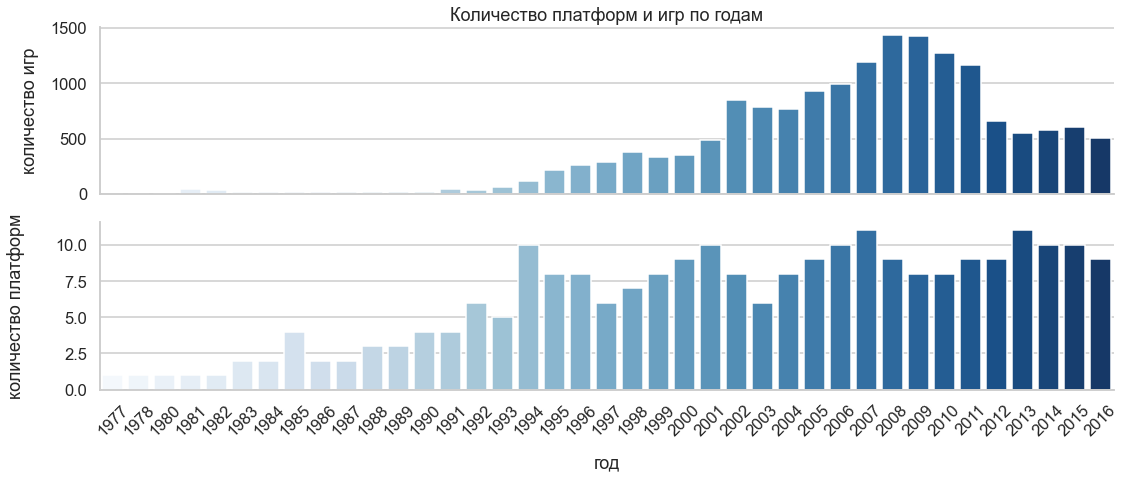

In [82]:
sns.set(style="whitegrid", context='talk')
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 7), sharex=True)

x  = list(games_amount.year)

y1 = list(games_amount.games_amount)
sns.barplot(x=x, y=y1, palette="Blues", ax=ax1)
ax1.set_ylabel("количество игр", labelpad=12)
ax1.set_xlabel("")
ax1.set_title("Количество платформ и игр по годам")

y2 = list(platforms_amount.diferent_platforms)
sns.barplot(x=x, y=y2, palette="Blues", ax=ax2)
ax2.set_ylabel("количество платформ", labelpad=30)

sns.despine(bottom=False)
plt.xticks(rotation=45)
plt.xlabel('год', labelpad=15)
plt.tight_layout()

Интересно, что количество игр растет до 2008 года и затем падает, при этом количество предствавленных платформ с 1994 года колеблется незначительно в диапазоне от 8 до 11, с редкими подениячми до 6 в 1997 и 2003 годах. По графику количества платформ похоже, что начиная с 1994 года каждые 6-7 лет количество одновременно присутсвующих платформ выходит на максимум. Старые еще популярны и к ним уже добавляются новые. Затем видно, что количество начинает уменьшаться, похоже за счет отмирания старых платформ. И снова пик через 6-7 лет за счет выхода новых.

Касательно важности данных, считаю, что можно было бы ограничить нижнюю границу исследования 2001 годом. Количество игр, выпущенных в 2001 году очень близко количеству игр в интересующем нас 2016 году. Количество платформ практичестки максимально. Кроме того, обрезав данные 2001 годом мы получим нормальное практически семитричное распределение данных по количеству выпущненных игр.

Но поскольку в следующем шаге нам нужно измерить изменения продаж по платформам, выбрать платформы с наибольшими суммарными продажами, а так же определить срокок появления новых и исчезновение старых платформ, то пока не будем ограничивать границы по году релиза

**Изменения продаж по платформам**

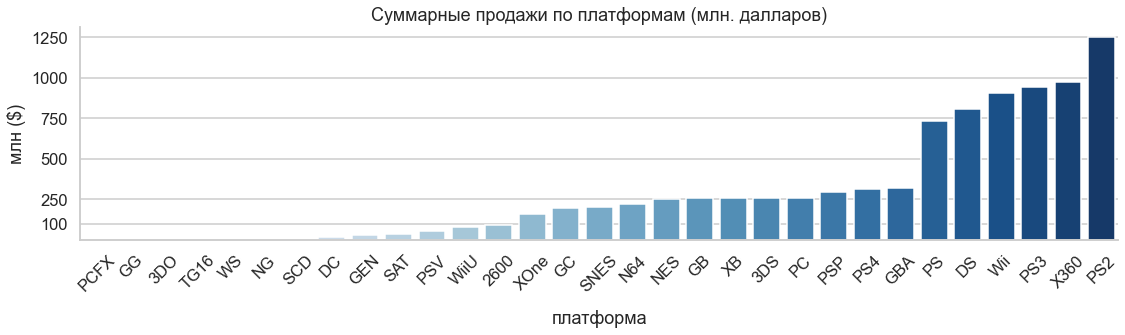

In [83]:
sns.set(style="whitegrid", context='talk')
f, (ax) = plt.subplots(figsize=(16, 5))
x = list(sales_per_platform.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales').index)
y = list(sales_per_platform.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales')['total_sales'])
sns.barplot(x=x, y=y, palette="Blues")

sns.despine(bottom=False)
plt.title("Суммарные продажи по платформам (млн. далларов)")
plt.xticks(rotation=45)
plt.xlabel('платформа', labelpad=15)
plt.yticks([100,250,500,750,1000,1250])
plt.ylabel('млн ($)', labelpad=5)
plt.tight_layout()

**Срок появления новых и исчезновение старых платформ**

`life_time` сгруппированный по платформам вышесозданный DataFrame `sales_per_platform`, к столбцу *year_of_release* которого применен сначала метод *min*, а затем *max*, данные записаны в соответствующие столбцы с датой первого и последнего появления игр для каждой платформы.

Теперь на основании этих данных будут созданы временные отрезки на графике.

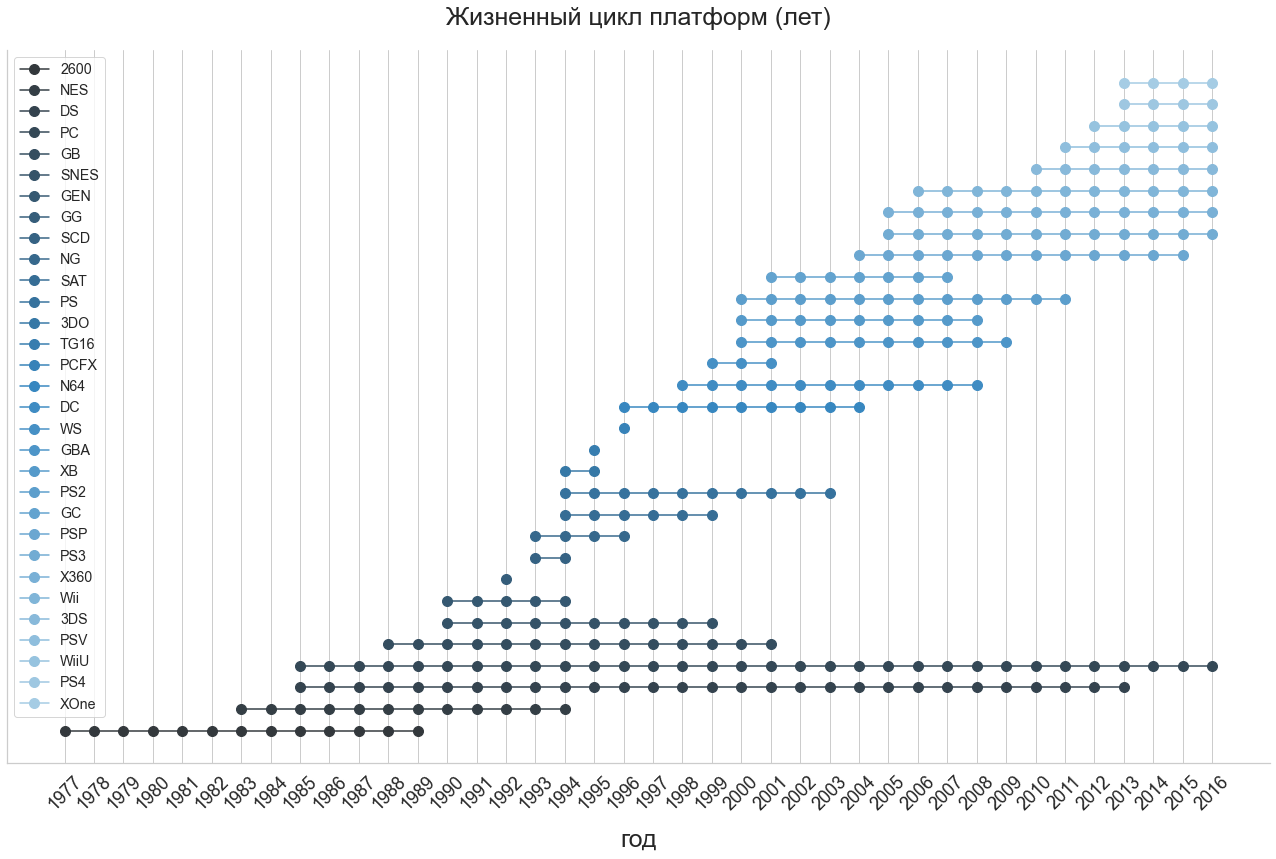

In [84]:
life_time               = sales_per_platform.groupby('platform').agg({'year_of_release':'min'})
life_time.columns       = ['birth_date']
life_time['death_date'] =  sales_per_platform.groupby('platform').agg({'year_of_release':'max'})
life_time['life_time']  = life_time['death_date'] - life_time['birth_date'] + 1
life_time = life_time.sort_values(by='birth_date').reset_index()

sns.set(style="whitegrid", font_scale=1.3)
plt.figure(figsize=(18,12.2))

with sns.color_palette("Blues_d", 31):
    for i in range(len(life_time)):
        x = np.linspace(life_time.loc[i,'birth_date'], life_time.loc[i,'death_date'], life_time.loc[i,'life_time'])
        y = np.linspace(i+1, i+1, life_time.loc[i,'life_time'])
        plt.plot(x, y, 'o-', markersize=10, label=life_time.loc[i,'platform'])

sns.despine(bottom=False)
plt.title("Жизненный цикл платформ (лет)",pad=25, fontdict = {'fontsize':25})
plt.xticks(list(np.arange(df.year_of_release.min(), df.year_of_release.max()+1)), rotation=45, size=18)
plt.xlabel('год', labelpad=15, fontdict = {'fontsize':25})
plt.yticks([])
plt.legend()
plt.tight_layout()

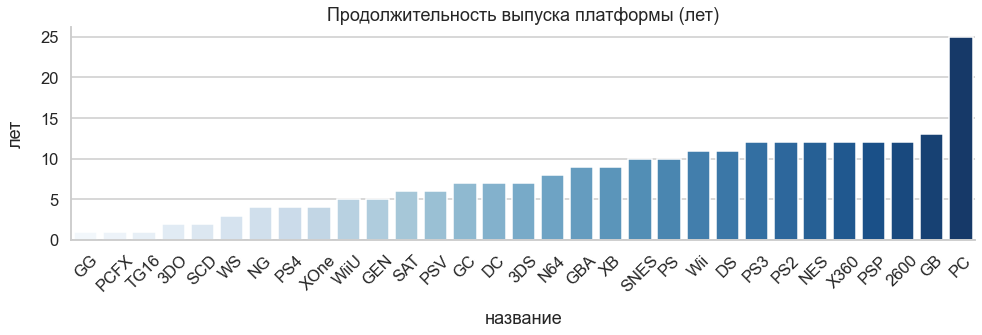

In [85]:
sns.set(style="whitegrid", context='talk')
f, (ax) = plt.subplots(figsize=(14, 5))
x = sales_per_platform.groupby('platform').agg({'year_of_release':'count'}).reset_index().sort_values(by='year_of_release'
                                                                                                     ).platform
y = sales_per_platform.groupby('platform').agg({'year_of_release':'count'}).reset_index().sort_values(by='year_of_release'
                                                                                                     ).year_of_release
sns.barplot(x=x, y=y, palette="Blues")

sns.despine(bottom=False)
plt.title("Продолжительность выпуска платформы (лет)")
plt.xticks(rotation=45)
plt.xlabel('название', labelpad=15)
plt.ylabel('лет', labelpad=15)
plt.tight_layout()   

Изучив время появления новых платформ на графиках выше, можно увидеть, что с момента появления первой, до появления второй прошло пять лет, но в дальнейшем этот срок сократился до двух-трех лет, а в какие-то моменты и вовсе до одного года. Правда, нужно отметить, что среди игровых платформ встречаются и неудачные, которые выпускались всего год, точнее в нашей таблице игры для них представлены всего одним годом. Но есть и долгожители, совершенно логично им оказался PC. В целом, современные платформы выпускаются около десяти лет. Более старые - около пяти. Так же мне показалась интересным долгая жизнь портативных приставок типа Gameboy (которая выпускалась 12 лет и потеряла популярность в двухтысячных, думаю с появлением достаточно мощных смартфорнов и игр для них), PSP (выпускалась более 10 лет) и PSV (6 лет и выпускается до сих пор)

**Выбор платформ с наибольшими суммарными продажами построение распределений по годам**

Сохраним в переменную `top_sales_df` шесть названий платформ с макисмальными продажами. По этим платформам продажи выше остальных почти в три раза и более.

Затем сделаем срез DataFrame `sales_per_platform`, в котором будут содержаться только нужные платформы и построим распределение по годам уровня продаж и количества игр.

In [86]:
top_sales    = list(sales_per_platform.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales'
                                                                                                 ).tail(6).index)
top_sales_df = sales_per_platform.query('platform in @top_sales')

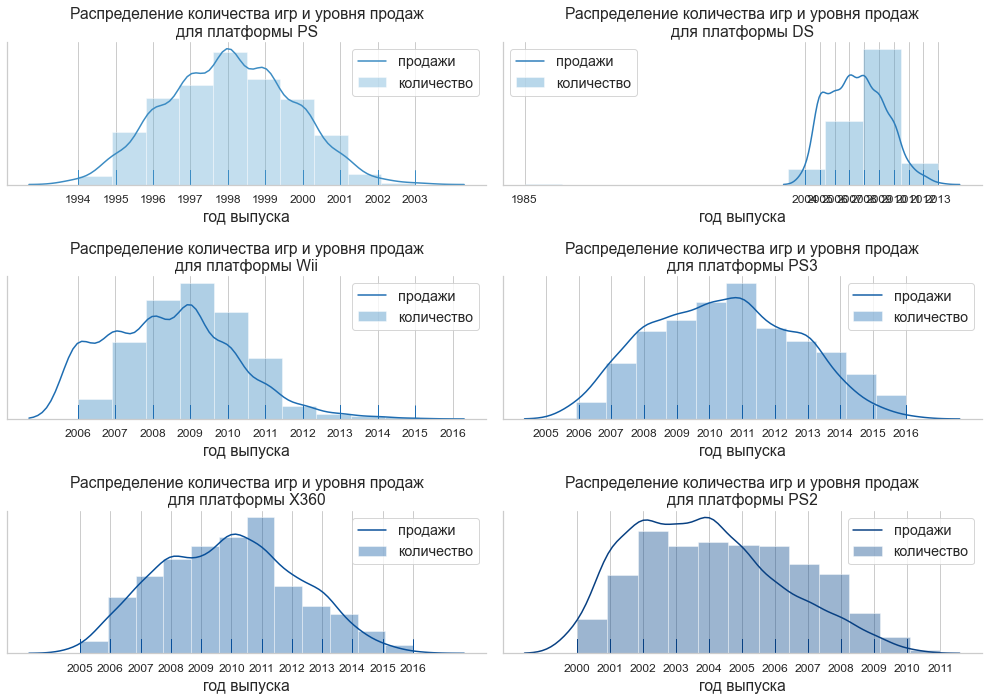

In [87]:
x_coordinates = [0, 1, 0, 1, 0, 1]
y_coordinates = [0, 0, 1, 1, 2, 2]

sns.set(style='whitegrid',font_scale=1.3)
# Формирование подложки для графиков (2 столбца, 3 ряда)
fg = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(ncols=2, nrows=3, figure=fg)
for i in range(len(top_sales)):
    games   = np.array(df[df.platform==top_sales[i]]['year_of_release'])
    fig_ax  = fg.add_subplot(gs[y_coordinates[i], x_coordinates[i]])
    
    x       = np.array(sorted(df[df.platform==top_sales[i]]['year_of_release'].unique()))
    y       = []
    years   = []
    for year in x:
        y.append(df[(df.platform==top_sales[i])&(df.year_of_release==year)]['total_sales'].sum())
        years.append(year)
    y      = np.array(y)
    sales = []
    for k in range(len(years)):
        for n in range(int(y.round(0)[k])):
            sales.append(years[k])

    sns.distplot(games,
                 bins=DISTPLOT_DICT[i]['bins'],
                 hist=True, kde=False,
                 color=sns.color_palette("Blues", n_colors=11)[i+5],
                 norm_hist=True,
                 label='количество')

    sns.distplot(sales,
                 bins=DISTPLOT_DICT[i]['bins'],
                 hist=False, kde=True, rug=True, rug_kws={'height':.1},
                 color=sns.color_palette("Blues", n_colors=16)[i+10],
                 norm_hist=True,
                 label='продажи')

    sns.despine(bottom=False)
    plt.title(DISTPLOT_DICT[i]['title'] + top_sales[i], loc='center')
    plt.xlabel(DISTPLOT_DICT[i]['xlabel'], labelpad=5)
    plt.xticks(list(df[df.platform==top_sales[i]]['year_of_release'].unique()), size=12)
    plt.yticks([])
    
plt.tight_layout()

Изучив распределение количества продаж и выручки по годам можно отметить, что для распределения количества выпускаемых игр для платформ с максимальными продажами, характерно нормальное семитричное распределение, с небольшое поправкой для платформ Xbox360 и PlayStation2. Для превой семитричность нарушает сильный спад после 2011 года, когда количество игр сократиолось вдвое, для второй наоборот с 2002 года и на протяжении пяти лет количество игр было близко к максимальному.

Распределение выручки по годам немного отличается от распределения количества игр. В основном это отличие для платформ *DS* и *Wii*. Распределение количества игр для этих платформ семетричное, а вот продажи начиная с самого начала приближенны к максимуму. Похоже, что на старте продаж компания Nintendo придерживается правила завышения стоимости для игр и за счет этого несмотря на меньшее количество получает более высокие продажи. Для всех трех поколений PlayStation, вошедших в топ по продажам распределение уровня продаж очень похоже на распределение количества игр. Для Xbox отсутсвует падение в два раза, которое мы видим на распределении количества игр. Падение сборов происходит более мягко.

Отдельно хочется отметить непопадание PC в список лидеров по продажам, не смотря на то что данная платформа самая "живучая" и игры для нее выпускаются с 1985 года, сумарные продажи в три раза меньше даже самой древней PlayStation первой генерации. Все таки специализированные девайсы для игр более удобны и привлекательны. К тому же думаю сказывается желание разработчиков обезопасить свои игры от пиратства, игры для консолей более защищены, в отличии от игр для персональных компьютеров. Кроме того производители консолей выпускают эксклюзивы, игры - представленные только для своих консолей и стоимость таких игр конечно выше.

**Определение актуального периода и срез данных за соответствующий период. Актуальный период определяется в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на следующий год**

Чуть выше, в начале шага по измерению продаж по платформам, срока появления новых и исчезновение старых платформ и выбора платформ с наибольшими суммарными продажами построение распределений по годам, было сказано, что вполне логично обреать год иследования нижней границей - 2001 год. После построения графиков распределения я считаю, что граница - 2001 год вполне нам подходит. Мы потеряем только данные по PlayStation первого поколения, но с тех пор вышло еще три генерации консоли количество игр и выручка для них не меньше, распределение похоже. Так что для следующих исследований режем нижнюю границу 2001 годом.

**Какие платформы лидируют по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ**

Нижняя граница игр - 2001 год подходит нам для изучения влияния отзывов и рейтингов на продажи, изучения корреляции между признаками, но они не нужны нам для определения потенциально прибыльных платформ, поскольку многие из них уже не выпускаются. Для изучения продаж и выявления лидеров мы рассмотрим только платформы выпускаемые на данный момент.

`still_exist` - список названий платформ, выпускаемых в настоящий момент

`still_exist_df` - DataFrame, содержащий только игры из списка `still_exist`

In [88]:
still_exist = list(df[df.year_of_release==2016]['platform'].unique())
still_exist

['3DS', 'PS4', 'XOne', 'PSV', 'PS3', 'PC', 'X360', 'WiiU', 'Wii']

В список попали три уже уходящие платформы: 'Wii', 'PS3', 'X360'

Вряд ли их можно отнести к переспективным. Мы помним, что среднее время жизни платформы - 10-11 лет. Посмотрим даты первых игр для этих платформ и предположим дату их ухода с рынка.

In [89]:
still_exist_df = df.query('(platform in @still_exist) & (year_of_release>=2005)'
                         )[['platform', 'year_of_release', 'total_sales']].copy()

In [90]:
old_platforms = ['Wii', 'PS3', 'X360']
births        = []
for name in old_platforms:
    births.append(still_exist_df[still_exist_df.platform==name]['year_of_release'].min())
deaths        = [x + 11 for x in births]

printer([['Название платформы', 'Год выхода', 'Предполагаемый год ухода с рынка'],
         [old_platforms[0], str(births[0]), str(deaths[0])],
         [old_platforms[1], str(births[1]), str(deaths[1])],
         [old_platforms[2], str(births[2]), str(deaths[2])]])

|Название платформы                     |Год выхода                     |Предполагаемый год ухода с рынка                     |
------------------------------------------------------------------------------------------------------------------------------
|Wii                                    |2006                           |2017                                                 |
------------------------------------------------------------------------------------------------------------------------------
|PS3                                    |2005                           |2016                                                 |
------------------------------------------------------------------------------------------------------------------------------
|X360                                   |2005                           |2016                                                 |
-----------------------------------------------------------------------------------------------------------

При всем уважении к заслуженным платформам дни их сочтены. Удалим их из нашего DataFrame.

In [91]:
still_exist_df = still_exist_df.query('platform not in @old_platforms')
still_exist_df = still_exist_df.groupby(['platform', 'year_of_release']).sum()

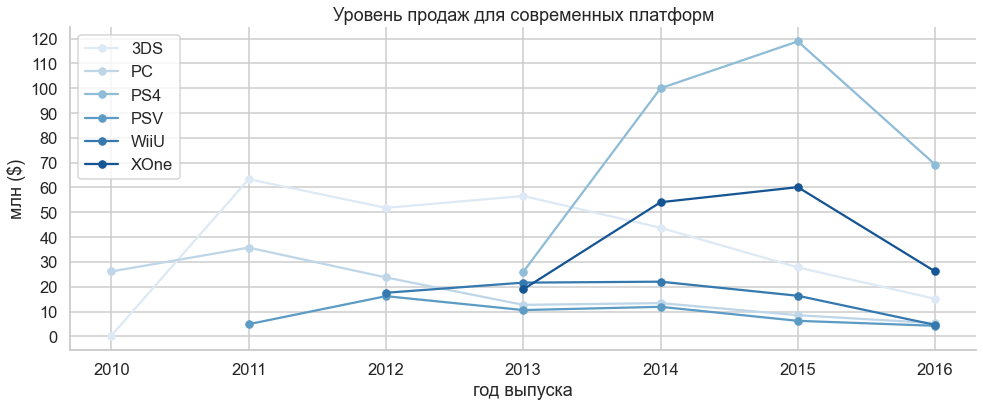

In [92]:
sns.set(style='whitegrid', context='talk')
sns.set_palette("Blues",6, .85)


fg        = plt.figure(figsize=(14, 6))
gs        = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)
platforms = list(still_exist_df.index.levels[0])
x         = np.arange(2010,2017)
fig_ax    = fg.add_subplot(gs[0, 0])

for name in platforms:
    temp_data                 = pd.DataFrame(index=np.arange(2010,2017))
    temp_data['total_sales']  = still_exist_df.loc[name]['total_sales']
    y                         = list(temp_data['total_sales'].round(2))
    plt.plot(x, y, '.-', ms=15, label=name)
    plt.legend(loc='best')

sns.despine(bottom=False)
plt.xticks(x)
plt.yticks(np.arange(0,130,10))
plt.title("Уровень продаж для современных платформ")
plt.ylabel("млн ($)")
plt.xlabel("год выпуска")
plt.tight_layout()

Опуская данные на 2016 год, поскольку он еще не закончен, можно сказать, что единственные две платформы, показавшие рост это, вышедшие в 2013 году PlayStation4 и Xbox One. При этом несмотря на примерно одинаковые сборы в 2013 рост продаж быстрее у PlayStation, однако и текущее падение пока больше у нее же.

Портативная консоль от Nintendo - 3DS, в качестве изюминки предлагающая 3D эффект без использования специальных очков, очень успешно стартовала в 2011 году, но начиная с 2013 сильно сдала позиции. В отличии от ее конкурента - портативной консоли PlayStation Vita от Sony, которая стартовала более скромно, но с момента появления показывает стабильность и держится на одном уровне.

Долгожитель PC в современном мире не способен конкурировать с консолями, уступая в продажах в несколько раз, однако, эта платформа стабильна и не реагирует на появление новых консолей. Так с момента выхода PlayStation4 и Xbox One уровень продаж игр для PC не изменился.

Так же надо отметить, что для PC и PlayStation Vita на текущий момент падение с уровня 2015 года не столь значительно, как для лидеров - PlayStation4 и Xbox One.

Исходя из вышесказанного, я бы в качестве перспективных оставил безсловно лидеров PlayStation4 и Xbox One, а в качестве платформ, которые не стоит отметать и посмотреть внимательнее оставил стабильные PC и PlayStation Vita. Консоли от Nintendo на сегодняшний день рассматривать в качестве перспективных я бы не стал в силу уже сказанного и в ожидании новой Nintendo Switch, которая анонсирована в следующем 2017 году.

**Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам. Описание результата**

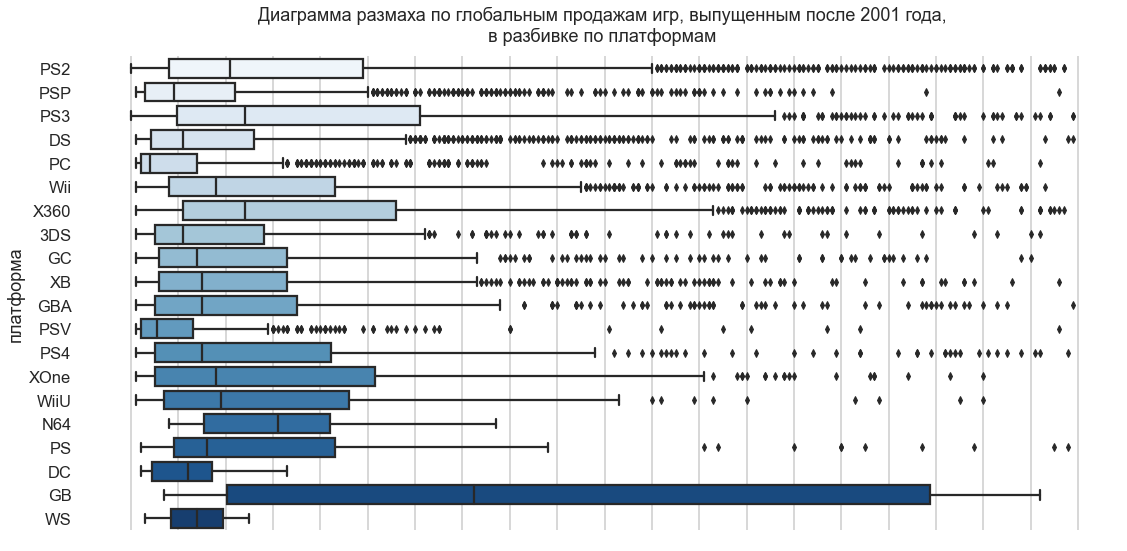

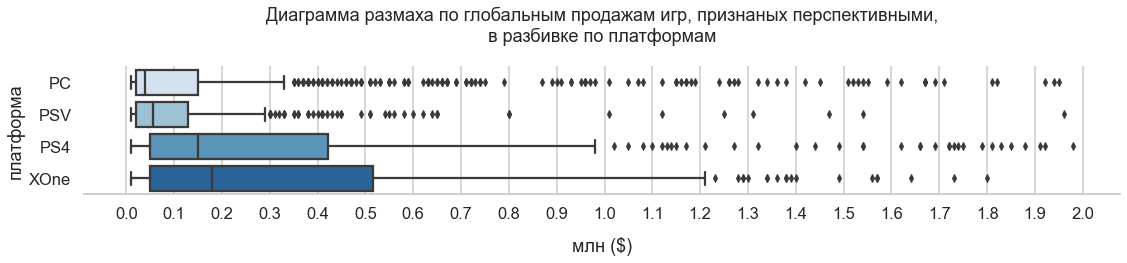

In [93]:
short_df   = df.query('year_of_release>2000 & total_sales<2').copy()
to_rmove   = ['X360','PS3','Wii', 'WiiU', '3DS']

try:
    for name in to_rmove:
        still_exist.remove(name)
except:
    pass

top_six_df = df.query('platform in @still_exist & total_sales<2').copy()

sns.set(style='whitegrid', context='talk')
sns.catplot(x='total_sales', y='platform',
            data=short_df,
            kind='box', orient='h',
            palette="Blues",
            height=8, aspect=2)

plt.title('Диаграмма размаха по глобальным продажам игр, выпущенным после 2001 года,'+'\n'+'в разбивке по платформам',
          pad=15)
plt.ylabel('платформа')
plt.xlabel('')
plt.xticks(np.arange(0,2.1,0.1), color='w', size=.1)
sns.despine(bottom=True, left=True)
plt.tight_layout()

sns.catplot(x='total_sales', y='platform',
            data=top_six_df,
            kind='box', orient='h',
            palette="Blues",
            height=4, aspect=4)

plt.title('Диаграмма размаха по глобальным продажам игр, признаных перспективными,'+'\n'+'в разбивке по платформам',
          pad=25)
plt.ylabel('платформа')
plt.xlabel('млн ($)', labelpad=15)
plt.xticks(np.arange(0,2.1,0.1))
sns.despine(bottom=False, left=True)
plt.tight_layout()

Диаграмма размаха наглядно показала занятную вещь - при сборах, достигающих десятков миллионов долларов за игру, нормальные значения для выручки по играм для большинства платформ укладываются в диапазон до 1 миллиона, реже - до 1.2 миллиона. Медиана и вовсе пролегает в пределах 100 - 300 тысяч. Для платформы GameBoy нормой оказались значения до 1.9 миллиона и медианой в районе 700 тысяч, но полагаю, это связано с тем, что в срез с датой от 2001 года попало очень мало значений.

Среди выбранных в качестве перспективных платформ медиана для новинок PlayStation4 и Xbox One примерно одинаковая, при этом третья квартиль прилично выше у Xbox One (+ 200 тысяч), получается что разброс выручки за игры для Xbox One в целом выше. Однако, если посмотреть на значения - выбросы для PlayStation4, то видно, что таких игр больше и сборы по ним выше. Возможно речь как раз об экслюзивах, выходящих только на PlayStation4.

Мы увидели, что граница нормального распределения выручки для игр много ниже многих значений. Поскольку при построении диаграммы размаха граница общей выручки по играм была срезана на двух миллионах для наглядности, посмотрим соотношение нормальных значений и выхлопов для количества игр и сборов по играм.

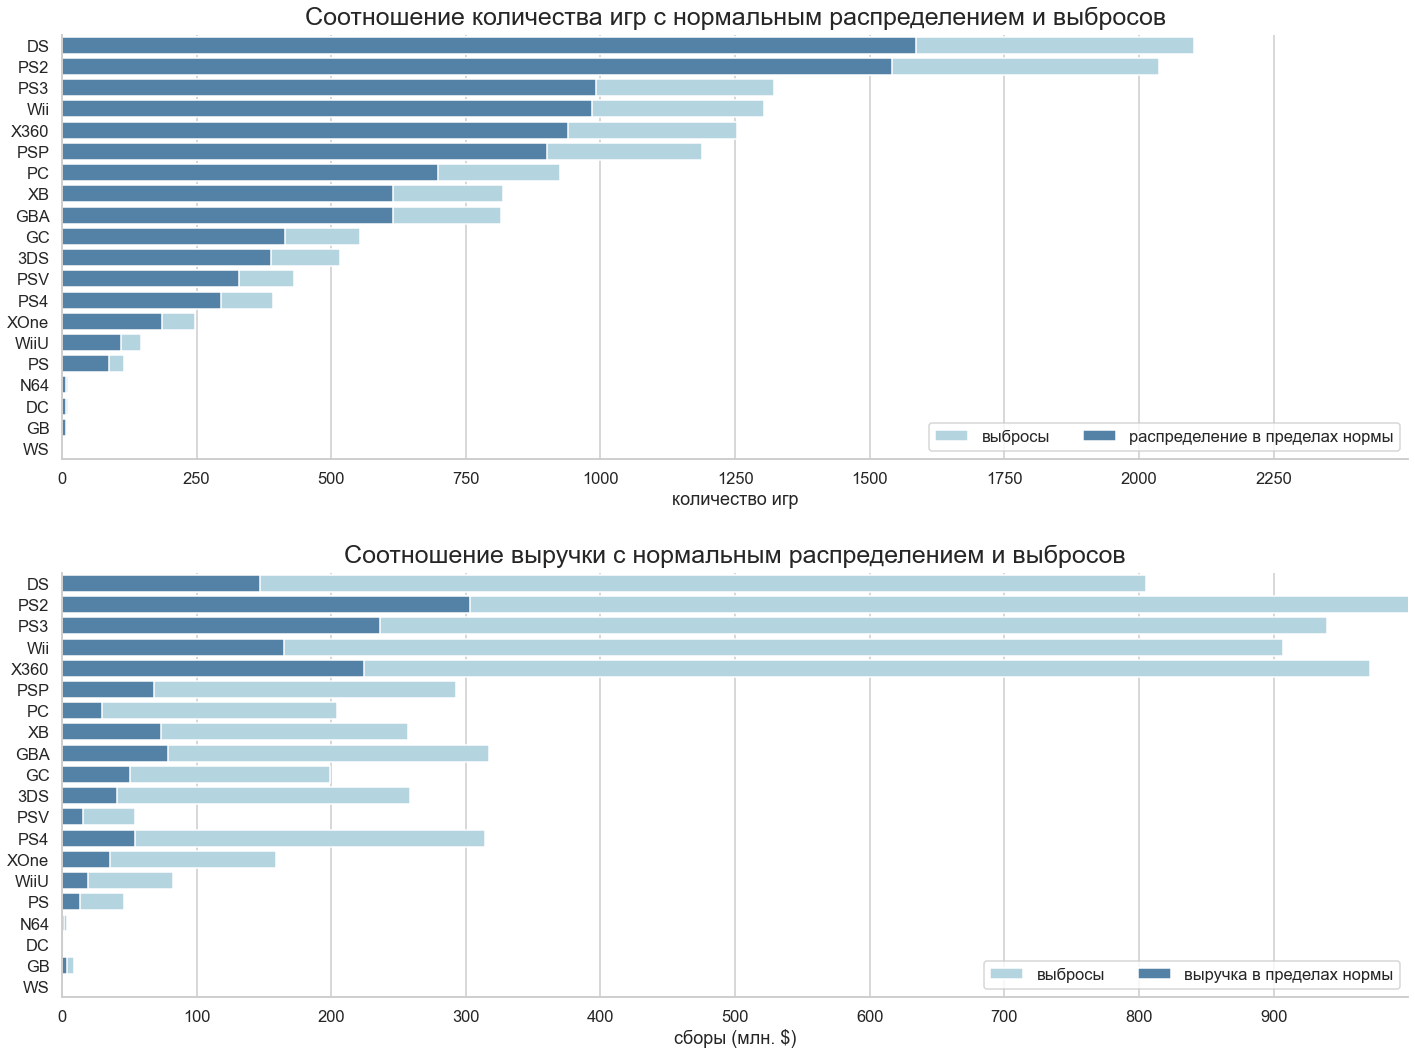

In [94]:
after_2000_df = df.query('year_of_release>2000').copy()
platforms,total_amount,total_sum,normal_amount,normal_sum,exhaust_amount,exhaust_sum = [],[],[],[],[],[],[]

for name in after_2000_df.platform.unique():
    temp_df   = after_2000_df[after_2000_df.platform==name]
    norm      = temp_df.total_sales.quantile(.75)
    platforms.append(name)
    total_amount.append(len(temp_df))
    total_sum.append(temp_df.total_sales.sum())
    normal_amount.append(len(temp_df[temp_df.total_sales<=norm]))
    normal_sum.append(temp_df[temp_df.total_sales<=norm]['total_sales'].sum())
    exhaust_amount.append(len(temp_df[temp_df.total_sales>norm]))
    exhaust_sum.append(temp_df[temp_df.total_sales>norm]['total_sales'].sum())
norm_exhaust_df = pd.DataFrame({'platform'      :platforms,     'total_amount':total_amount,'normal_amount':normal_amount, 
                                'exhaust_amount':exhaust_amount,'total_sum'   :total_sum,   'normal_sum'   :normal_sum, 
                                'exhaust_sum'   :exhaust_sum})
norm_exhaust_df = norm_exhaust_df.sort_values("total_amount", ascending=False)

sns.set(style="whitegrid", context='talk')
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(20, 15))

sns.barplot(x="total_amount", y="platform",
            data=norm_exhaust_df,
            label="выбросы",
            color = 'lightblue',
            ax=ax1)
sns.barplot(x="normal_amount",
            y="platform",
            data=norm_exhaust_df,
            label="распределение в пределах нормы",
            color = 'steelblue',
            ax=ax1)

ax1.legend(ncol=2, loc="lower right", frameon=True)
ax1.set(xlim=(0, 2500), ylabel="", xlabel="количество игр")
ax1.set_title("Соотношение количества игр с нормальным распределением и выбросов", fontdict = {'fontsize':25}, pad=10)
ax1.set_xticks(np.arange(0,2500,250))

sns.barplot(x="total_sum", y="platform",
            data=norm_exhaust_df,
            label="выбросы",
            color='lightblue',
            ax=ax2)
sns.barplot(x="normal_sum",
            y="platform", data=norm_exhaust_df,
            label="выручка в пределах нормы",
            color='steelblue',
            ax=ax2)

ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(xlim=(0, 1000), ylabel="", xlabel="сборы (млн. $)")
ax2.set_title("Соотношение выручки с нормальным распределением и выбросов", fontdict = {'fontsize':25}, pad=10)
ax2.set_xticks(np.arange(0,1000,100))

sns.despine(bottom=False)
plt.tight_layout(h_pad=2)

Теперь мы видим, что игр, попавших в нормальное распределение выручки примерно 3/4 от общего количества для платформы. Этот показатель примерно одинаков для всех платформ.

А вот соотношение общих продаж обратное. Для всех платформ минимум 3/4 от заработка прихоодится как раз на игры, которые попали в выбросы.

Подводя итог можно сказать, что четверть игр для консоли становится хитом и делает 60-80% продаж.

**Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами. Формулировка выводов**

Для оценки влияния отзывов на продажи возьмем PlayStation 3. Она конечно не самая новая, но все еще выпускается и для нее выпущенно уже большое количество игр. Исследование будет более репрезентативным, чем если брать более современную PlayStation 4.

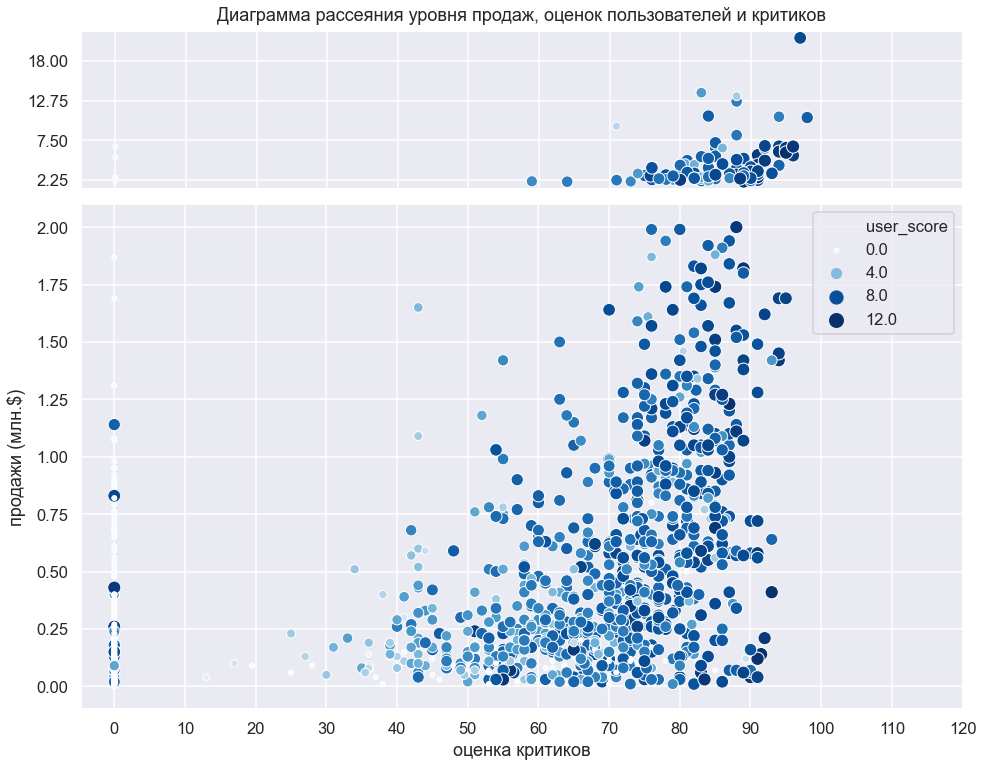

In [95]:
sales_ps3 = df[df.platform=='PS3'][['total_sales', 'critic_score', 'user_score_filled', 'rating', 'rating_num']].copy()
sales_ps3.rename(columns={'user_score_filled':'user_score'},inplace=True)
rating = list(sales_ps3['rating'].unique())

sns.set(style="darkgrid",  context='talk')

fig = plt.figure(figsize=(14, 11))

ax0 = plt.subplot2grid((4, 1), (0, 0))
sns.scatterplot(x="critic_score", y='total_sales',
                hue="user_score",
                hue_order="user_score",
                palette="Blues", legend=False,
                sizes=(25, 180), linewidth=1, size="user_score",
                data=sales_ps3[sales_ps3['total_sales']>2], ax=ax0)
plt.title('Диаграмма рассеяния уровня продаж, оценок пользователей и критиков',pad=10)
plt.xlabel('')
plt.ylabel('')
plt.xticks(np.arange(0,130,10), color='w', size=.01)
plt.yticks(np.arange(2.25,20,5.25))

ax1 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
sns.scatterplot(x="critic_score", y='total_sales',
                hue="user_score",
                hue_order="user_score",
                palette="Blues", legend='brief',
                sizes=(25, 180), linewidth=1, size="user_score",
                data=sales_ps3[sales_ps3['total_sales']<=2], ax=ax1)
plt.xlabel('оценка критиков', labelpad=5)
plt.ylabel('продажи (млн.$)', labelpad=10)
plt.xticks(np.arange(0,130,10))
plt.tight_layout(h_pad=.1)


На диаграмме видно, что безусловно оценки связаны с выручкой от игр. Мы видим, что плотность в верхней части диаграммы (игры с продажами выше  двух миллионов) смещена по оси Х вправо. То есть выручки выше 500 тысяч долларов свойственны играм с оценкой критиков от 50 баллов, а по-настоящему прибыльные игры имеют оценку критиков от 70 баллов. Для игр с оценками до 50 баллов продажи выше 500 тысяч практически не встречаются и в основном составляют до 250 тысяч.

При этом стоит отметить, что и среди игр восе без оценок встречаются продажи до 7.5 миллионов, а среди игр без оценок критиков встречаются игры с высокими оценками игроков.

Нулевые оценки пользователей встречаются и среди игр с высокими оценками критиков, думаю это как раз игры с оценкой *tbd*, которые мы заменили на 0 для построения графиков и диаграмм.

Оценки пользователей связаны с продажами чуть меньше. Мы видим в правой верхней части графика достаточно много игр с оценкой пользователей от сорока баллов.

При этом можно сказать, что оценки пользователей достаточно плотно связанны с оценками критиков. Если смотреть вдоль оси Х, то мы видим, что меньшим значениям оценки критиков в основном соответствуют кружочки посветлее и поменьше, отображающие игры с низким рейтингом игроков. Хотя тут тоже нельзя говорить о 100% зависимости.

Построим таблицу корреляции, чтобы удостовериться в правильности наших выводов или опровергнуть их.

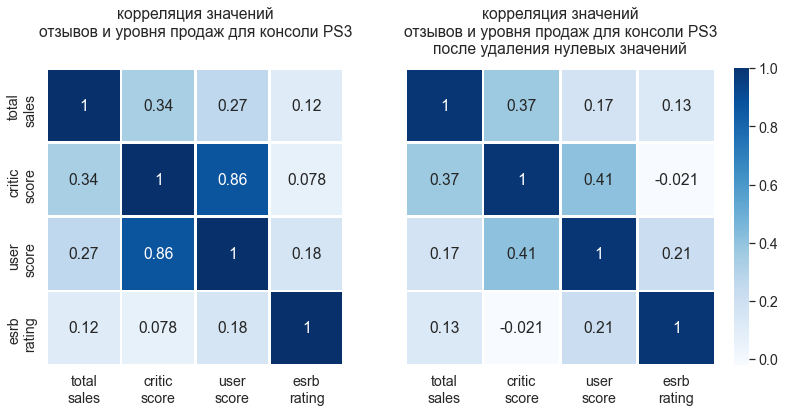

In [96]:
sns.set(font_scale=1.3)
fg = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0])

sns.heatmap(sales_ps3.corr(),annot=True,
            cmap='Blues', linewidths=1.5,
            cbar_kws={'ticks':np.arange(0,1.1,0.1)}, cbar=False,
            center=.5,
            xticklabels=['total\nsales','critic\nscore','user\nscore', 'esrb\nrating'],
            yticklabels=['total\nsales','critic\nscore','user\nscore', 'esrb\nrating'],
            #yticklabels=False,
            square=True)
plt.title("корреляция значений\nотзывов и уровня продаж для консоли PS3\n",pad=15)

fig_ax_2 = fg.add_subplot(gs[0, 1])
sns.heatmap(sales_ps3.query('critic_score!=0 or user_score!=0').corr(),
            annot=True, cmap='Blues', linewidths=1.5,
            cbar_kws={'ticks':np.arange(0,1.2,0.2)}, 
            center=.5,
            xticklabels=['total\nsales','critic\nscore','user\nscore', 'esrb\nrating'],
            yticklabels=False,
            square=False)
plt.title("корреляция значений\nотзывов и уровня продаж для консоли PS3\nпосле удаления нулевых значений",pad=15)
plt.tight_layout()

Я думаю, что таблица корреляции признаков подтвердила наши выводы после построения диаграммы рассеяния. Есть достаточно сильная связь между оценками критиков и суммарными продажами. Оценки пользователей связанны с коммерческим успехом игры чуть в меньшей степени, уровень корреляции 0.27 против 0.34, поэтому на диаграмме встречаются достаточно низкие оценки пользователей для успешных в плане продаж игр с высокими оценками критиков.

Удаление нулевых значений оценок пользователей и критиков немного укрепляет связь между оценками критиков и продажами игр, корреляция между оценками пользователей становится меньше. Нет смысла рассматривать такие данные поскольку мы видили на диаграме есть весьма успешные игры только с одним видом оценок или вовсе без них.

Так что получается, что при выборе перспективных жанров вдальнейшем, можно брать во внимание только оценки критиков. Рейтинги игр большого влияния на успех игры не оказывают, уровень корреляции 0.12, а корреляция между оценками критиков и оценками игроков столь высока (0.86), что мы можем быть уверенными, что если для игры или жанра оценки критиков высоки, то и оценки игроков им соответсвуют.

**Соотношение выводов с продажами игр на других платформах**

Принимая во внимание, что таблица корреляции отзывыв, рейтинга и уровня продаж точно харрактеризует диаграмму рассеяния для тех же признаков, для соотношения данных по исследованной PlayStation3 с другим перспективным платформам можно провести на основе только таблицы корреляции.

На данный момент перспективными признаны 4 платформы:
- PlayStation 4;
- XboxOne;
- PSV;
- PC.

Сравним уровень корреляции признаков именно с этими платформами + добавим к ним Xbox360, как самую успешную из консолей Xbox, поскольку XboxOne, как и PlayStation4, выпускается только 3 года и количество игр и отзывов может быть недостатолчным для получения более точных данных.

Поскольку PC как игровая платформа представлен аж с 1985 года и наверняка старые игры имеют меньше отзывов, для построяния таблицы корреляции обрежем границу исследования 2004 годом. Это год появления PlayStation3 и Xbox360.

<a id='top_genres_esrb_global'></a>

In [97]:
columns_corr = list(top_six_df.platform.unique())
columns_corr.append('PS3')
columns_corr.append('X360')
columns_corr = sorted(columns_corr)
sales_top_df = df.query('platform in @columns_corr & year_of_release>2003')[['platform', 'total_sales','critic_score',
                                                                             'user_score_filled','rating_num']].copy()
sales_top_df.rename(columns={'user_score_filled':'user_score'},inplace=True)

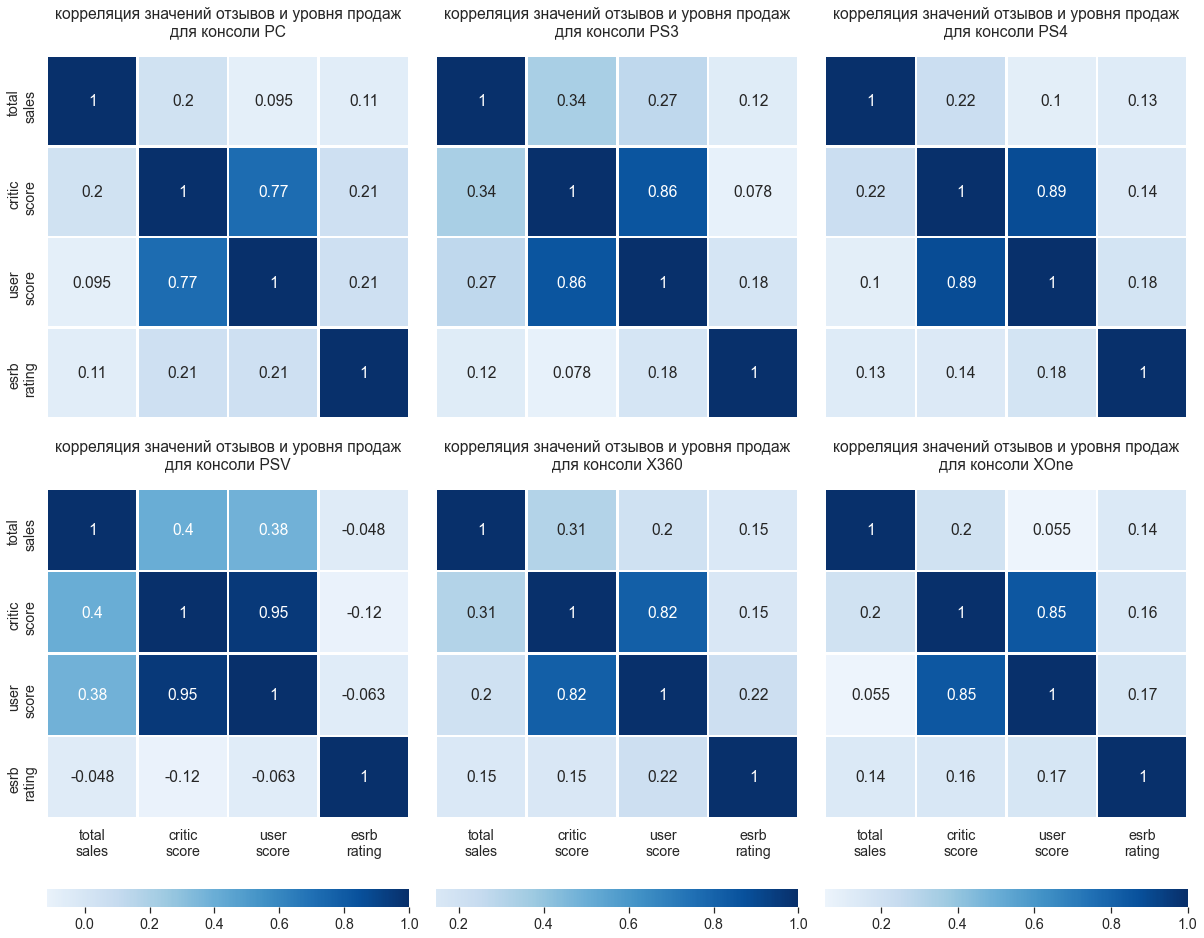

In [98]:
sns.set(font_scale=1.3)
fg = plt.figure(figsize=(17, 14))
gs = gridspec.GridSpec(ncols=3, nrows=2, figure=fg)

x_coordinates = [0,1,2,0,1,2]
y_coordinates = [0,0,0,1,1,1]
xticklabels   = [False, False, False,
                 ['total\nsales','critic\nscore','user\nscore', 'esrb\nrating'],
                 ['total\nsales','critic\nscore','user\nscore', 'esrb\nrating'],
                 ['total\nsales','critic\nscore','user\nscore', 'esrb\nrating']]
yticklabels   = [['total\nsales','critic\nscore','user\nscore', 'esrb\nrating'], False, False,
                 ['total\nsales','critic\nscore','user\nscore', 'esrb\nrating'], False, False]
centers       = [.5,.5,.5,.4,.5,.5]
cbars         = [False, False, False, True, True, True]
squares       = [True, True, True, False, False, False]
#yticklabels  = [False, False, False,
#                 False, False, False]

for i in range(len(columns_corr)):
    fig_ax_1 = fg.add_subplot(gs[y_coordinates[i], x_coordinates[i]])

    sns.heatmap(sales_top_df[sales_top_df.platform==columns_corr[i]].corr(),
                annot=True, cmap='Blues', linewidths=1.5, center = centers[i], square=squares[i],
                cbar = cbars[i], cbar_kws={'ticks':np.arange(0,1.2,0.2), "orientation": "horizontal"},
                xticklabels=xticklabels[i],
                yticklabels=yticklabels[i])
    plt.title("корреляция значений отзывов и уровня продаж\nдля консоли "+columns_corr[i],pad=20)
    
plt.tight_layout(h_pad=0)

В целом можно сказать, что выводы, сделанные после анализа таблицы корреляции PlayStation3, справедливы и для остальных платформ. Главный конкурент X360 имеет очень близкие показатели корреляции признаков. Как мы и предполагали из-за меньшего количества игр и времени на рынке, данные для новейших PlayStation4 и XOne немного отличаются, меньше корреляция между оценками и уровнем продаж.

Для всех платформ харрактерен высокий уровень корреляции для оценок игроков и критиков, так что вывод о том, что можно руководствоваться в прогнозах оценками критиков вполне справедлив.

Рейтинг ESRB практически не оказывает влияния на уровень продаж.

[Вперед в изучению влияния рейтинга в зависимости от страны](#top_genres_esrb)

**Изучение распределения игр по жанрам. Описание самых прибыльных жанров. Влияние жанра на продажи**

Для данного исследования создадим два DataFrame. Первый - `platforms_after_2001` - срез рабочего DataFrame по году выпуска игр начиная с 2001, во втором - `perspective_platforms` добалено условие вхождения платформ в список, признанных перспективными.

Далее из каждого получившегося DataFrame создадим два. С подсчетом количества игр и с подсчетом суммы продаж. Так мы сможеи оценить менялось ли количество игр и выручка по ним для современных платформ вообще и для платформ, которые мы решили считать перепективными.

In [99]:
platforms             = ['PC','PS4', 'PSV', 'XOne']
platforms_after_2001  = df.query('year_of_release>2000')[['genre', 'total_sales']].copy()
platforms_after_2001  = platforms_after_2001.replace('Role-Playing', 'RPG')
amount_after_2001     = platforms_after_2001.groupby('genre').count().reset_index()
amount_after_2001     = amount_after_2001.sort_values(by='total_sales')
sum_after_2001        = platforms_after_2001.groupby('genre').sum().reset_index()
sum_after_2001        = sum_after_2001.sort_values(by='total_sales')

perspective_platforms = df.query('year_of_release>2000 & platform in @platforms')[['genre', 'total_sales']].copy()
perspective_platforms = perspective_platforms.replace('Role-Playing', 'RPG')
amount_perspective    = perspective_platforms.groupby(['genre']).count().reset_index()
amount_perspective    = amount_perspective.sort_values(by='total_sales')
perspective_sum       = perspective_platforms.groupby(['genre']).sum().reset_index()
perspective_sum       = perspective_sum.sort_values(by='total_sales')

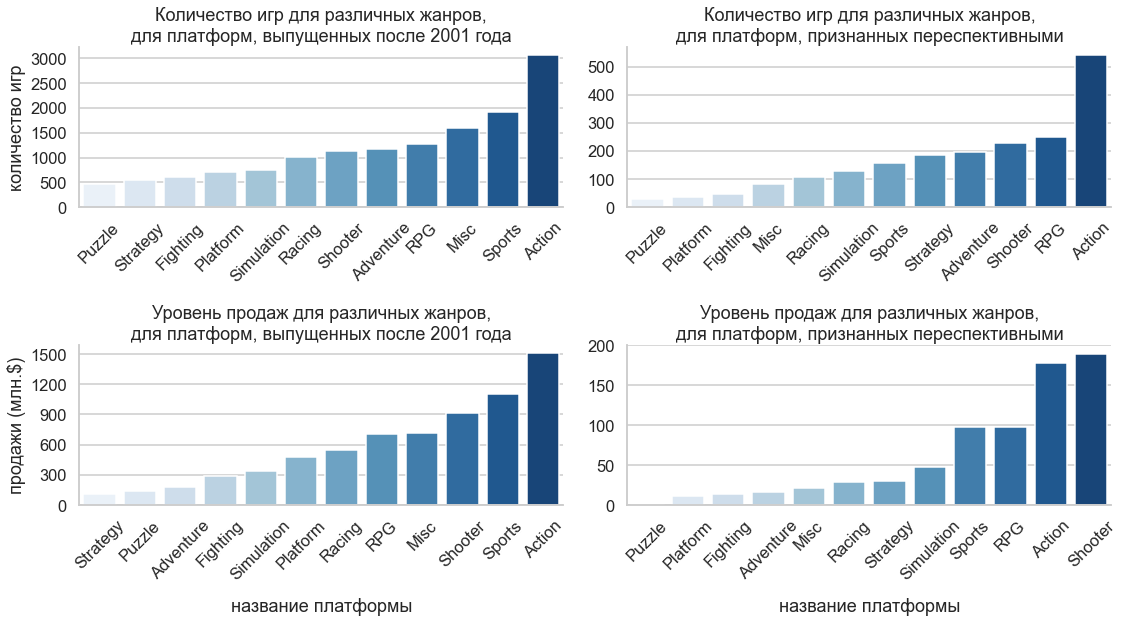

In [100]:
# Оформление подложки под 4 графика (2 столбца в 2 рядах)
sns.set(style="whitegrid", context='talk')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

# График 1
x1 = list(amount_after_2001.genre)
y1 = list(amount_after_2001.total_sales)
sns.barplot(x=x1, y=y1, palette="Blues", ax=ax1)
ax1.set_title('Количество игр для различных жанров,'+'\n'+'для платформ, выпущенных после 2001 года')
ax1.set_xlabel("")
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_ylabel("количество игр")
ax1.set_yticks(np.arange(0,3500,500))
# График 2    
x2 = list(amount_perspective.genre)
y2 = list(amount_perspective.total_sales)
sns.barplot(x=x2, y=y2, palette="Blues", ax=ax2)
ax2.set_title('Количество игр для различных жанров,'+'\n'+'для платформ, признанных переспективными')
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
ax2.set_yticks(np.arange(0,600,100))
# График 3
x3 = list(sum_after_2001.genre)
y3 = list(sum_after_2001.total_sales)
sns.barplot(x=x3, y=y3, palette="Blues", ax=ax3)
ax3.set_title('Уровень продаж для различных жанров,'+'\n'+'для платформ, выпущенных после 2001 года')
ax3.set_xlabel('название платформы', labelpad=15)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
ax3.set_ylabel("продажи (млн.$)")
ax3.set_yticks(np.arange(0,1800,300))
# График 4 
x4 = list(perspective_sum.genre)
y4 = list(perspective_sum.total_sales)
sns.barplot(x=x4, y=y4, palette="Blues", ax=ax4)
ax4.set_title('Уровень продаж для различных жанров,'+'\n'+'для платформ, признанных переспективными')
ax4.set_xlabel('название платформы', labelpad=15)
for tick in ax4.get_xticklabels():
    tick.set_rotation(45)
ax4.set_yticks(np.arange(0,250,50))    

sns.despine(bottom=False)
plt.tight_layout()

Самым выпускаемым является жанр *Action*. Он является таковым и для современных платформ в целом, и для перспективных в частности. Однако для прибыли по жанрам *Action* первый только для современных платформ, для среза по перспективным платформам его обходит *Shooter*. Хотя и не на много.

Жанр *Shooter* - третий по количеству выпускаемых игр и первый по продажам среди перспективных платформ, а в выборке по платформам новее 2000 года был шестым по количеству игр и третим по продажам. Игры этого жанра видимо в среднем дороже остальных. Это подтверждается так же соотношением выпущенных игр к сборам. Для перспективных платформ количество выпущенных игр в жанре *Shooter* более чем в два раза ниже количества игр в жанре *Action*, а сборы выше.

Третие по продажам жанр среди перспективных платформ - *RPG* и *Sports*. При этом по куличеству выпущенных игр *RPG* занимает второе место, а Sports только шестое. То есть в среднем игры Sports более прибыльны. При рассмотрении платформ выпущенных после 2000 года, жанр Sports был более успешен - твердое второе место и по количеству игр, и по уровню продаж. 

Остальные жанры даже не сильно уступая лидерам в количестве игр, сильно проигрывают в продажах.

Самыми прибыльными жанрами являются *Shoter*, *Action*, *RPG* и *Sports*

Мы нашли самые прибыльные жанры. Однако, в таком ли порядке эти жанры расположились для каждой из наших платформ по-отдельности или для различных платформ лидеры разные?

Посмотрим...
<a id='top_genres_1'></a>

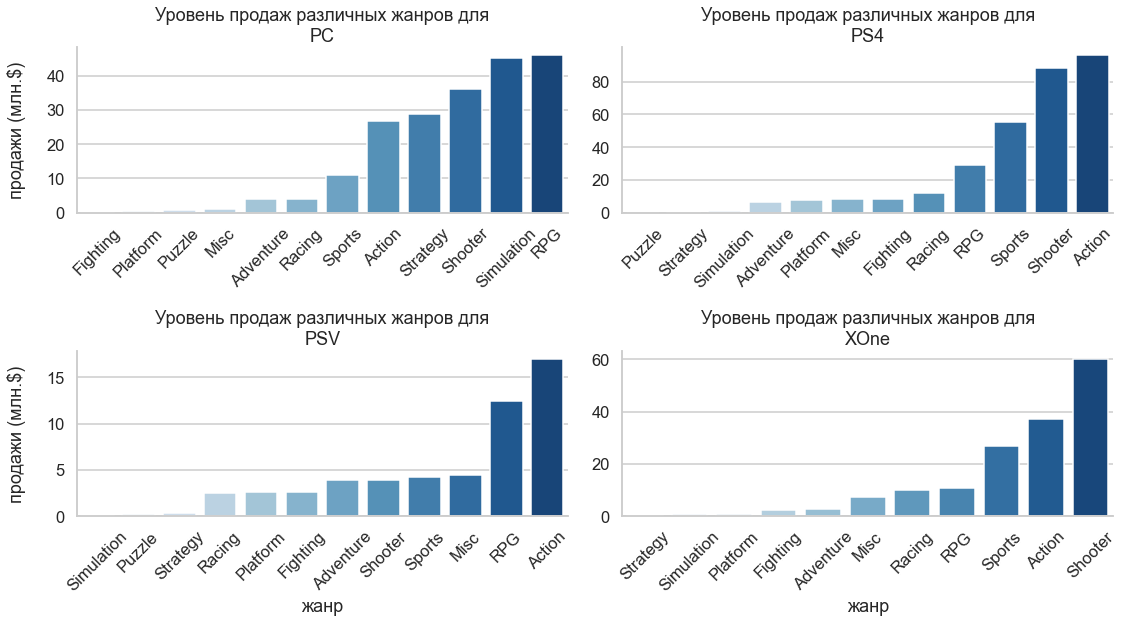

In [101]:
perspective_platforms = df.query('year_of_release>2000 & platform in @platforms'
                                )[['genre', 'platform','total_sales']].copy()
perspective_platforms = perspective_platforms.replace('Role-Playing', 'RPG')
x_coordinates         = [0,0,1,1]
y_coordinates         = [0,1,0,1]
xlabels               = ["","","жанр","жанр"]
ylabels               = ["продажи (млн.$)","","продажи (млн.$)",""]
yticks                = [np.arange(0,50,10),np.arange(0,100,20),np.arange(0,20,5),np.arange(0,80,20)]

# Оформление подложки под 4 графика (2 столбца, 3 ряда)
sns.set(style="whitegrid", context='talk')
fg = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fg)

#fig_ax = fg.add_subplot(gs[0, 0:2])       
#plt.title('Уровень продаж для различных жанров,'+'\n'+'для платформ, признанных переспективными', loc='center')
#plt.ylabel("продажи (млн.$)", labelpad=13)
#x = list(perspective_sum.genre)
#y = list(perspective_sum.total_sales)
#sns.barplot(x=x, y=y, palette="Blues")
#plt.xticks(size=12)

for i in range(len(platforms)):
    temp_df = perspective_platforms[perspective_platforms.platform==platforms[i]]
    temp_df = temp_df.groupby(['genre']).sum().reset_index()
    temp_df = temp_df.sort_values(by='total_sales')
    fig_ax  = fg.add_subplot(gs[x_coordinates[i], y_coordinates[i]])
    plt.title('Уровень продаж различных жанров для'+'\n'+platforms[i], loc='center')
    x = list(temp_df.genre)
    y = list(temp_df.total_sales)
    sns.barplot(x=x, y=y, palette="Blues")
    plt.xticks(rotation=45)
    plt.ylabel(ylabels[i], labelpad=20)
    plt.yticks(yticks[i])
    plt.xlabel(xlabels[i])
    
sns.despine(bottom=False)    
plt.tight_layout()

<a id='top_genres_box'></a>

Для новых платформ четыре выбранных жанра остались те же, хотя и в разной последовательности. Интересно, что для PlayStation4 жанры *Shooter* и *Action* имеют почти одинаковый уровент продаж, а для XboxOne *Action* на треть меньше. Но в целом четверка лидеров та же. Для PSV жанр *Shooter* уступил место *Misc*, а для PC сразу два жанра не попали в число самых успешных. В виду относительно не больших продаж среди платформ PC и PSV, мы не станем менять четверку самых прибыльных жанров, однако будем помнить о различиях при планировании бюджета на рекламную компанию.

Оценим также распределение выручки по жанрам для перспективных платформ, путем построения boхplot.

[Вперед к сравнению жанров Американский рынок](#top_genres_2)

[Вперед к сравнению жанров Японский рынок](#top_genres_3)

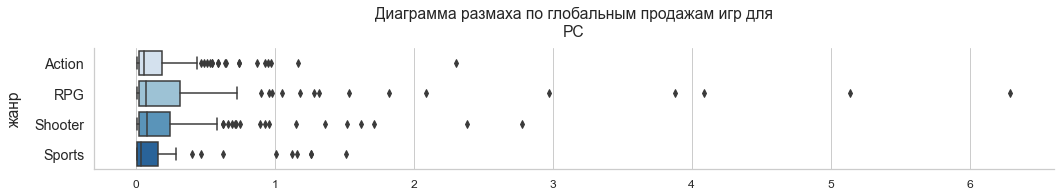

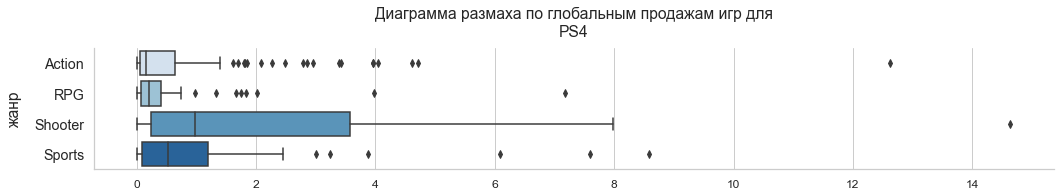

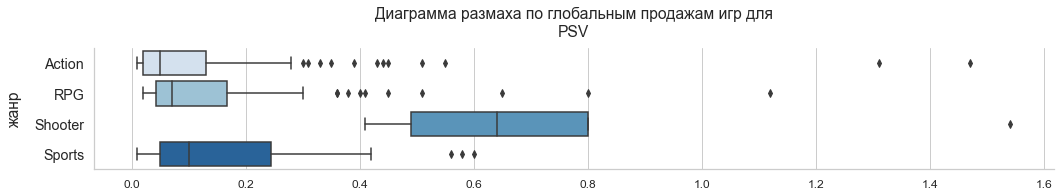

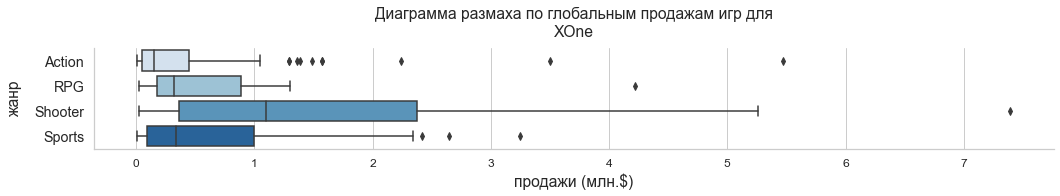

In [102]:
perspective_genres = ['Action','Shooter','Sports','RPG']
genres_boxplot     = perspective_platforms.query('genre in @perspective_genres')
xlabels            = ['','','','продажи (млн.$)']
sns.set(style='whitegrid', font_scale=1.3)
for i in range(len(platforms)):
    temp_df = genres_boxplot[genres_boxplot.platform==platforms[i]]
    temp_df = temp_df.sort_values(by='genre')
    sns.catplot(x='total_sales', y='genre',
            data=temp_df,
            kind='box', orient='h',
            palette="Blues",
            height=3, aspect=5)
    
    plt.title('Диаграмма размаха по глобальным продажам игр для'+'\n'+platforms[i], pad=12)
    plt.xlabel(xlabels[i])
    plt.xticks(size=12)
    plt.ylabel('жанр', labelpad=12)
    
    plt.tight_layout()

[Вперед к сравнению жанров Американский рынок](#top_genres_2)

[Вперед к сравнению жанров Японский рынок](#top_genres_3)

Для PlayStation4 и XboxOne продажи для жанра *Shooter* и *Sports* и правда выше, чем для остальных двух жанров. Мы видим, что нормальным уровнем продаж для *Shooter* и *Sports* является диапозон до 8 миллионов у PlayStation4 и более 5 миллионов для  XboxOne, тогда как для остальных жанров этих платформ третья квартиль не превышает 2.5 миллионов. Продажи жанров *Sports*, *Action* и *RPG* для PlayStation4 и XboxOne примерно одинаковые, но нормальные продажи для *Shooter* почти на 3 миллиона выше для PlayStation4. То есть самый прибыльный жанр - *Shooter* прибыльнее у PlayStation4. Учтем это при прогнозировании бюджета.

Еще одно наблюдение касается жанра *Action*. На диаграмме видно, что большинство игр жанра *Sports* являются более прибыльными, а общее превосходство жанра *Action* достигается засчет выбросов.

Количество выбросов со значением выше 3 миллионов больше всего у *Shooter*, игры этого жанра чеще других становятся супер успешными. Это верно для всех платформ кроме PC. Тут лидером является *RPG*, для этого жанрна и нормальные продажи по играм достигают  почти миллиона и выбросов до 2 миллионов достаточн много, а отдельные значения достигают 5-6 миллионов, что уже сопастовимо с продажами лидеров PlayStation4 и XboxOne.

В целом для всех платформ распределение выручки нормальное, но сильно смещенной в положительную сторону.

<a id='resume_3'></a>
### Шаг 3. Выводы

Втом шаге были проведены исследования:

- Количества выпускаемых в разные годы игр и анализ данных для выявления периода, необходимого для нашего исследования;

Количество игр растет до 2008 года и затем падает, при этом количество предствавленных платформ с 1994 года колеблется незначительно в диапазоне от 8 до 11, с редкими подениячми до 6 в 1997 и 2003 годах. По графику количества платформ похоже, что начиная с 1994 года каждые 6-7 лет количество одновременно присутсвующих платформ выходит на максимум. Старые еще популярны и к ним уже добавляются новые. Затем видно, что количество начинает уменьшаться, похоже за счет отмирания старых платформ. И снова пик через 6-7 лет за счет выхода новых.
Важными в результате этого шага были признаны данные начиная с 2001 года. Количество игр, выпущенных в 2001 году очень близко количеству игр в интересующем нас 2016 году. Количество платформ практичестки максимально. Кроме того, обрезав данные 2001 годом мы получли нормальное практически семитричное распределение данных по количеству выпущненных игр по годам.

- Изменения продаж по платформам. Выбор платформ с наибольшими суммарными продажами построение распределений по годам. Срок появления новых и исчезновение старых платформ;

Изучив время появления новых платформ на графиках выше, можно увидеть, что с момента появления первой, до появления второй прошло пять лет, но в дальнейшем этот срок сократился до двух-трех лет, а в какие-то моменты и вовсе до одного года. Правда, нужно отметить, что среди игровых платформ встречаются и неудачные, которые выпускались всего год, точнее в нашей таблице игры для них представлены всего одним годом. Но есть и долгожители, совершенно логично им оказался PC. В целом, современные платформы выпускаются около десяти лет. Более старые - около пяти. Так же мне показалась интересным долгая жизнь портативных приставок типа Gameboy (которая выпускалась 12 лет и потеряла популярность в двухтысячных, думаю с появлением достаточно мощных смартфорнов и игр для них), PSP (выпускалась более 10 лет) и PSV (6 лет и выпускается до сих пор)

Изучив распределение количества продаж и выручки по годам можно отметить, что для распределения количества выпускаемых игр для платформ с максимальными продажами, характерно нормальное семитричное распределение, с небольшое поправкой для платформ Xbox360 и PlayStation2. Для превой семитричность нарушает сильный спад после 2011 года, когда количество игр сократиолось вдвое, для второй наоборот с 2002 года и на протяжении пяти лет количество игр было близко к максимальному.

Распределение выручки по годам немного отличается от распределения количества игр. В основном это отличие для платформ DS и Wii. Распределение количества игр для этих платформ семетричное, а вот продажи начиная с самого начала приближенны к максимуму. Похоже, что на старте продаж компания Nintendo придерживается правила завышения стоимости для игр и за счет этого несмотря на меньшее количество получает более высокие продажи. Для всех трех поколений PlayStation, вошедших в топ по продажам распределение уровня продаж очень похоже на распределение количества игр. Для Xbox отсутсвует падение в два раза, которое мы видим на распределении количества игр. Падение сборов происходит более мягко.

Отдельно хочется отметить непопадание PC в список лидеров по продажам, не смотря на то что данная платформа самая "живучая" и игры для нее выпускаются с 1985 года, сумарные продажи в три раза меньше даже самой древней PlayStation первой генерации. Все таки специализированные девайсы для игр более удобны и привлекательны. К тому же думаю сказывается желание разработчиков обезопасить свои игры от пиратства, игры для консолей более защищены, в отличии от игр для персональных компьютеров. Кроме того производители консолей выпускают эксклюзивы, игры - представленные только для своих консолей и стоимость таких игр конечно выше.

- Определение актуального периода и срез данных за соответствующий период. Актуальный период определяется в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на следующий год;

В начале шага по измерению продаж по платформам, срока появления новых и исчезновение старых платформ и выбора платформ с наибольшими суммарными продажами построение распределений по годам, было высказано предположение, что вполне логично обреать год иследования нижней границей - 2001 год. После построения графиков распределения я считаю, что граница - 2001 год вполне нам подходит. Мы потеряем только данные по PlayStation первого поколения, но с тех пор вышло еще три генерации консоли количество игр и выручка для них не меньше, распределение похоже. Так что для следующих исследований нижняя граница года исследрований ограничена 2001 годом.

- Какие платформы лидируют по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ.

Нижняя граница игр - 2001 год подходит нам для изучения влияния отзывов и рейтингов на продажи, изучения корреляции между признаками, но они не нужны нам для определения потенциально прибыльных платформ, поскольку многие из них уже не выпускаются. Для изучения продаж и выявления лидеров были рассмотрены только платформы выпускаемые на данный момент - '3DS', 'PS4', 'XOne', 'PSV', 'PS3', 'PC', 'X360', 'WiiU', 'Wii'. В список попали три уже уходящие платформы: 'Wii', 'PS3', 'X360'. Вряд ли их можно отнести к переспективным. Исходя из среднего времени жизни платформы - 10-11 лет было принято решение не рассматривать эти платформы. 

Опуская данные на 2016 год, поскольку он еще не закончен, можно сказать, что единственные две платформы, показавшие рост это, вышедшие в 2013 году PlayStation4 и Xbox One. При этом несмотря на примерно одинаковые сборы в 2013 рост продаж быстрее у PlayStation, однако и текущее падение пока больше у нее же.

Портативная консоль от Nintendo - 3DS, в качестве изюминки предлагающая 3D эффект без использования специальных очков, очень успешно стартовала в 2011 году, но начиная с 2013 сильно сдала позиции. В отличии от ее конкурента - портативной консоли PlayStation Vita от Sony, которая стартовала более скромно, но с момента появления показывает стабильность и держится на одном уровне.

Долгожитель PC в современном мире не способен конкурировать с консолями, уступая в продажах в несколько раз, однако, эта платформа стабильна и не реагирует на появление новых консолей. Так с момента выхода PlayStation4 и Xbox One уровень продаж игр для PC не изменился.

Так же надо отметить, что для PC и PlayStation Vita на текущий момент падение с уровня 2015 года не столь значительно, как для лидеров - PlayStation4 и Xbox One.

Исходя из вышесказанного, в качестве перспективных были выбраны PlayStation4 и Xbox One, а в качестве платформ, которые не стоит отметать и посмотреть внимательнее - стабильные PC и PlayStation Vita. Консоли от Nintendo на сегодняшний день рассматривать в качестве перспективных я бы не стал в силу уже сказанного и в ожидании новой Nintendo Switch, которая анонсирована в следующем 2017 году.

- Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам. Описание результата.

Диаграмма размаха наглядно показала занятную вещь - при сборах, достигающих десятков миллионов долларов за игру, нормальные значения для выручки по играм для большинства платформ укладываются в диапазон до 1 миллиона, реже - до 1.2 миллиона. Медиана и вовсе пролегает в пределах 100 - 300 тысяч. Для платформы GameBoy нормой оказались значения до 1.9 миллиона и медианой в районе 700 тысяч, но полагаю, это связано с тем, что в срез с датой от 2001 года попало очень мало значений.

Среди выбранных в качестве перспективных платформ медиана для новинок PlayStation4 и Xbox One примерно одинаковая, при этом третья квартиль прилично выше у Xbox One (+ 200 тысяч), получается что разброс выручки за игры для Xbox One в целом выше. Однако, если посмотреть на значения - выбросы для PlayStation4, то видно, что таких игр больше и сборы по ним выше. Возможно речь как раз об экслюзивах, выходящих только на PlayStation4.

Мы увидели, что граница нормального распределения выручки для игр много ниже многих значений. Поскольку при построении диаграммы размаха граница общей выручки по играм была срезана на двух миллионах для наглядности, отдельно мы изучили соотношение нормальных значений и выхлопов для количества игр и сборов по играм. Игр, попавших в нормальное распределение выручки, оказалось примерно 3/4 от общего количества для платформы. Этот показатель примерно одинаков для всех платформ. А вот соотношение общих продаж обратное. Для всех платформ минимум 3/4 от заработка прихоодится как раз на игры, которые попали в выбросы. 

Можно сказать, что четверть игр для консоли становится хитом и делает 60-80% продаж.

- Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграмму рассеяния и подсчет корреляции между отзывами и продажами. Формулировка выводов;

Для оценки влияния отзывов на продажи была выбрана PlayStation 3. Она конечно не самая новая, но все еще выпускается и для нее выпущенно уже большое количество игр. Исследование будет более репрезентативным, чем для более современной PlayStation 4.
Построение диаграммы размаха пказало, что безусловно оценки связаны с выручкой от игр. Мы увидели, что плотность в верхней части диаграммы (игры с продажами выше двух миллионов) смещена по оси Х вправо. То есть выручки выше 500 тысяч долларов свойственны играм с оценкой критиков от 50 баллов, а по-настоящему прибыльные игры имеют оценку критиков от 70 баллов. Для игр с оценками до 50 баллов продажи выше 500 тысяч практически не встречаются и в основном составляют до 250 тысяч.

При этом стоит отметить, что и среди игр восе без оценок встречаются продажи до 7.5 миллионов, а среди игр без оценок критиков встречаются игры с высокими оценками игроков. Нулевые оценки пользователей встречаются и среди игр с высокими оценками критиков, думаю это как раз игры с оценкой tbd, которые мы заменили на 0 для построения графиков и диаграмм.

Оценки пользователей связаны с продажами чуть меньше. Мы увидели в правой верхней части графика достаточно много игр с оценкой пользователей от сорока баллов. При этом можно сказать, что оценки пользователей достаточно плотно связанны с оценками критиков. Если смотреть вдоль оси Х, то мы видим, что меньшим значениям оценки критиков в основном соответствуют кружочки посветлее и поменьше, отображающие игры с низким рейтингом игроков. Хотя тут тоже нельзя говорить о 100% зависимости.

Для проверки выводов, сделанных на основании диаграммы размаха мы проверили корреляцию признаков. Таблица корреляции подтвердила наши выводы. Есть достаточно сильная связь между оценками критиков и суммарными продажами. Оценки пользователей связанны с коммерческим успехом игры чуть в меньшей степени, уровень корреляции 0.27 против 0.34, поэтому на диаграмме встречаются достаточно низкие оценки пользователей для успешных в плане продаж игр с высокими оценками критиков.

Удаление нулевых значений оценок пользователей и критиков немного укрепляет связь между оценками критиков и продажами игр, корреляция между оценками пользователей становится меньше. Нет смысла рассматривать такие данные поскольку мы видили на диаграме есть весьма успешные игры только с одним видом оценок или вовсе без них.

При выборе перспективных жанров в дальнейшем, можно брать во внимание только оценки критиков. Рейтинги игр большого влияния на успех игры не оказывают, уровень корреляции 0.12, а корреляция между оценками критиков и оценками игроков столь высока (0.86), что мы можем быть уверенными, что если для игры или жанра оценки критиков высоки, то и оценки игроков им соответсвуют.

- Соотношение выводов с продажами игр на других платформах;

Принимая во внимание, что таблица корреляции отзывыв, рейтинга и уровня продаж точно харрактеризует диаграмму рассеяния для тех же признаков, для соотношения данных по исследованной PlayStation3 с другим перспективным платформам проведено на основе только таблицы корреляции. 

Перспективными признаны 4 платформы:

PlayStation 4;
XboxOne;
PSV;
PC.

К сравниваемым платформам добавлена Xbox360, как самую успешная из консолей Xbox, поскольку XboxOne, как и PlayStation4, выпускается только 3 года и количество игр и отзывов может быть недостатолчным для получения более точных данных.

Поскольку PC как игровая платформа представлен аж с 1985 года и наверняка старые игры имеют меньше отзывов, для построяния таблицы корреляции год исследования ограничен 2004 годом. Это год появления PlayStation3 и Xbox360.

В целом можно сказать, что выводы, сделанные после анализа таблицы корреляции PlayStation3, справедливы и для остальных платформ. Главный конкурент X360 имеет очень близкие показатели корреляции признаков. Как мы и предполагали из-за меньшего количества игр и времени на рынке, данные для новейших PlayStation4 и XboxOne немного отличаются, меньше корреляция между оценками и уровнем продаж.

Для всех платформ харрактерен высокий уровень корреляции для оценок игроков и критиков, так что вывод о том, что можно руководствоваться в прогнозах оценками критиков вполне справедлив.

- Изучение распределения игр по жанрам. Описание самых прибыльных жанров. Влияние жанра на продажи;

При построении графика количества игр по жанрам самым выпускаемым жанром оказался Action. Он является таковым и для современных платформ в целом, и для перспективных в частности. Однако для прибыли по жанрам Action первый только для современных платформ, для среза по перспективным платформам его обходит Shooter. Хотя и не на много.

Жанр Shooter - третий по количеству выпускаемых игр и первый по продажам среди перспективных платформ, а в выборке по платформам новее 2000 года был шестым по количеству игр и третим по продажам. Игры этого жанра видимо в среднем дороже остальных. Это подтверждается так же соотношением выпущенных игр к сборам. Для перспективных платформ количество выпущенных игр в жанре Shooter более чем в два раза ниже количества игр в жанре Action, а сборы выше.

Третие по продажам жанр среди перспективных платформ - RPG и Sports. При этом по куличеству выпущенных игр RPG занимает второе место, а Sports только шестое. То есть в среднем игры Sports более прибыльны. При рассмотрении платформ выпущенных после 2000 года, жанр Sports был более успешен - твердое второе место и по количеству игр, и по уровню продаж.

Остальные жанры даже не сильно уступая лидерам в количестве игр, сильно проигрывают в продажах.

Однако более детальное рассмотрение с разбивкой по платформам показало, что четверка лидеров является таковой только для самых новых платформ PlayStation4 и XboxOne. Для остальных платформ даже не все эти жанры попадают в лидеры.

Таким образом, отвечая на вопрос о прибыльности жанров, нужно сказать, что жанр однозначно влияет на продажи и что для разных платформ самыми прибыльными являются разные жанры.

Для PlayStation4 и XboxOne продажи для жанра *Shooter* и *Sports* и правда выше, чем для остальных двух жанров. Мы видим, что нормальным уровнем продаж для *Shooter* и *Sports* является диапозон до 8 миллионов у PlayStation4 и более 5 миллионов для  XboxOne, тогда как для остальных жанров этих платформ третья квартиль не превышает 2.5 миллионов. Продажи жанров *Sports*, *Action* и *RPG* для PlayStation4 и XboxOne примерно одинаковые, но нормальные продажи для *Shooter* почти на 3 миллиона выше для PlayStation4. То есть самый прибыльный жанр - *Shooter* прибыльнее у PlayStation4. Учтем это при прогнозировании бюджета.

Еще одно наблюдение касается жанра *Action*. На диаграмме видно, что большинство игр жанра *Sports* являются более прибыльными, а общее превосходство жанра *Action* достигается засчет выбросов.

Количество выбросов со значением выше 3 миллионов больше всего у *Shooter*, игры этого жанра чеще других становятся супер успешными. Это верно для всех платформ кроме PC. Тут лидером является *RPG*, для этого жанрна и нормальные продажи по играм достигают  почти миллиона и выбросов до 2 миллионов достаточн много, а отдельные значения достигают 5-6 миллионов, что уже сопастовимо с продажами лидеров PlayStation4 и XboxOne.

В целом для всех платформ распределение выручки нормальное, но сильно смещенной в положительную сторону.

Подводя итог третьего шага нашего исследования, можно сказать, что самыми перспективными являются платформы: PlayStation 4 и XboxOne, при этом не стоит пока исключать PSV и PC. Среди жанров же, самыми успешными в зависимости от платформы являются: *Shoter*, *Action*, *RPG* и *Sports*.

<a id='step_4'></a>
[*предыдущий шаг*](#step_3)

### Шаг 4. Анализ пользователей каждого региона

[*следующий шаг*](#step_5)

[*выводы Шаг 4*](#resume_4)

[*общий вывод*](#step_6)

**Самые популярные платформы для регионов (NA, EU, JP). Описание различия в долях продаж**

Для определения популярности платформ посчитаем и сопоставим суммарные продажи для платформы на конкретном рынке. Поскольку нам предстоит сделать прогноз и спланировать рекламный бюджет мы не будем оценивать платформы уже снятые с производства. Кроме того, сравнивать суммарные продажи консоли, выпускаемой 10 лет и консоли, выпущенной 3 года назад некорректно.
Для сравнения популярности переспективных и существующих платформ ограничим данные 2013 годом.

На самом деле функция `pie_plot`, которую мы используем для построения диаграммы и создания таблицы с данными по долям рынка, обработает те даннные, которые получит, так что можно сравнивать и современные платформы, и платформы вообще, и за любой период времени. Параметры среза передаются в переменной `query`. Параметр `column`отвечает за выбор столбца по которому будет группироваться таблица и строиться диаграмма, а `geo` за рынок, для которго собирается информация.

**Североамериканский рынок**

In [103]:
still_exist = ['3DS', 'PS4', 'XOne', 'PSV', 'PC', 'WiiU', 'Wii', 'X360', 'PS3']
query_mod   = 'platform in @still_exist'
query_per   = 'platform in @still_exist & year_of_release>2012'
column      = 'platform'
geo         = 'na_sales'
size        = (14,5)

# Сохраним результат работы функции pie_plot в переменную table
table       = pie_plot(df.query(query_per), column, geo, 'table', size)

# Так удобнее сортировать полученные данные как нам понадобится
table.sort_values(by="na_sales", ascending=False)

Суммарные значения продаж и среднего значения выручки для североамериканского рынка


,total_sales,na_sales,income_share,from_global,amount,amount_share,mean,median
platform,,,,,,,,
PS4,307.48,108.74,24.86,35.36,294,22.51,0.37,0.11
XOne,159.00,93.12,21.29,58.57,227,17.38,0.41,0.15
X360,136.74,81.81,18.70,59.83,170,13.02,0.48,0.17
PS3,171.31,63.60,14.54,37.13,211,16.16,0.30,0.11
other,128.95,51.96,11.88,39.05,285,21.82,0.24,0.11
3DS,112.39,38.20,8.73,33.99,119,9.11,0.32,0.09


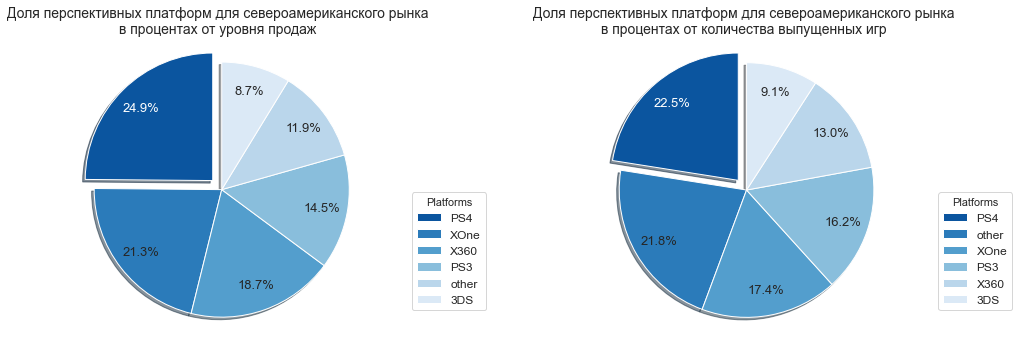

In [104]:
pie_plot(df.query(query_per), column, geo, 'pie', size)

Если рассматривать американский рынок для всех выпускаемых в настоящий момент платформ, то вполне предсказуемо на первом месте по продажам оказывается *Xbox 360*, у нее треть рынка попродажам. При этом только 20% от количества выпускаемых игр. Новейшая консоль от *Microsoft* вообще не попадает в пятерку лучших. Хотя японская *Sony* и представлена обеими консолями, суммарно (26.2%) *PlayStation 3* и *PlayStation 4* продают чуть меньше *Xbox 360* (31.3%) от суммарных продаж на североаммериканском рынке. На три самые прибыльные платформы (*Xbox 360*, *Wii* и *PlayStation 3*) приходится более 75% продаж и 60% от количества выпускаемых игр примерно в равных долях.

Но если мы все-таки ограничим год исследования границами появления новейших консолей, то ситуация меняется.
На первое место по продажам выходит *PlayStation 4* хотя они вышли в один год с *Xbox One*. Японская консоль немного опережает конкурента и по уровню продаж, и по колличеству выпущенных игр. Если смотреть на консоли от *Sony* и *Microsoft* как сумму существующих консолей для них, то у *PlayStation* 39.4% от продаж, а у *Microsoft* - 40%. Различия минимальны. При этом по количеству выпущенных игр *Sony* занимает 38.7% рынка, а *Microsoft* только 30.4%. Если мы посмотрим на таблицу выше, отсортировав данные по среднему значению продаж, то заметим, что игры для *Xbox* в среднем сильно прибыльнее конкурентов и большее количество игр приносят большие деньги (значение медианы).

Подводя итоги изучения североамериканского рынка, скажем, что в зависимости от временных рамок исследования топ-5 платформ меняется, но поскольку мы должны изучить перспективные платформы, то список самых-самых будет выглядеть так:

- PlayStation 4;
- XboxOne;
- Xbox360;
- PlayStation 3;
- Nintendo 3DS.

Если считать самыми популярными консоли с наибольшим количеством игр, то поменяется очередность, но не состав лидеров.

**Японский рынок**

In [105]:
query_mod = 'platform in @still_exist'
query_per = 'platform in @still_exist & year_of_release>2012'
column    = 'platform'
geo       = 'jp_sales'
size      = (14,5)

# Сохраним результат работы функции pie_plot в переменную table
table     = pie_plot(df.query(query_per), column, geo, 'table', size)

# Так удобнее сортировать полученные данные как нам понадобится
table.sort_values(by="jp_sales", ascending=False)

Суммарные значения продаж и среднего значения выручки для японского рынка


,total_sales,jp_sales,income_share,from_global,amount,amount_share,mean,median
platform,,,,,,,,
3DS,136.09,67.81,49.32,49.83,235,20.96,0.29,0.08
PS3,144.33,23.35,16.98,16.18,236,21.05,0.10,0.05
PSV,28.25,18.59,13.52,65.81,316,28.19,0.06,0.03
PS4,264.86,15.96,11.61,6.03,223,19.89,0.07,0.05
WiiU,53.66,10.88,7.91,20.28,57,5.08,0.19,0.09
other,112.15,0.90,0.65,33.83,54,4.82,0.03,0.02


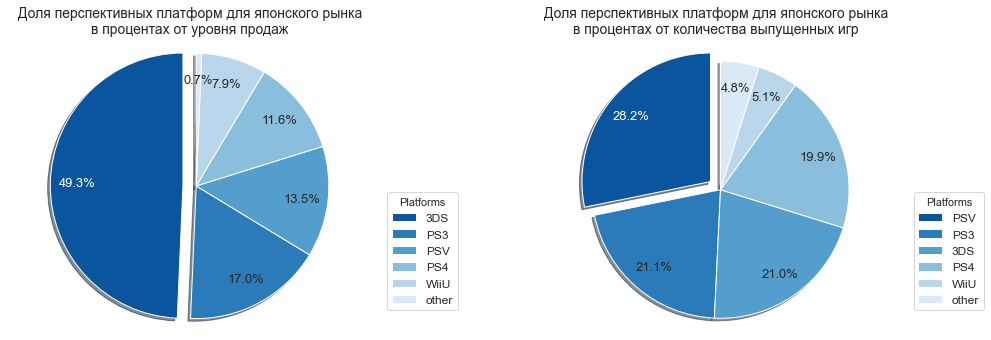

In [106]:
pie_plot(df.query(query_per), column, geo, 'pie', size)

Японский рынок неприступен для платформ *Microsoft*. Ни для выборки по современным платформам, ни по выборке по играм старше 2012 года, ни одна консоль от американсокого производителя не попадает в список лидеров.

Очень интересна доля рынка по продажам для портативной *Nintendo 3DS* если смотреть на все данные для современных платформ ограничивая 2013 годом. Половина продаж при 14% от количества выпускаемых игр. На японском рынке в число лидеров попадает и PlayStation Vita. Похоже японцы более других любят портативные консоли. Но несмотря на то, что *Sony* представлена тремя консолями (42.1%), доля продаж сумамрно уступает *Nintendo 3DS* (49.3%).

Так же заслуживает внимания соотношение количества игр для платформ не вошедших в ТОП-5 по продажам (other) и их доли в суммарных продажах. На 30% количества выпускаемых игр, менее 1% продаж.

Cписок ТОП-5 платформ для японсокго рынка:

- Nintendo 3DS;
- PlayStation 3;
- PlayStation Vita;
- PlayStation 4;
- Nintendo WiiU.

В Японии *Nintendo* обходит *Sony*. Очень неожиданно. Японцы крутые))

**Европейский рынок**

In [107]:
query_mod = 'platform in @still_exist'
query_per = 'platform in @still_exist & year_of_release>2012'
column    = 'platform'
geo       = 'eu_sales'
size      = (14,5)
# Сохраним результат работы функции pie_plot в переменную table
table     = pie_plot(df.query(query_per), column, geo, 'table', size)

# Так удобнее сортировать полученные данные как нам понадобится
table.sort_values(by="eu_sales", ascending=False)

Суммарные значения продаж и среднего значения выручки для европейского рынка


,total_sales,eu_sales,income_share,from_global,amount,amount_share,mean,median
platform,,,,,,,,
PS4,306.41,141.09,36.01,46.05,290,20.47,0.49,0.16
PS3,168.68,67.91,17.33,40.26,212,14.96,0.32,0.12
other,136.01,57.62,14.71,42.73,405,28.58,0.17,0.07
XOne,158.66,51.59,13.17,32.52,218,15.38,0.24,0.09
X360,134.67,42.60,10.87,31.63,170,12.00,0.25,0.11
3DS,110.06,30.96,7.90,28.13,122,8.61,0.25,0.08


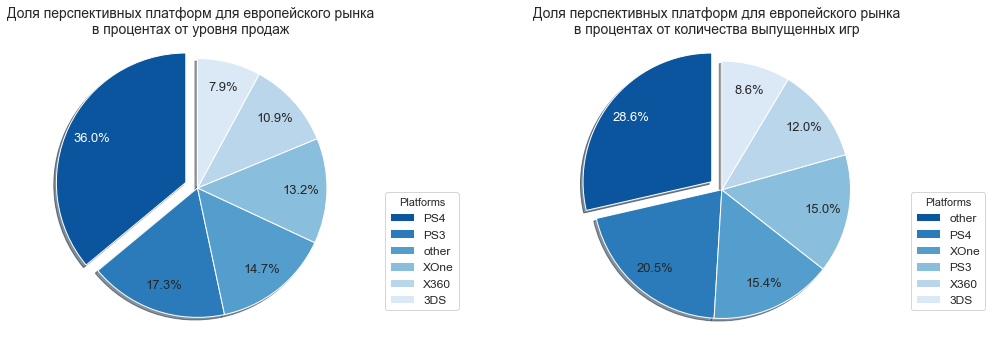

In [108]:
pie_plot(df.query(query_per), column, geo, 'pie', size)

Рынок Европы более благоприятствует японским консолям от *Sony*. Тут доля продаж *PlayStation 3* и *PlayStation 4* выше чем в Японии и Америке. Количество игр и средние продажи по играм так же на стороне японцов.

Более половины продаж приходится на консоли *PlayStation 3* и *PlayStation 4*. У *XBox* в половину меньше. Но в целом список самых успешных состоит их тех же консолей, что и для американского рынка.

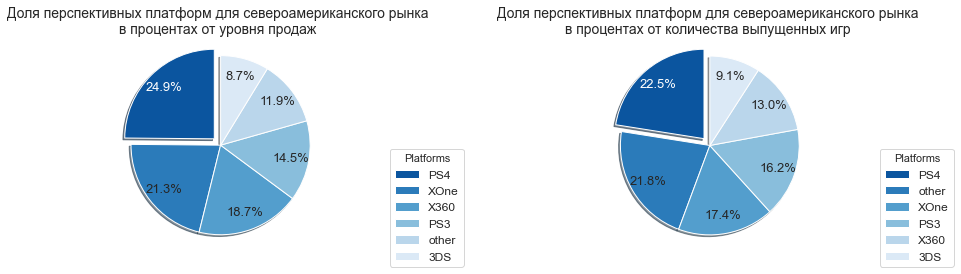

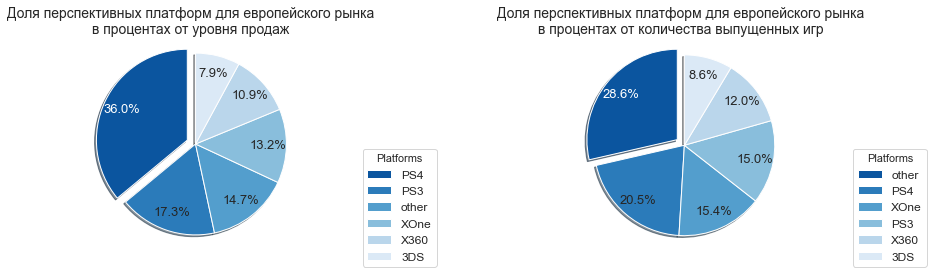

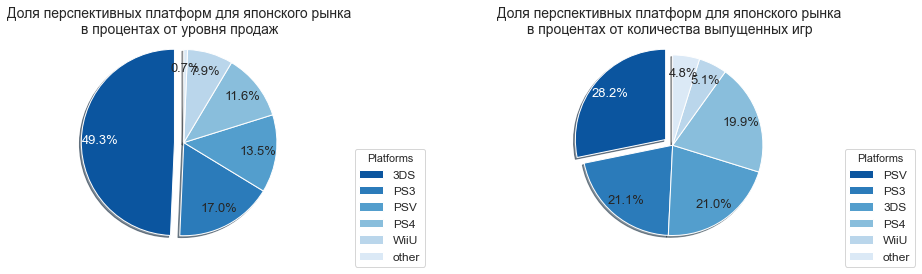

In [109]:
markets = ['na_sales', 'eu_sales', 'jp_sales']
for market in markets:
    pie_plot(df.query(query_per), column, market, 'pie', (13, 4))

Сравнивая платформы по всему миру, можно сказать, что *Sony* популярнее и прибыльнее основного конкурента - *Microsoft*. Это справедливоо как для консолей предыдущего поколения, так и для новейших. А если брать японские продажи, то тут *Microsoft* совсем не у дел.

Интересно, что для японской *Sony* доля продаж на японском рынке от продаж по всему миру составляет лишь 16.18% для *PlayStation 3* и 6.03% для *PlayStation 4*. Тогда как в Европе эти показатели составляют 40.26% и 46.05% для *PlayStation 3* и *PlayStation 4* соответственно.

Для консолей от *Xbox* родной американский рынок генерирует 2/3 продаж. Еще 1/3 на европейском рынке.

Чемпион Японии *Nintendo3DS* половину продаж делает на родине и чуть более чем по 20% в Европе и Америке.

**Самые популярные жанры для регионов (NA, EU, JP). Описание различия в долях продаж**

Тут не станем изобретать ничего нового и воспользуемся той же функцией, что и при выборе самых популярных платформ.

[Action, RPG, Shooter, Sports](#top_genres_1) - так выглядил список самых прибыльных жанров для перспективных платформ (кроме *PC*) без разбивки по географическому признаку. Отличалась последовательность. Сейчас посмотрим меняется ли ситуация в зависимости от рынка.

<a id='top_genres_2'></a>
**Североамериканский рынок**

In [110]:
query_mod = 'platform in @still_exist'
query_per = 'platform in @still_exist & year_of_release>2012'
column    = 'genre'
geo       = 'na_sales'
size      = (14,5)

# Сохраним результат работы функции pie_plot в переменную table
table     = pie_plot(df.query(query_per), column, geo, 'table', size)

# Так удобнее сортировать полученные данные как нам понадобится
table.sort_values(by="na_sales", ascending=False)

Суммарные значения продаж и среднего значения выручки для североамериканского рынка


,total_sales,na_sales,income_share,from_global,amount,amount_share,mean,median
genre,,,,,,,,
Action,295.66,125.85,28.77,42.57,442,33.84,0.28,0.10
Shooter,231.92,109.76,25.09,47.33,171,13.09,0.64,0.22
Sports,144.17,65.27,14.92,45.27,143,10.95,0.46,0.27
other,160.49,62.40,14.27,38.73,307,23.51,0.20,0.08
Role-Playing,125.93,46.69,10.67,37.08,160,12.25,0.29,0.10
Misc,57.70,27.46,6.28,47.59,83,6.36,0.33,0.13


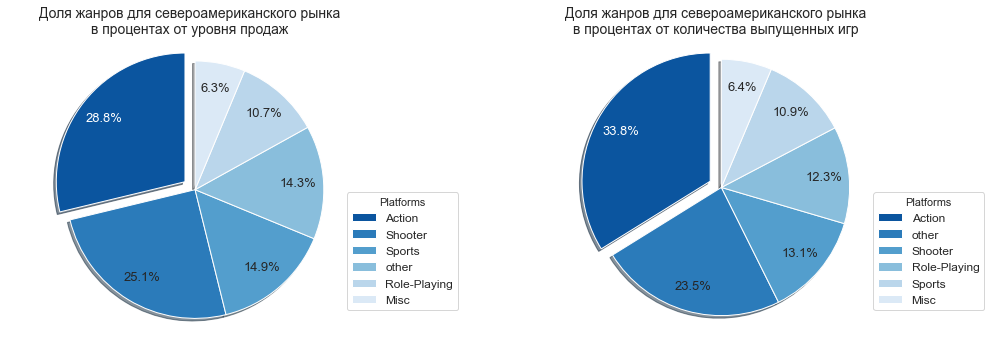

In [111]:
pie_plot(df.query(query_per), column, geo, 'pie', size)

Прибыльность жанров для североамериканского рынка в целом совпадает с глобальными продажами. *Shooter* и *Action* отличаются совсем немного по выручке, а вот доля в количестве выпущенных игр для *Shooter* менее 10%. В этом жанре игры гораздо чаще становятся бестселлерами - средний уровень продлаж для игр - более 600 тысяч. Тогда как у *Action* - менее 300 тысяч. Что совпадает с выводами после рассмотрения [ящика с усами](#top_genres_box) по продажам для жанров без разбивки на страны.

ТОП-5 жанров для американского рынка выглядит так:

- *Action*;
- *Shooter*;
- *Sports*;
- *RPG*;
- *Misc*.

<a id='top_genres_3'></a>
**Японский рынок**

In [112]:
query_mod = 'platform in @still_exist'
query_per = 'platform in @still_exist & year_of_release>2012'
column    = 'genre'
geo       = 'jp_sales'
size      = (14,5)

# Сохраним результат работы функции pie_plot в переменную table
table     = pie_plot(df.query(query_per), column, geo, 'table', size)

# Так удобнее сортировать полученные данные как нам понадобится
table.sort_values(by="jp_sales", ascending=False)

Суммарные значения продаж и среднего значения выручки для японского рынка


,total_sales,jp_sales,income_share,from_global,amount,amount_share,mean,median
genre,,,,,,,,
Role-Playing,126.23,50.01,36.37,39.62,229,20.43,0.22,0.07
Action,224.12,39.65,28.84,17.69,388,34.61,0.10,0.04
other,158.70,24.56,17.86,31.13,295,26.32,0.11,0.05
Misc,32.66,9.03,6.57,27.65,82,7.31,0.11,0.07
Fighting,26.34,7.63,5.55,28.97,58,5.17,0.13,0.06
Shooter,171.29,6.61,4.81,3.86,69,6.16,0.10,0.04


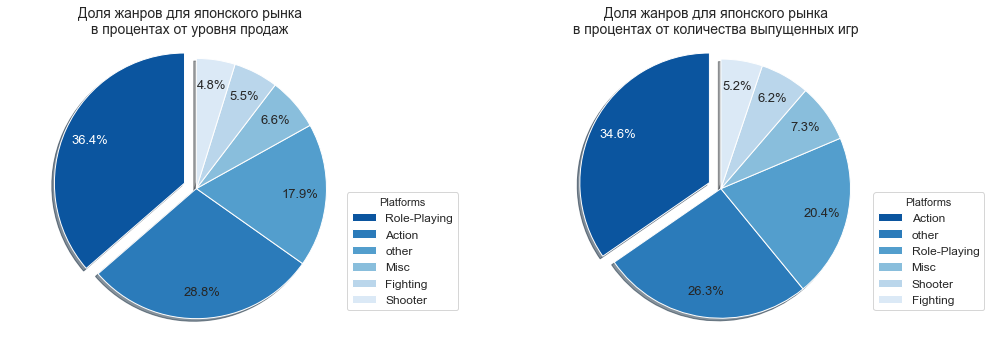

In [113]:
pie_plot(df.query(query_per), column, geo, 'pie', size)

Как мы увидели [тут](#top_genres_1) доля *RPG* игр сильно отличается в большую сторону для консоли *PlayStation Vita*, а для нее в свою очередь 56% рынка продаж приходится на Японию. Так что ничего удивительного, что более трети продаж приходится в Японии на жанр *RPG*. А в целом для жанра *RPG* Япония приносит 40% от глобальных продаж.

Вообще японский рынок очень своеобразный не только для консолей, но и для жанров. *Shooter* тут звнимает пятое место с менее 5% продаж. В прочем *Action* все еще на втором с третью от рынка.

**Европейский рынок**

In [114]:
query_mod = 'platform in @still_exist'
query_per = 'platform in @still_exist & year_of_release>2012'
column    = 'genre'
geo       = 'eu_sales'
size      = (14,5)

# Сохраним результат работы функции pie_plot в переменную table
table     = pie_plot(df.query(query_per), column, geo, 'table', size)

# Так удобнее сортировать полученные данные как нам понадобится
table.sort_values(by="eu_sales", ascending=False)

Суммарные значения продаж и среднего значения выручки для европейского рынка


,total_sales,eu_sales,income_share,from_global,amount,amount_share,mean,median
genre,,,,,,,,
Action,297.22,118.10,30.15,39.73,493,34.79,0.24,0.08
Shooter,232.43,87.86,22.43,37.80,171,12.07,0.51,0.23
other,182.10,68.11,17.39,40.78,351,24.77,0.19,0.07
Sports,142.18,60.34,15.40,42.44,167,11.79,0.36,0.09
Role-Playing,121.17,37.17,9.49,30.68,157,11.08,0.24,0.07
Racing,39.39,20.19,5.15,51.26,78,5.50,0.26,0.09


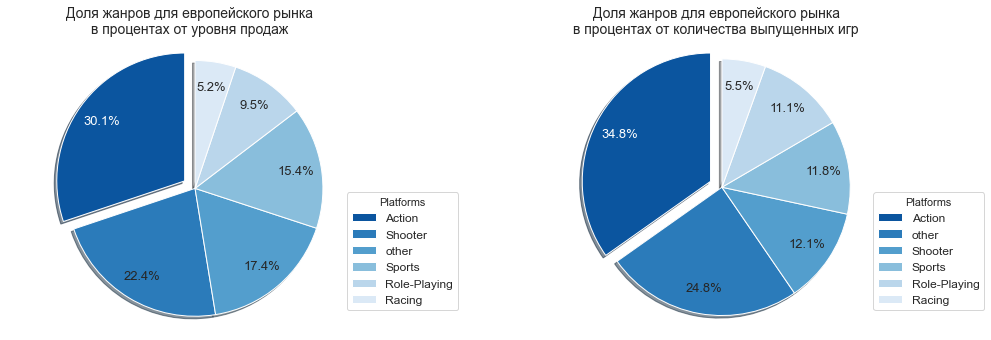

In [115]:
pie_plot(df.query(query_per), column, geo, 'pie', size)

Как и в случае с распределением долей по платформам, распределение по жанрам очень напоминает североамериканский рынок. Первые три места до пары процентов совпадают. Разве что последний жанр, попавший в ТОП-5 поменялся с *Misc* на *Racing*. Но в обоих случаях это около 5%. Доли рынка по количеству выпущенных игр так же очень похожи на показатели по американскому рынку.

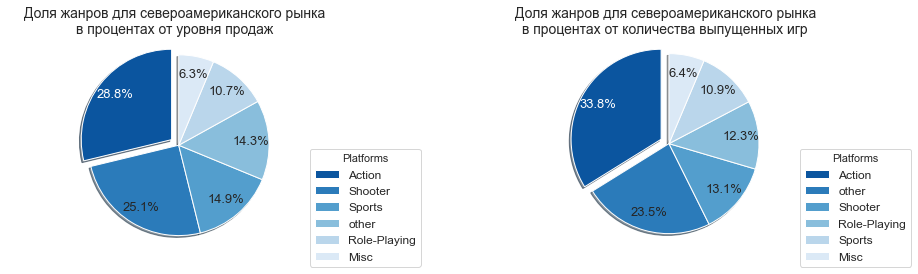

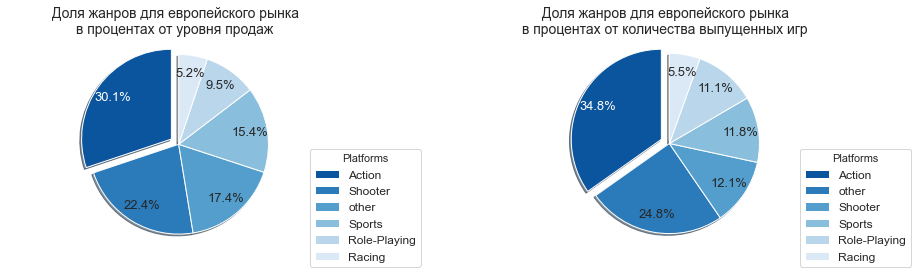

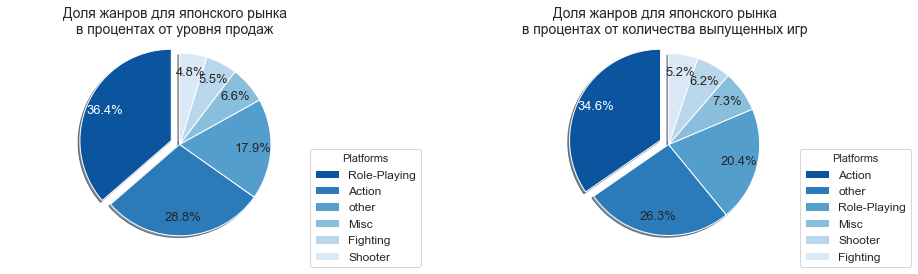

In [116]:
markets = ['na_sales', 'eu_sales', 'jp_sales']
for market in markets:
    pie_plot(df.query(query_per), column, market, 'pie', (13,4))

Сравнивая жанры по всему миру, можно сказать, что Япония как всегда в стороне от всего мира. Предпочтения же по жанрам в Европе и Америке еще более схожи чем предпочтения по плотформамам.

- *Action*;
- *Shooter*;
- *Sports*.

Вот три самых популярных и прибыльных жанра для Европы и Америки. На них выпадает до 70% от глобальных продаж по жанрам.
Если принять во внимание влияние японского рынка, то мировым лидером среди жанров станет *Action*.

<a id='top_genres_esrb'></a>
**Влияние рейтинга ESRB на продажи в отдельном регионе**

Мы уже оценивали влияние рейтинга на продажи вот [тут](#top_genres_esrb_global)

И тогда уровень корреляции рейтига ESRB и уровня продаж был около нуля. Предположу, что и при рассмотрении корреляции рейтинга и продаж с учетом страны ситуация будет такой же. Правда может отличиться Япония. По крайней мере ТОП-5 платформ и жанров по уровню продаж там сильно отличается от Америки и Европы.

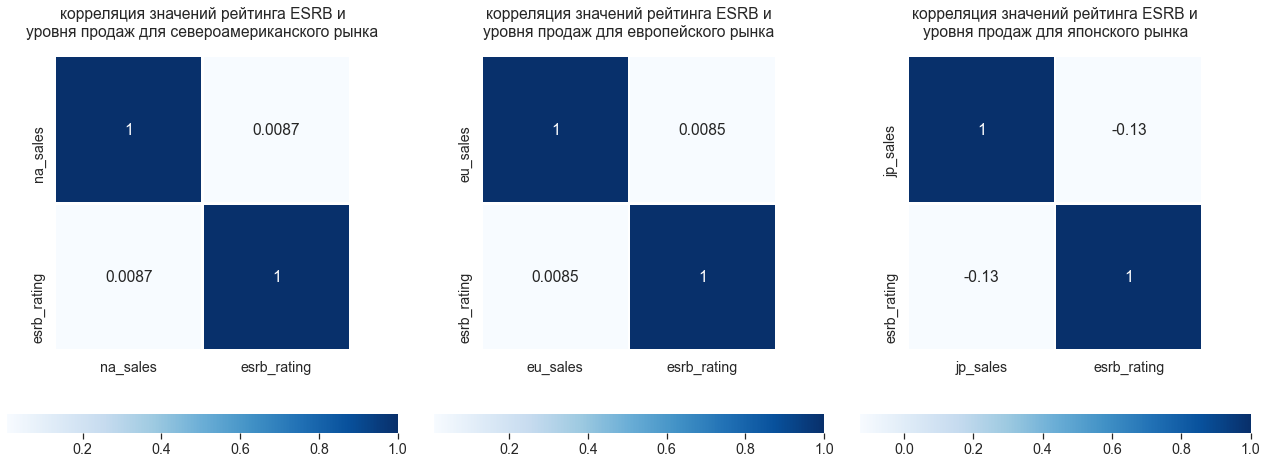

In [117]:
sns.set(font_scale=1.3)
fg = plt.figure(figsize=(18, 7))
gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fg)

markets       = ['na_sales','eu_sales','jp_sales']
x_coordinates = [0,1,2,0,1,2]
y_coordinates = [0,0,0,1,1,1]

for i in range(len(markets)):
    fig_ax    = fg.add_subplot(gs[y_coordinates[i], x_coordinates[i]])

    sns.heatmap(df[df[markets[i]]!=0][[markets[i], 'rating_num']].corr(),
                annot=True, cmap='Blues', linewidths=1.5, square=True,
                cbar = True, cbar_kws={'ticks':np.arange(0,1.2,0.2), "orientation": "horizontal"},
                xticklabels=[markets[i], 'esrb_rating'],
                yticklabels=[markets[i], 'esrb_rating'])

    plt.title("корреляция значений рейтинга ESRB и\nуровня продаж для "+ locality_dict[markets[i]],pad=20)

plt.tight_layout()

Как и в случае с глобальными продажами, на отдельно взятых рынках рейтинг ESRB никак не влияет на успешность игры. Япония конечно немного отличилась, и тут уровень корреляции исчисляется уже не в сотых, за то он отрицательный. Получается, чем выше рейтинг ESRB (а мы помним, что значение столбца rating_num установлен в соответствии с возрастом, с которого рекомендована игра), тем ниже уровень продаж. Хотя все равно -0.13 это очень слабый уровень корреляции.

<a id='resume_4'></a>
### Шаг 4. Выводы

**Самые популярные платформы для регионов (NA - Северная Америка, EU - Европа, JP - Япония). Описание различия в долях продаж**

Для определения популярности платформ мы произвели расчет и сопоставли суммарные продажи для платформ на конкретных рынках. Поскольку цель нашего исследования - сделать прогноз и спланировать рекламный бюджет мы не оценивали платформы уже снятые с производства. Кроме того, посокльку сравнение суммарных продаж для консолей, выпускаемых 10 лет и консолей, выпущенных 3 года назад некорректно, для сравнения популярности переспективных платформ данные были ограничены 2013 годом (год выхода новейших консолей PlayStation 4 и XBox One), а для существующих платформ списком консолей, присутствующих на рынке на данный момент.

**Североамериканский рынок**

Если рассматривать американский рынок для всех выпускаемых в настоящий момент платформ, то вполне предсказуемо на первом месте по продажам оказывается *Xbox 360*, у нее треть рынка попродажам. При этом только 20% от количества выпускаемых игр. Новейшая консоль от *Microsoft* вообще не попадает в пятерку лучших. Хотя японская *Sony* и представлена обеими консолями, суммарно (26.2%) *PlayStation 3* и *PlayStation 4* продают чуть меньше *Xbox 360* (31.3%) от суммарных продаж на североаммериканском рынке. На три самые прибыльные платформы (*Xbox 360*, *Wii* и *PlayStation 3*) приходится более 75% продаж и 60% от количества выпускаемых игр примерно в равных долях.

Но если мы все-таки ограничим год исследования границами появления новейших консолей, то ситуация меняется.
На первое место по продажам выходит *PlayStation 4* хотя они вышли в один год с *Xbox One*. Японская консоль немного опережает конкурента и по уровню продаж, и по колличеству выпущенных игр. Если смотреть на консоли от *Sony* и *Microsoft* как сумму существующих консолей для них, то у *PlayStation* 39.4% от продаж, а у *Microsoft* - 40%. Различия минимальны. При этом по количеству выпущенных игр *Sony* занимает 38.7% рынка, а *Microsoft* только 30.4%. Заметим, что игры для *Xbox* в среднем сильно прибыльнее конкурентов и большее количество игр приносят большие деньги (значение медианы).

Подводя итоги изучения североамериканского рынка, скажем, что в зависимости от временных рамок исследования топ-5 платформ меняется, но поскольку мы должны изучить перспективные платформы, то список самых-самых будет выглядеть так:

- PlayStation 4;
- XboxOne;
- Xbox360;
- PlayStation 3;
- Nintendo 3DS.

Если считать самыми популярными консоли с наибольшим количеством игр, то поменяется очередность, но не состав лидеров.

**Японский рынок**

Японский рынок неприступен для платформ *Microsoft*. Ни для выборки по современным платформам, ни по выборке по играм старше 2012 года, ни одна консоль от американсокого производителя не попадает в список лидеров.

Очень интересна доля рынка по продажам для портативной *Nintendo 3DS* если смотреть на все данные для современных платформ ограничивая 2013 годом. Половина продаж при 14% от количества выпускаемых игр. На японском рынке в число лидеров попадает и PlayStation Vita. Похоже японцы более других любят портативные консоли. Но несмотря на то, что *Sony* представлена тремя консолями (42.1%), доля продаж сумамрно уступает *Nintendo 3DS* (49.3%).

Так же заслуживает внимания соотношение количества игр для платформ не вошедших в ТОП-5 по продажам (other) и их доли в суммарных продажах. На 30% количества выпускаемых игр, менее 1% продаж.

Cписок ТОП-5 платформ для японсокго рынка:

- Nintendo 3DS;
- PlayStation 3;
- PlayStation Vita;
- PlayStation 4;
- Nintendo WiiU.

В Японии *Nintendo* обходит *Sony*.

**Европейский рынок**

Рынок Европы более благоприятствует японским консолям от *Sony*. Тут доля продаж *PlayStation 3* и *PlayStation 4* выше чем в Японии и Америке. Количество игр и средние продажи по играм так же на стороне японцов.

Более половины продаж приходится на консоли *PlayStation 3* и *PlayStation 4*. У *XBox* в половину меньше. Но в целом список самых успешных состоит их тех же консолей, что и для американского рынка.

Сравнивая платформы по всему миру, можно сказать, что *Sony* популярнее и прибыльнее основного конкурента - *Microsoft*. Это справедливоо как для консолей предыдущего поколения, так и для новейших. А если брать японские продажи, то тут *Microsoft* совсем не у дел.

Интересно, что для японской *Sony* доля продаж на японском рынке от продаж по всему миру составляет лишь 16.18% для *PlayStation 3* и 6.03% для *PlayStation 4*. Тогда как в Европе эти показатели составляют 40.26% и 46.05% для *PlayStation 3* и *PlayStation 4* соответственно.

Для консолей от *Xbox* родной американский рынок генерирует 2/3 продаж. Еще 1/3 на европейском рынке.

Чемпион Японии *Nintendo3DS* половину продаж делает на родине и чуть более чем по 20% в Европе и Америке.

**Самые популярные жанры для регионов (NA, EU, JP). Описание различия в долях продаж**

*Action*, *RPG*, *Shooter*, *Sports* - так выглядил список самых прибыльных жанров для перспективных платформ (кроме *PC*) без разбивки по географическому признаку. Отличалась последовательность.

**Североамериканский рынок**

Прибыльность жанров для североамериканского рынка в целом совпадает с глобальными продажами. *Shooter* и *Action* отличаются совсем немного по выручке, а вот доля в количестве выпущенных игр для *Shooter* менее 10%. В этом жанре игры гораздо чаще становятся бестселлерами - средний уровень продлаж для игр - более 600 тысяч. Тогда как у *Action* - менее 300 тысяч. Что совпадает с выводами после рассмотрения ящика с усами по продажам для жанров без разбивки на страны в шаге 3.

ТОП-5 жанров для американского рынка выглядит так:

- *Action*;
- *Shooter*;
- *Sports*;
- *RPG*;
- *Misc*.

**Японский рынок**

Как мы помним при построении графика уровня продаж в зависимости от жанра, доля *RPG* игр сильно отличается в большую сторону для консоли *PlayStation Vita*, а для нее в свою очередь 56% рынка продаж приходится на Японию. Так что ничего удивительного, что более трети продаж приходится в Японии на жанр *RPG*. А в целом для жанра *RPG* Япония приносит 40% от глобальных продаж.

Вообще японский рынок очень своеобразный не только для консолей, но и для жанров. *Shooter* тут звнимает пятое место с менее 5% продаж. В прочем *Action* все еще на втором с третью от рынка.

**Европейский рынок**

Как и в случае с распределением долей по платформам, распределение по жанрам очень напоминает североамериканский рынок. Первые три места до пары процентов совпадают. Разве что последний жанр, попавший в ТОП-5 поменялся с *Misc* на *Racing*. Но в обоих случаях это около 5%. Доли рынка по количеству выпущенных игр так же очень похожи на показатели по американскому рынку.

Сравнивая жанры по всему миру, можно сказать, что Япония как всегда в стороне от всего мира. Предпочтения же по жанрам в Европе и Америке еще более схожи чем предпочтения по плотформамам.

- *Action*;
- *Shooter*;
- *Sports*.

Вот три самых популярных и прибыльных жанра для Европы и Америки. На них выпадает до 70% от глобальных продаж по жанрам.
Если принять во внимание влияние японского рынка, то мировым лидером среди жанров станет *Action*.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

Мы уже оценивали влияние рейтинга на продажи в шаге 3, но тогда мы оценивали корреляцию с глобальными продажами.
Уровень корреляции рейтига ESRB и уровня продаж был около нуля. Мы предположили, что и при рассмотрении корреляции рейтинга и продаж с учетом страны ситуация будет такой же, допустив, что ситуация может отличиться Японии, поскольку ТОП-5 платформ и жанров по уровню продаж там сильно отличается от Америки и Европы.

Наше предположение подтвердилось, как и в случае с глобальными продажами, на отдельно взятых рынках рейтинг ESRB никак не влияет на успешность игры. Япония конечно немного отличилась, и тут уровень корреляции исчисляется уже не в сотых, за то он отрицательный. Получается, чем выше рейтинг ESRB (а мы помним, что значение столбца rating_num установлен в соответствии с возрастом, с которого рекомендована игра), тем ниже уровень продаж. Хотя все равно -0.13 это очень слабый уровень корреляции.

<a id='step_5'></a>
[*предыдущий шаг*](#step_4)

### Шаг 5. Проверка гипотез

В этом шаге будут сформулированы и проверены две гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

[*выводы Шаг 5*](#resume_5)

[*общий вывод*](#step_6)

Удалим из нашего DataFrame значения оценок пользователей *tbd*, поскольку они остались только для игр 2016 года и мы решили не приравнивать их нулю.

In [118]:
df = df.query('user_score!="tbd"')
df.user_score = df.user_score.astype('float32')

**Проверка гиппотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC**

Для построения гистограмм и проверки гипотез вызывается функция *check_hypothesis(to_check, to_do, no_zeros)*.

Первый параметр отвечает за выбор столбца. В нашем исследовании предаются два значения *platform* или *genre*, сравнивающие соответственно данные по отзывам для разных платформ и данные по отзывам для разных жанров.

Параметр *to_do* отвечает за результат работы функции. *Mmvs* означает, что нас интересует расчет Median, Mean, Var и Std, то есть медианы, среднего, дисперсии и стандартного отклонения. Другой вариант параметра - *hyp* (hypothesis) проверит одну из гипотез.

Третий параметр - *no_zeros* имеет тип bool. Если передать True, то из таблицы будут удалены строки с нулевыми оценками пользоватлей. Так же в зависимости от параметра *no_zeros* будет установлено значение ddof в  методе var():

0 - если мы не удаляем строки с нулевыми отзывами и расчет дисперсии производится для всей савокупности;
1 - если строки с нулевыми оценками удалены и расчет дисперсии производится по выборке.

Последний параметр alpha задает критический уровень статистической значимости.

До формулирования нулевой и альтернативной гипотез, построим гистограмму распределения средних пользовательских рейтингов платформ *Xbox One* и *PC*.

Сформулируем нулевую гиппотезу так: "Средние пользовательские рейтинги платформ *Xbox One* и *PC* **не** различаются"

Исходя из нее вызовем функцию `check_hypothesis` с параметром *no_zeros* = True. Поскольку оценка - 0, это не ноль баллов а отсутствие оценки, то при расчете средней оценки предлагаю не учитывать строки без оценки пользователей.

|Дисперсия и стандарнтное отклонение для платформ "XOne" и "PC"                   |XOne                 |PC                   |
------------------------------------------------------------------------------------------------------------------------------
|среднее значение                                                                 |6.59                 |7.06                 |
------------------------------------------------------------------------------------------------------------------------------
|медиана                                                                          |6.8                  |7.5                  |
------------------------------------------------------------------------------------------------------------------------------
|дисперсия                                                                        |1.89                 |2.3                  |
-----------------------------------------------------------------------------------------------------------

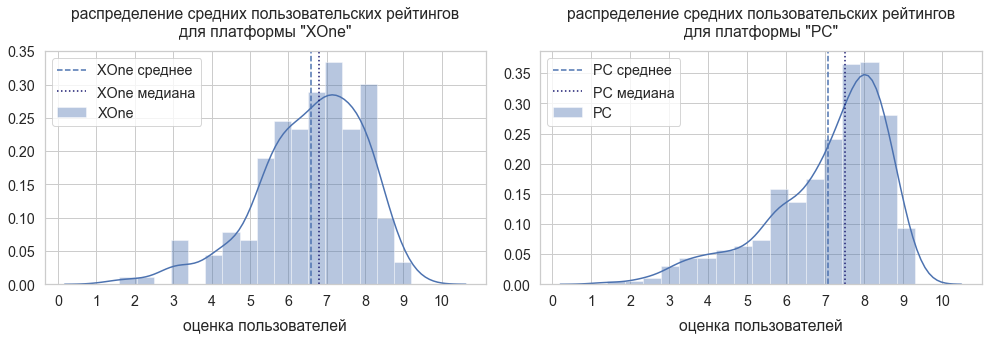

In [119]:
check_hypothesis ('platform', 'mmvs', True, .05)

Cредние пользовательские рейтинги для сравниваемых платформ очень близки, но все же для *PC* они немного выше. Так же выже и медиана, то есть для *PC* в целом количество высоких оценок больше.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей, применим метод scipy.stats.ttest_ind в котором параметр *equal_var* зададим со значением False, поскольку дисперсии выборок не равны. Это видно по цифрам выше.

Для проверки гипотезы уровень статистической значимости *alpha* установим 0.05

Понижая уровень значимости до 0.01, мы рискуем не опровергнуть ложную нулевую гипотезу.

Поскольку датасеты со значениями средних пользовательских рейтингов содержат разное количество значений (968 для *PC* и 239 для *XOne*), выберем случайным образом по 150 значений из каждого датасета, а чтобы убедиться в результате, повторим проверку 10 раз.

**Нулевая и альтернативная гипотезы**

Нулевая гипотеза - "Средние пользовательские рейтинги платформ Xbox One и PC **не** различаются".

Альтернативная гипотеза - "Средние пользовательские рейтинги платформ Xbox One и PC различаются"

In [120]:
check_hypothesis ('platform', 'hyp', True, .05)

                         H₀ - Средние пользовательские рейтинги платформ Xbox One и PC не различаются                         
------------------------------------------------------------------------------------------------------------------------------
|p-значение                                    |№ эксперимента                         |Результат                             |
------------------------------------------------------------------------------------------------------------------------------
|0.09839389847093032                           |эксперимент 1                          |H₀ принята                            |
------------------------------------------------------------------------------------------------------------------------------
|0.05115140877318821                           |эксперимент 2                          |H₀ принята                            |
------------------------------------------------------------------------------------------------------------

Для выброного уровня значимости (0.05) нулевая гипотеза отвергнута. Понизив уровень значимости до 0,01 из 10 экспериментов до половины имеют p - значение ниже 0.01 но возрастает риск не опровергнуть ложную нулевую гипотезу.

**Гипотеза H₀** - Средние пользовательские рейтинги платформ Xbox One и PC не различаются - **отвергнута**. Средние пользовательские оценки для платформ *Xbox One* и *PC* различны.

**Проверка гиппотезы о равенстве средних пользовательских рейтингов жанров Action и Sports**

До формулирования нулевой и альтернативной гипотез, построим гистограмму распределения средних пользовательских рейтингов жанров *Action* и *Sports*.

|Дисперсия и стандарнтное отклонение для жанров "Action" и "Sports"               |Action               |Sports               |
------------------------------------------------------------------------------------------------------------------------------
|среднее значение                                                                 |6.82                 |6.37                 |
------------------------------------------------------------------------------------------------------------------------------
|медиана                                                                          |7.3                  |6.9                  |
------------------------------------------------------------------------------------------------------------------------------
|дисперсия                                                                        |3.08                 |4.05                 |
-----------------------------------------------------------------------------------------------------------

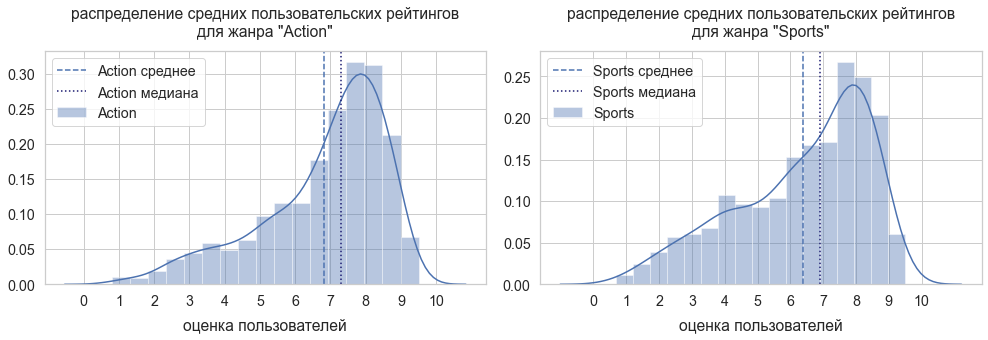

In [121]:
check_hypothesis ('genre', 'mmvs', True, .05)

Cредние пользовательские рейтинги для сравниваемых платформ очень близки, но все же для *Action* они немного выше. Так же выже и медиана, то есть для *Action* в целом количество высоких оценок больше.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей, применим метод scipy.stats.ttest_ind в котором параметр *equal_var* зададим со значением False, поскольку дисперсии выборок не равны. Это видно по цифрам выше.

Для проверки гипотезы уровень статистической значимости *alpha* установим 0.05

Поскольку датасеты со значениями средних пользовательских рейтингов содержат разное количество значений (3330 для *Action* и 2319 для *Sports*), выберем случайным образом по 1500 значений из каждого датасета, а чтобы убедиться в результате, повторим проверку 10 раз.

**Нулевая и альтернативная гипотезы**

Нулевая гипотеза - "Средние пользовательские рейтинги жанров *Action* и *Sports* **не** различаются".

Альтернативная гипотеза - "Средние пользовательские рейтинги жанров *Action* и *Sports* различаются".

In [122]:
check_hypothesis ('genre', 'hyp', True, .05)

                         H₀ - Средние пользовательские рейтинги жанров Action и Sports не различаются                         
------------------------------------------------------------------------------------------------------------------------------
|p-значение                                      |№ эксперимента                        |Результат                            |
------------------------------------------------------------------------------------------------------------------------------
|1.1977432459096167e-12                          |эксперимент 1                         |H₀ отвергнута                        |
------------------------------------------------------------------------------------------------------------------------------
|8.650239234602689e-10                           |эксперимент 2                         |H₀ отвергнута                        |
------------------------------------------------------------------------------------------------------------

**Гипотеза H₀** - Средние пользовательские рейтинги жанров *Action* и *Sports* не различаются - **отвергнута**. 

В 10 случаях из 10 не зависимо от уровня статистической значимости (0.05 или 0.01), по всей савокупности или по выборке только не нулевых значений отзывов, средние рейтинги для этих двух жанров отличаются.

<a id='resume_5'></a>
### Шаг 5. Выводы

Мы проверили 2 гипотезы:

- о равенстве средних пользовательских рейтингов платформ *Xbox One* и *PC*;
- о равенстве средних пользовательских рейтингов жанров *Action* и *Sports*.

Так же в ходе проверки были посчитаны медиана, средние значние, дисперсия и стандартное отклонение для средних пользовательских оценок для разлицных платформ и жанров.

**Равенство средних пользовательских рейтингов платформ Xbox One и PC**

Распределение отзывов для платформы *Xbox One* более семетрично распределено вокруг среднего значения, при этом само среднее немного ниже чем для платформы *PC*. Для *PC* же свойственен сдвиг в положительную сторону, для этой платформы больше отзывоввыше 7.5 баллов.

Поскольку датасеты со значениями средних пользовательских рейтингов содержат разное количество значений (968 для PC и 239 для XOne), для проверки гипотезы были выбраны случайным образом по 150 значений из каждого датасета, а чтобы убедиться в результате, эксперимент проведен 10 раз.

В большинстве из 10 экспериментов расхождение в среднем значении подтвердилось.

Нулевая гипотеза - "Средние пользовательские рейтинги платформ *Xbox One* и *PC* **не** различаются" отвергнута.

**Равенство средних пользовательских рейтингов жанров Action и Sports**

Распределения отзывов для жанров *Action и Sports* очень похоже. Оба жанра имеют нормальное распределение и положительно смещены относительно среднего значения. В обоих случаях самыми популярными оценками являются оценки от 7.5 до 8.5 баллов, но для *Action* этих оценок больше, а оценок менее 4 былов меньше. От того и разница в среднем значении.

Поскольку датасеты со значениями средних пользовательских рейтингов содержат разное количество значений (3330 для Action и 2319 для Sports), для проверки гипотезы были выбраны случайным образом по  1500 значений из каждого датасета, а чтобы убедиться в результате, эксперимент проведен 10 раз.

В 10 случаях из 10 не зависимо от уровня статистической значимости (0.05 или 0.01), по всей савокупности или по выборке только не нулевых значений отзывов, средние рейтинги для этих двух жанров отличаются.

Нулевая гипотеза - "Средние пользовательские рейтинги жанров *Action* и *Sports* **не** различаются" отвергнута.

<a id='step_6'></a>

### Шаг 6. Общий вывод

В нашем распоряжении были данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Цель проекта - выявление определяющих успешность игры закономерностей.

Исследование разделено на 5 шагов. В кадом шаге ставились задачи и подводился промежуточный итог. 

**[*Шаг 1*](#step_1) - Изучение общей информации**

Проведена оценка:
- соответствия типов данных;
- наличия пропущенных значений в таблицах;
- наличия дубликатов;
- наличия "подозрительных" значений.

Описание количества пропусков и типов данных подробно описано в [*выводах шага 1*](#resume_1). После изучения общей информации среди лидеров по количеству игр несмотря на разнообразие платформ, по факту это 4 - Sony, 2 - Nintendo и 1 - Xbox. Так же мы сразу можем обратить внимание, на сколько Северо-американский рынок больше остальных.

**[*Шаг 2*](#step_2) - Подготовка данных**

Выполнены следующие действия:

- Замена названий столбцов (приведение к нижнему регистру);
- Обработка дубликатов;
- Обработка пропусков:
    - объяснение выбранного метода заполнения или причины не заполнения пропусков;
    - описание возможных причин, которые могли привести к пропускам;
    - разбор и описание и обработка аббревиатуры 'tbd';
- Преобразование данных в нужным типам с описанием причины замены;
- Подсчет суммарных продаж во всех регионах.

Подробное описание выполнения поставленных шагом задач можно прочемть в [*выводах к шагу 2*](#resume_2). 

**Обработка дубликатов**

Поскольку были выявлены игры, для которых созданы строки в зависимости от страны релиза. Таким образом для одной и той же игры существовало до трех строк. Поиск дубликатов в таком случае не давал результата, поскольку название игры отличалось. Названия были приведены к единому виду. Найденные дубликаты данных можно разделить на:

- Полные совпадения, для которых совпадают все значения кроме сборов;
- Игры, для которых совпадали название и платформа, но были проставленны свои рейтинги и оценки;
- Игры для которых совпадали название, но были разные даты релиза.
  
Первичный анализ данных показал, что найдено 10 дублирующихся строк. Критерием признания было совпадение названия игры и платформы для нее. После удаления лишних пробелов в названиях и скобок, число дубликатов увеличилось в 26 раз.
Мы воспользовались методом groupby, чтобы сгруппировать дублирующиеся строки и суммировать значения продаж. После чего дубликаты были удалена, а значения оставшихся строк замененны на полученные в результате группировки и суммирования.

Для дублирующихся строк мы заполнили пропущенные данные по дате выхода игры, в случаях, когда одна и та же игра имела не одну дату релиза, мы установили самую позднюю, в случаях, когда для однои той же игры были указаны разные жанры, мы устанавливали либо тот, для которого были отзывы и рейтинг, либо тот, для которого больше сборы.

Чтобы при группировке и суммировании данные в столбце *critic_score* не удвоились, для столбцов *year_of_release* и *critic_score* при группировке были взяты средние значения. В таком случае, если строка полностью дублирована, то данные не удваивались и рейтинг 80 не превращался в рейтинг 160, а год из 2006 не становился 4012, а в случае если речь идет о релизах и для одного рейтинг выше, а для другого ниже мы получали среднее значение для оценки, а года у нас уже приведены к единому значению (для релизов взят самый поздний).

Для того, чтобы не потерять данные в столбцах *user_score* и *rating* они не числовые и при группировке и суммировании они в таблицу не попадали. Данные были сохранены в переменной score_and_rating_dict в виде словаря. Ключ - название игры, а значения - связка platform - user_score - rating.

После обработки дубликатов количество строк в DataFrame сократиось на 134 строки и составило 16579 строк.

**Обработка пропусков**

Изначально пропуски в данных содержались в столбцах:

- year_of_release (269 пропусков)
    
Какой-то связи пропущенных данных в столбце year_of_release с другими пропусками не наблюдается. Пропуски данных по дате релиза игры присутсвовали для все жанров и половины игровых платформ, включая современные. Удаление строк только на основании отсутствующей даты релиза, было признано нецелесообразным.
Для 97 игр, для которых данные по году были указаны хотя бы для одной из платформ, пропуски были заполнены этими данными.

Для заполнения оставшихся пропусков использованы библиоти *requests* и *BeautifulSoup*. С их помощью мы искали необходимые данные на сайте https://en.wikipedia.org. Мы искали игру и все релизы для нее на всех платформах. Результат сохранялся в DataFrame, а потом с помощью регулярных выражений мы находили нужное значение.

После заполнения, оставшиеся пропуски для каждой платформы составили менее одного процента и строки, для которых помимо пропуска года релиза, были пропущены данные с оценками и рейтингами, были удалены. Таких строк оказалось 55. А оставшиеся 12 были заполнены вручную.

После обработки пропусков в столбце year_of_release, в таблице осталось 16524 строки.

- raiting (6766 пропусков)
    
Данные в столбце raiting относятся к категориальным данным. Рейтинги присуждаются организацией Entertainment Software Rating Board на основе определенных критериев. Поскольку мне не удалось воспользоваться методом, примененным при заполнении пропущенных данных по дате выхода игры, а именно поиском рейтингов на сайте организации.

Первым делом был произведен поиск данных с рейтингом по конкретной игре, но для другой платформы. В процессе этого стало понятно, что есть серия игр название которых не идентичны, но жанр и рейтинг повторяются. Такие игры простым совпадением названием не найти. Для решения этой проблеммы быда создадана колонка *first*, в которую сохранено первое слово из названия игры, по которому и был проведен поиск совпадений.

Заполнение пропусков в рейтинге, прошло по следующему алгоритму:

a) составлен список индексов строк, для которых rating - Nan;

b) произведен сначала поиск на совпадение названий и если игра с таким же названием, то проверка есть ли рейтинг для нее и единственное ли значение рейтинга;

c) если игры с таким же названием не нашлось, то ищется совпадение по первому слову из названия и при совпадении повторяется действие при совпадении названий, как на предыдущем шаге;

d) при совпадении названия или первого слова из названия, но не единственном значении рейтинга, а так же при не совпадении ни названия, ни первого слова, были последовательно проверены совпадения жанра/платформы/года выпуска игры.

После применения вышеописанного метода осталась 3171 строка с незаполненным рейтингом. Для этих игр не нашлось вариантов с заполненным рейтингом среди игр с тем же названием или первым словом из названия.

Поэтому мы заполнили эти пропуски исходя из самых частоприсуждаемых соответствующему жанру рейтингов. Для заполнения оставшихся пропусков действовали следующим образом:

a) преобразование из категорального типа данных столбца rating;

b) в результате применения метода get_dummies, вместо одного столбца rating с категориальными данными мы получили количество столбцов, соответствующее количеству рейтингов.

c) это позволило нам сгруппировать полученный DataFrame по жанру, и платформе и посчитать самые частоприсуждаемые рейтинги для конкретных платформ и жанров для них. Поскольку зачастую самый присуждаемый жанр отличается от второго по численности совсем немного, то заполнение пропусков былопропорциональным для трех самых частых рейтингов для каждой платформы.

d) оставшиеся пропуски, это пропуски для платформ и жанров, для которых не нашлось данных для заполнения. То есть для всех игр данного жанра для данной платформы рейтинги пропущены. Кроме того, это достаточно старые платформы. Для примера возьмем жанр Adventure и увидим, что для платформ 3DO, 2600, NES, SNES и TG16 нет присвоенных рейтингов. Эти пропуски были заполнены рейтингами без привязки к платформе. Просто самый присуждаемый рейтинг для жанра.

По сути половине игр, для которых не были найдены данные среди присвоенных для любой платформы, рейтинги могли вообще не выставляться Entertainment Software Rating Board и в таком случае мы заполнили данные несуществующими рейтингами. Но поскольку это категориальные данные и выбор вариантов не так уж и велик, а мы при заполнении использовали не только совпадение жанров и частоту присвоения и название платформы, я думаю, что мы заполнили данные достаточно точно.
    
- critic_score (8578 пропусков) и user_score (6701 пропусков)
    
Данные в столбцах critic_score и user_score содержат числовые значения и относятся к количественным данным.

Для их заполнения можно было бы использовать среднее значение или медиану. Вопростом было, стоит ли заполнять рейтинг, если его не ставили пользователи.

Первым делом мы оценили пропуски в целом с целью понять:

а) Есть игры, для которых пропущенны не все оценки, а только для некоторых платформ. Для таких игр пропущенные поля заполнены средним значением оценок для выбранной игры, для других платформ.

Ожидаемым рузультатом заполнения пропусков столбца user_score методом получения среднего значения для игр, по которым проставлены оценки для каких-либо платформ, было уменьшение количества игр с пропусками на 302 (это количество уникальных названий игр с пропущенными данными для одной платформы, но для которых есть данные для другой). Результат оправдал ожидания. Остальные пропуски заполнены нулями и это означает, что оценка не выставлялась.
   
Ожидаемым рузультатом заполнения пропусков столбца critic_score методом получения среднего значения для игр, по которым проставлены оценки для каких-либо платформ, будет уменьшение количества игр с пропусками на 659 (это количество уникальных названий игр с пропущенными данными для одной платформы, но для которых есть данные для другой). Результат оправдал ожидания. Остальные пропуски заполнены нулями и это означает, что оценка не выставлялась.

b) Что за занчение tbd. Помимо цифровых значений, столбец содержит значения 'tbd' - to be determined/to be decided. С одной стороны это все-таки означает отсутствие рейтинга. Когда он будет определен, тогда он и появится, с другой стороны отсутствие рейтинга для игры текущего года не говорит о том, что игра плохая и не популярная, она просто только вышла. Отсутсвие же рейтинга для игр, выпущенных ранее, может говорить об их непопулярности у игроков. Для игр 2016 года рейтинг tbd имеет право на существование, для остальных он был заменен на 0.

**Преобразование данных в нужным типам с описанием причины замены**

К данным, тип которых следовало преобразовать, я отнес *year_of_release* с заменой на тип *int*, поскольку если от всего datestamp сохранять только праметр .year, то результат все равно будет *int*. К тому же в дальнейшем не будет необходимости выполнять какие либо операции с датами, а для использования данных при построении графиков, тип *int* очень удобен.

Остальные столбцы вполне соответствуют своим значениям. Столбец *user_score* имеет тип object, но он содержит значение tbd и изменить ему тип на float или int мы не могли. Это может быть не удобно при построении графиков, но если мы сталкнемся с трудностями, то во-первых у нас есть метод get_dummies, которым мы уже пользовались, во-вторых мы сможем, когда будет нужно, создать дополнительный столбец и категоризировать пользовательские оценки, а tbd в столбце user_score заменить на нули с последующим измененияем типа данных. Так что пока изменен тип только *year_of_release*.

**[*В шаге 3*](#step_3) - Исследовательский анализ данных**

Проведенные исследования:

- Сколько игр выпускалось в разные годы. Анализ важны ли данные за все периоды;
- Изменения продаж по платформам. Выбор платформ с наибольшими суммарными продажами построение распределений по годам. Срок появления новых и исчезновение старых платформ;
- Определение актуального периода и срез данных за соответствующий период. Актуальный период определяется в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на следующий год;
- Какие платформы лидируют по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ.
- Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам. Описание результата.
- Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграмму рассеяния и подсчет корреляции между отзывами и продажами. Формулировка выводов;
- Соотношение выводов с продажами игр на других платформах;
- Изучение распределения игр по жанрам. Описание самых прибыльных жанров. Влияние жанра на продажи.

Детальный разбор шага 3 можно прочесть [*тут*](#resume_3). 

Прдводя же итоги это шага можно сказать, что важными в результате этого шага были признаны данные начиная с 2001 года. Количество игр, выпущенных в 2001 году очень близко количеству игр в интересующем нас 2016 году. Количество платформ практичестки максимально. Кроме того, обрезав данные 2001 годом мы получли нормальное практически семитричное распределение данных по количеству выпущненных игр по годам.

**Изменения продаж по платформам. Выбор платформ с наибольшими суммарными продажами построение распределений по годам. Срок появления новых и исчезновение старых платформ**

С момента появления первой, до появления второй прошло пять лет, но в дальнейшем этот срок сократился до двух-трех лет, а в какие-то моменты и вовсе до одного года. Правда, нужно отметить, что среди игровых платформ встречаются и неудачные, которые выпускались всего год, точнее в нашей таблице игры для них представлены всего одним годом. Но есть и долгожители, совершенно логично им оказался PC. В целом, современные платформы выпускаются около десяти лет. Более старые - около пяти. Так же мне показалась интересным долгая жизнь портативных приставок типа Gameboy (которая выпускалась 12 лет и потеряла популярность в двухтысячных, думаю с появлением достаточно мощных смартфорнов и игр для них), PSP (выпускалась более 10 лет) и PSV (6 лет и выпускается до сих пор)

Распределение выручки по годам немного отличается от распределения количества игр. В основном это отличие для платформ DS и Wii. Распределение количества игр для этих платформ семетричное, а вот продажи начиная с самого начала приближенны к максимуму. Похоже, что на старте продаж компания Nintendo придерживается правила завышения стоимости для игр и за счет этого несмотря на меньшее количество получает более высокие продажи. Для всех трех поколений PlayStation, вошедших в топ по продажам распределение уровня продаж очень похоже на распределение количества игр. Для Xbox отсутсвует падение в два раза, которое мы видим на распределении количества игр. Падение сборов происходит более мягко. Отдельно хочется отметить непопадание PC в список лидеров по продажам, не смотря на то что данная платформа самая "живучая" и игры для нее выпускаются с 1985 года, сумарные продажи в три раза меньше даже самой древней PlayStation первой генерации. Все таки специализированные девайсы для игр более удобны и привлекательны. К тому же думаю сказывается желание разработчиков обезопасить свои игры от пиратства, игры для консолей более защищены, в отличии от игр для персональных компьютеров. Кроме того производители консолей выпускают эксклюзивы, игры - представленные только для своих консолей и стоимость таких игр конечно выше.

**Определение актуального периода и срез данных за соответствующий период. Актуальный период определяется в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на следующий год**

В начале шага по измерению продаж по платформам, срока появления новых и исчезновение старых платформ и выбора платформ с наибольшими суммарными продажами построение распределений по годам, было высказано предположение, что вполне логично обреать год иследования нижней границей - 2001 год. После построения графиков распределения я считаю, что граница - 2001 год вполне нам подходит. Мы потеряем только данные по PlayStation первого поколения, но с тех пор вышло еще три генерации консоли количество игр и выручка для них не меньше, распределение похоже. Так что для следующих исследований нижняя граница года исследрований ограничена 2001 годом.

**Какие платформы лидируют по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ**

Нижняя граница игр - 2001 год подходит нам для изучения влияния отзывов и рейтингов на продажи, изучения корреляции между признаками, но они не нужны нам для определения потенциально прибыльных платформ, поскольку многие из них уже не выпускаются. Для изучения продаж и выявления лидеров были рассмотрены только платформы выпускаемые на данный момент - '3DS', 'PS4', 'XOne', 'PSV', 'PS3', 'PC', 'X360', 'WiiU', 'Wii'. В список попали три уже уходящие платформы: 'Wii', 'PS3', 'X360'. Вряд ли их можно отнести к переспективным. Исходя из среднего времени жизни платформы - 10-11 лет было принято решение не рассматривать эти платформы. По результатам этого исследования, в качестве перспективных были выбраны PlayStation4 и Xbox One, а в качестве платформ, которые не стоит отметать и посмотреть внимательнее - стабильные PC и PlayStation Vita. Консоли от Nintendo на сегодняшний день рассматривать в качестве перспективных я бы не стал в силу уже сказанного и в ожидании новой Nintendo Switch, которая анонсирована в следующем 2017 году.

**Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам. Описание результата**

Диаграмма размаха наглядно показала занятную вещь - при сборах, достигающих десятков миллионов долларов за игру, нормальные значения для выручки по играм для большинства платформ укладываются в диапазон до 1 миллиона, реже - до 1.2 миллиона. Медиана и вовсе пролегает в пределах 100 - 300 тысяч.

Среди выбранных в качестве перспективных платформ медиана для новинок PlayStation4 и Xbox One примерно одинаковая, при этом третья квартиль прилично выше у Xbox One (+ 200 тысяч), получается что разброс выручки за игры для Xbox One в целом выше. Однако, если посмотреть на значения - выбросы для PlayStation4, то видно, что таких игр больше и сборы по ним выше. Возможно речь как раз об экслюзивах, выходящих только на PlayStation4.

Мы увидели, что граница нормального распределения выручки для игр много ниже многих значений. Поскольку при построении диаграммы размаха граница общей выручки по играм была срезана на двух миллионах для наглядности, отдельно мы изучили соотношение нормальных значений и выхлопов для количества игр и сборов по играм. Игр, попавших в нормальное распределение выручки, оказалось примерно 3/4 от общего количества для платформы. Этот показатель примерно одинаков для всех платформ. А вот соотношение общих продаж обратное. Для всех платформ минимум 3/4 от заработка прихоодится как раз на игры, которые попали в выбросы. 

Можно сказать, что четверть игр для консоли становится хитом и делает 60-80% продаж.

**Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграмму рассеяния и подсчет корреляции между отзывами и продажами. Формулировка выводов**

Для оценки влияния отзывов на продажи была выбрана PlayStation 3. Она конечно не самая новая, но все еще выпускается и для нее выпущенно уже большое количество игр. Исследование будет более репрезентативным, чем для более современной PlayStation 4.
Построение диаграммы размаха показало, что безусловно оценки связаны с выручкой от игр. Мы увидели, что выручки выше 500 тысяч долларов свойственны играм с оценкой критиков от 50 баллов, а по-настоящему прибыльные игры имеют оценку критиков от 70 баллов. Для игр с оценками до 50 баллов продажи выше 500 тысяч практически не встречаются и в основном составляют до 250 тысяч.

При этом стоит отметить, что и среди игр вовсе без оценок встречаются продажи до 7.5 миллионов, а среди игр без оценок критиков встречаются игры с высокими оценками игроков. Нулевые оценки пользователей встречаются и среди игр с высокими оценками критиков, думаю это как раз игры с оценкой tbd, которые мы заменили на 0 для построения графиков и диаграмм.

Оценки пользователей связаны с продажами чуть меньше. Мы увидели в правой верхней части графика достаточно много игр с оценкой пользователей от сорока баллов. При этом можно сказать, что оценки пользователей достаточно плотно связанны с оценками критиков. Если смотреть вдоль оси Х, то мы видим, что меньшим значениям оценки критиков в основном соответствуют кружочки посветлее и поменьше, отображающие игры с низким рейтингом игроков. Хотя тут тоже нельзя говорить о 100% зависимости.

Для проверки выводов, сделанных на основании диаграммы размаха мы проверили корреляцию признаков. Таблица корреляции подтвердила наши выводы. Есть достаточно сильная связь между оценками критиков и суммарными продажами. Оценки пользователей связанны с коммерческим успехом игры чуть в меньшей степени, уровень корреляции 0.27 против 0.34, поэтому на диаграмме встречаются достаточно низкие оценки пользователей для успешных в плане продаж игр с высокими оценками критиков.

Удаление нулевых значений оценок пользователей и критиков немного укрепляет связь между оценками критиков и продажами игр, корреляция между оценками пользователей становится меньше. Нет смысла рассматривать такие данные поскольку мы видили на диаграме есть весьма успешные игры только с одним видом оценок или вовсе без них.

При выборе перспективных жанров в дальнейшем, можно брать во внимание только оценки критиков. Рейтинги игр большого влияния на успех игры не оказывают, уровень корреляции 0.12, а корреляция между оценками критиков и оценками игроков столь высока (0.86), что мы можем быть уверенными, что если для игры или жанра оценки критиков высоки, то и оценки игроков им соответсвуют.

**Соотношение выводов с продажами игр на других платформах**

Принимая во внимание, что таблица корреляции отзывыв, рейтинга и уровня продаж точно харрактеризует диаграмму рассеяния для тех же признаков, для соотношения данных по исследованной PlayStation3 с другим перспективным платформам проведено на основе только таблицы корреляции. 

К перспективным *PlayStation 4*, *XboxOne*, *PSV* и *PC* добавлена Xbox360, как самую успешная из консолей Xbox, поскольку XboxOne, как и PlayStation4, выпускается только 3 года и количество игр и отзывов может быть недостатолчным для получения более точных данных.

Поскольку PC как игровая платформа представлен аж с 1985 года и наверняка старые игры имеют меньше отзывов, для построяния таблицы корреляции год исследования ограничен 2004 годом. Это год появления PlayStation3 и Xbox360.

В целом можно сказать, что выводы, сделанные после анализа таблицы корреляции PlayStation3, справедливы и для остальных платформ. Главный конкурент X360 имеет очень близкие показатели корреляции признаков. Как мы и предполагали из-за меньшего количества игр и времени на рынке, данные для новейших PlayStation4 и XboxOne немного отличаются, меньше корреляция между оценками и уровнем продаж.

Для всех платформ харрактерен высокий уровень корреляции для оценок игроков и критиков, так что вывод о том, что можно руководствоваться в прогнозах оценками критиков вполне справедлив.

**Изучение распределения игр по жанрам. Описание самых прибыльных жанров. Влияние жанра на продажи**

При построении графика количества игр по жанрам самым выпускаемым жанром оказался Action. Он является таковым и для современных платформ в целом, и для перспективных в частности. Однако для прибыли по жанрам Action первый только для современных платформ, для среза по перспективным платформам его обходит Shooter. Хотя и не на много.

Жанр Shooter - третий по количеству выпускаемых игр и первый по продажам среди перспективных платформ, а в выборке по платформам новее 2000 года был шестым по количеству игр и третим по продажам. Игры этого жанра видимо в среднем дороже остальных. Это подтверждается так же соотношением выпущенных игр к сборам. Для перспективных платформ количество выпущенных игр в жанре Shooter более чем в два раза ниже количества игр в жанре Action, а сборы выше.

Третие по продажам жанр среди перспективных платформ - RPG и Sports. При этом по куличеству выпущенных игр RPG занимает второе место, а Sports только шестое. То есть в среднем игры Sports более прибыльны. При рассмотрении платформ выпущенных после 2000 года, жанр Sports был более успешен - твердое второе место и по количеству игр, и по уровню продаж.

Остальные жанры даже не сильно уступая лидерам в количестве игр, сильно проигрывают в продажах.

Однако более детальное рассмотрение с разбивкой по платформам показало, что четверка лидеров является таковой только для самых новых платформ PlayStation4 и XboxOne. Для остальных платформ даже не все эти жанры попадают в лидеры.

Таким образом, отвечая на вопрос о прибыльности жанров, нужно сказать, что жанр однозначно влияет на продажи и что для разных платформ самыми прибыльными являются разные жанры.

Для PlayStation4 и XboxOne продажи для жанра *Shooter* и *Sports* и правда выше, чем для остальных двух жанров. Мы видим, что нормальным уровнем продаж для *Shooter* и *Sports* является диапозон до 8 миллионов у PlayStation4 и более 5 миллионов для  XboxOne, тогда как для остальных жанров этих платформ третья квартиль не превышает 2.5 миллионов. Продажи жанров *Sports*, *Action* и *RPG* для PlayStation4 и XboxOne примерно одинаковые, но нормальные продажи для *Shooter* почти на 3 миллиона выше для PlayStation4. То есть самый прибыльный жанр - *Shooter* прибыльнее у PlayStation4. Учтем это при прогнозировании бюджета.

Еще одно наблюдение касается жанра *Action*. На диаграмме видно, что большинство игр жанра *Sports* являются более прибыльными, а общее превосходство жанра *Action* достигается засчет выбросов.

Количество выбросов со значением выше 3 миллионов больше всего у *Shooter*, игры этого жанра чеще других становятся супер успешными. Это верно для всех платформ кроме PC. Тут лидером является *RPG*, для этого жанрна и нормальные продажи по играм достигают  почти миллиона и выбросов до 2 миллионов достаточн много, а отдельные значения достигают 5-6 миллионов, что уже сопастовимо с продажами лидеров PlayStation4 и XboxOne.

В целом для всех платформ распределение выручки нормальное, но сильно смещенной в положительную сторону.

**Подводя итог третьего шага нашего исследования, можно сказать, что самыми перспективными являются платформы: PlayStation 4 и XboxOne, при этом не стоит пока исключать PSV и PC. Среди жанров же, самыми успешными в зависимости от платформы являются: *Shoter*, *Action*, *RPG* и *Sports*.**

**[*Шаг 4*](#step_4) - Портрет пользователя каждого региона**

Опредиление для пользователя каждого региона (NA, EU, JP):
- Самых популярных платформ (топ-5).
- Самых популярных жанров (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Подробные итоги шага 4 можно прочесть [*тут*](#resume_4).

**Самые популярные платформы**

Для определения популярности платформ мы произвели расчет и сопоставли суммарные продажи для платформ на конкретных рынках. Поскольку цель нашего исследования - сделать прогноз и спланировать рекламный бюджет мы не оценивали платформы уже снятые с производства. Кроме того, посокльку сравнение суммарных продаж для консолей, выпускаемых 10 лет и консолей, выпущенных 3 года назад некорректно, для сравнения популярности переспективных платформ данные были ограничены 2013 годом (год выхода новейших консолей PlayStation 4 и XBox One), а для существующих платформ списком консолей, присутствующих на рынке на данный момент.

Сравнивая платформы по всему миру, можно сказать, что *Sony* популярнее и прибыльнее основного конкурента - *Microsoft*. Это справедливоо как для консолей предыдущего поколения, так и для новейших. А если брать японские продажи, то тут *Microsoft* совсем не у дел.

Интересно, что для японской *Sony* доля продаж на японском рынке от продаж по всему миру составляет лишь 16.18% для *PlayStation 3* и 6.03% для *PlayStation 4*. Тогда как в Европе эти показатели составляют 40.26% и 46.05% для *PlayStation 3* и *PlayStation 4* соответственно.

Для консолей от *Xbox* родной американский рынок генерирует 2/3 продаж. Еще 1/3 на европейском рынке.

Чемпион Японии *Nintendo3DS* половину продаж делает на родине и чуть более чем по 20% в Европе и Америке.

**Самые популярные жанры**

*Action*, *RPG*, *Shooter*, *Sports* - так выглядил список самых прибыльных жанров для перспективных платформ (кроме *PC*) без разбивки по географическому признаку. Отличалась последовательность.

Прибыльность жанров для североамериканского рынка в целом совпадает с глобальными продажами. *Shooter* и *Action* отличаются совсем немного по выручке, а вот доля в количестве выпущенных игр для *Shooter* менее 10%. В этом жанре игры гораздо чаще становятся бестселлерами - средний уровень продлаж для игр - более 600 тысяч. Тогда как у *Action* - менее 300 тысяч. Что совпадает с выводами после рассмотрения ящика с усами по продажам для жанров без разбивки на страны в шаге 3.

Как мы выидили на графике уровня продаж в зависимости от жанра, доля *RPG* игр сильно отличается в большую сторону для консоли *PlayStation Vita*, а для нее в свою очередь 56% рынка продаж приходится на Японию. Так что ничего удивительного, что более трети продаж приходится в Японии на жанр *RPG*. А в целом для жанра *RPG* Япония приносит 40% от глобальных продаж.

Вообще японский рынок очень своеобразный не только для консолей, но и для жанров. *Shooter* тут звнимает пятое место с менее 5% продаж. В прочем *Action* все еще на втором с третью от рынка.

Европейский рынок как и в случае с распределением долей по платформам, при распределении по жанрам очень напоминает североамериканский рынок. Первые три места до пары процентов совпадают. Разве что последний жанр, попавший в ТОП-5 поменялся с *Misc* на *Racing*. Но в обоих случаях это около 5%. Доли рынка по количеству выпущенных игр так же очень похожи на показатели по американскому рынку.

Сравнивая жанры по всему миру, можно сказать, что Япония как всегда в стороне от всего мира. Предпочтения же по жанрам в Европе и Америке еще более схожи чем предпочтения по плотформамам.

- *Action*;
- *Shooter*;
- *Sports*.

Вот три самых популярных и прибыльных жанра для Европы и Америки. На них выпадает до 70% от глобальных продаж по жанрам.
Если принять во внимание влияние японского рынка, то мировым лидером среди жанров станет *Action*.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

Мы уже оценивали влияние рейтинга на продажи в шаге 3, но тогда мы оценивали корреляцию с глобальными продажами.
Уровень корреляции рейтига ESRB и уровня продаж был около нуля. Мы предположили, что и при рассмотрении корреляции рейтинга и продаж с учетом страны ситуация будет такой же, допустив, что ситуация может отличиться Японии, поскольку ТОП-5 платформ и жанров по уровню продаж там сильно отличается от Америки и Европы.

Наше предположение подтвердилось, как и в случае с глобальными продажами, на отдельно взятых рынках рейтинг ESRB никак не влияет на успешность игры. Япония конечно немного отличилась, и тут уровень корреляции исчисляется уже не в сотых, за то он отрицательный. Получается, чем выше рейтинг ESRB (а мы помним, что значение столбца rating_num установлен в соответствии с возрастом, с которого рекомендована игра), тем ниже уровень продаж. Хотя все равно -0.13 это очень слабый уровень корреляции.

[*В шаге 5*](#step_5) мы проверили 2 гипотезы:

- о равенстве средних пользовательских рейтингов платформ *Xbox One* и *PC*;
- о равенстве средних пользовательских рейтингов жанров *Action* и *Sports*.

Так же в ходе проверки были посчитаны медиана, средние значние, дисперсия и стандартное отклонение для средних пользовательских оценок для разлицных платформ и жанров.

**Равенство средних пользовательских рейтингов платформ Xbox One и PC**

Распределение отзывов для платформы *Xbox One* более семетрично распределено вокруг среднего значения, при этом само среднее немного ниже чем для платформы *PC*. Для *PC* же свойственен сдвиг в положительную сторону, для этой платформы больше отзывоввыше 7.5 баллов.

Поскольку датасеты со значениями средних пользовательских рейтингов содержат разное количество значений (968 для PC и 239 для XOne), для проверки гипотезы были выбраны случайным образом по 150 значений из каждого датасета, а чтобы убедиться в результате, эксперимент проведен 10 раз.

В большинстве из 10 экспериментов расхождение в среднем значении подтвердилось.

Нулевая гипотеза - "Средние пользовательские рейтинги платформ *Xbox One* и *PC* **не** различаются" отвергнута.

**Равенство средних пользовательских рейтингов жанров Action и Sports**

Распределения отзывов для жанров *Action и Sports* очень похоже. Оба жанра имеют нормальное распределение и положительно смещены относительно среднего значения. В обоих случаях самыми популярными оценками являются оценки от 7.5 до 8.5 баллов, но для *Action* этих оценок больше, а оценок менее 4 былов меньше. От того и разница в среднем значении.

Поскольку датасеты со значениями средних пользовательских рейтингов содержат разное количество значений (3330 для Action и 2319 для Sports), для проверки гипотезы были выбраны случайным образом по  1500 значений из каждого датасета, а чтобы убедиться в результате, эксперимент проведен 10 раз.

В 10 случаях из 10 не зависимо от уровня статистической значимости (0.05 или 0.01), по всей савокупности или по выборке только не нулевых значений отзывов, средние рейтинги для этих двух жанров отличаются.

Нулевая гипотеза - "Средние пользовательские рейтинги жанров *Action* и *Sports* **не** различаются" отвергнута.

[*Выводы Шаг 5*](#resume_5)

**Общий вывод и прогноз**

По итогам пяти шагов нашего исследования, можно однозначно рекомендовать как перспективные две платформы *PlayStation 4* и *XBox One*. На каком-то этапе исследования я отмечал как возхможно перспективные *PC* и *PlayStation Vita*, но более подробное рассмотрение этих платформ привело меня к выводу, что сосредоточиться нужно только на двух. Проблемма *PlayStation Vita*, в том что доля ее на рынке европы не так и высока, а учитывая выход в следующем году конкурента *Nintendo Swith* перспективы консоли от *Sony* туманны. Мы видиле на графиках, что портативные консоли от *Nintendo* стартуют очень уверенно. Я бы подождал следующего года для рассмотрения портативных консолей. Для *PC* помимо незначительной доли рынка добавляется еще полнейшее несовпадение популярности жанров. Спрогнозировать успешность игры для *PC* сложнее.

Среди самых прибыльных жанров мы выявили лидеров и можно исхордить из того, что для нас важны именно игры этих жанров:

- *Action*;
- *Shooter*;
- *Sports*.

При выборе непосредственно игр можно руководстоваться оценками критиков при их наличии.